In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

### Preprosesing

In [555]:
# https://www.kaggle.com/datasets/andrewmvd/police-deadly-force-usage-us?select=fatal-police-shootings-data.csv

death_by_police = pd.read_csv("Deaths_by_Police_US.csv")
death_by_police

id                name      date   manner_of_death       armed   age  \
0        3          Tim Elliot  02/01/15              shot         gun  53.0   
1        4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2        5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3        8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4        9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   
...    ...                 ...       ...               ...         ...   ...   
2530  2822    Rodney E. Jacobs  28/07/17              shot         gun  31.0   
2531  2813               TK TK  28/07/17              shot     vehicle   NaN   
2532  2818  Dennis W. Robinson  29/07/17              shot         gun  48.0   
2533  2817       Isaiah Tucker  31/07/17              shot     vehicle  28.0   
2534  2815        Dwayne Jeune  31/07/17              shot       knife  32.0   

     gender race           city state  signs_of_mental_illness threat_level  \
0         M    A        Shelton    WA                     True       attack   
1         M    W          Aloha    OR                    False       attack   
2         M    H        Wichita    KS                    False        other   
3         M    W  San Francisco    CA                     True       attack   
4         M    H          Evans    CO                    False       attack   
...     ...  ...            ...   ...                      ...          ...   
2530      M  NaN    Kansas City    MO                    False       attack   
2531      M  NaN    Albuquerque    NM                    False       attack   
2532      M  NaN          Melba    ID                    False       attack   
2533      M    B        Oshkosh    WI                    False       attack   
2534      M    B       Brooklyn    NY                     True       attack   

             flee  body_camera  
0     Not fleeing        False  
1     Not fleeing        False  
2     Not fleeing        False  
3     Not fleeing        False  
4     Not fleeing        False  
...           ...          ...  
2530  Not fleeing        False  
2531          Car        False  
2532          Car        False  
2533          Car         True  
2534  Not fleeing        False  

[2535 rows x 14 columns]

In [3]:
median_household_income2015 = pd.read_csv("Median_Household_Income_2015.csv")
median_household_income2015

Geographic Area                    City Median Income
0                  AL              Abanda CDP         11207
1                  AL          Abbeville city         25615
2                  AL         Adamsville city         42575
3                  AL            Addison town         37083
4                  AL              Akron town         21667
...               ...                     ...           ...
29317              WY  Woods Landing-Jelm CDP           NaN
29318              WY            Worland city         41523
29319              WY             Wright town         77114
29320              WY              Yoder town         37500
29321              WY           Y-O Ranch CDP           NaN

[29322 rows x 3 columns]

In [4]:
pct_over_25_completed_highSchool = pd.read_csv("Pct_Over_25_Completed_High_School.csv")
pct_over_25_completed_highSchool

Geographic Area                    City percent_completed_hs
0                  AL              Abanda CDP                 21.2
1                  AL          Abbeville city                 69.1
2                  AL         Adamsville city                 78.9
3                  AL            Addison town                 81.4
4                  AL              Akron town                 68.6
...               ...                     ...                  ...
29324              WY  Woods Landing-Jelm CDP                  100
29325              WY            Worland city                 85.6
29326              WY             Wright town                 89.2
29327              WY              Yoder town                 79.4
29328              WY           Y-O Ranch CDP                  100

[29329 rows x 3 columns]

In [5]:
pct_people_below_poverty_level = pd.read_csv("Pct_People_Below_Poverty_Level.csv")
pct_people_below_poverty_level

Geographic Area                    City poverty_rate
0                  AL              Abanda CDP         78.8
1                  AL          Abbeville city         29.1
2                  AL         Adamsville city         25.5
3                  AL            Addison town         30.7
4                  AL              Akron town           42
...               ...                     ...          ...
29324              WY  Woods Landing-Jelm CDP         18.6
29325              WY            Worland city         15.3
29326              WY             Wright town          5.9
29327              WY              Yoder town          5.4
29328              WY           Y-O Ranch CDP            0

[29329 rows x 3 columns]

In [6]:
share_of_race_by_city = pd.read_csv("Share_of_Race_By_City.csv")
share_of_race_by_city

Geographic area                    City share_white share_black  \
0                  AL              Abanda CDP        67.2        30.2   
1                  AL          Abbeville city        54.4        41.4   
2                  AL         Adamsville city        52.3        44.9   
3                  AL            Addison town        99.1         0.1   
4                  AL              Akron town        13.2        86.5   
...               ...                     ...         ...         ...   
29263              WY  Woods Landing-Jelm CDP        95.9           0   
29264              WY            Worland city        89.9         0.3   
29265              WY             Wright town        94.5         0.1   
29266              WY              Yoder town        97.4           0   
29267              WY           Y-O Ranch CDP        92.8         1.5   

      share_native_american share_asian share_hispanic  
0                         0           0            1.6  
1                       0.1           1            3.1  
2                       0.5         0.3            2.3  
3                         0         0.1            0.4  
4                         0           0            0.3  
...                     ...         ...            ...  
29263                     0         2.1              0  
29264                   1.3         0.6           16.6  
29265                   1.4         0.2            6.2  
29266                     0           0              4  
29267                   2.6           0           11.8  

[29268 rows x 7 columns]

In [7]:
race_poverty_level = pd.merge(left= share_of_race_by_city, right= pct_people_below_poverty_level,
                     left_on= ["Geographic area", "City"], right_on= ["Geographic Area", "City"])
race_poverty_level.drop("Geographic area", axis = "columns", inplace = True)
race_poverty_level = race_poverty_level[['Geographic Area', 'City', 'share_white', 'share_black', 'share_native_american', 
                                         'share_asian', 'share_hispanic', 'poverty_rate']]
race_poverty_level

Geographic Area                    City share_white share_black  \
0                  AL              Abanda CDP        67.2        30.2   
1                  AL          Abbeville city        54.4        41.4   
2                  AL         Adamsville city        52.3        44.9   
3                  AL            Addison town        99.1         0.1   
4                  AL              Akron town        13.2        86.5   
...               ...                     ...         ...         ...   
29117              WY  Woods Landing-Jelm CDP        95.9           0   
29118              WY            Worland city        89.9         0.3   
29119              WY             Wright town        94.5         0.1   
29120              WY              Yoder town        97.4           0   
29121              WY           Y-O Ranch CDP        92.8         1.5   

      share_native_american share_asian share_hispanic poverty_rate  
0                         0           0            1.6         78.8  
1                       0.1           1            3.1         29.1  
2                       0.5         0.3            2.3         25.5  
3                         0         0.1            0.4         30.7  
4                         0           0            0.3           42  
...                     ...         ...            ...          ...  
29117                     0         2.1              0         18.6  
29118                   1.3         0.6           16.6         15.3  
29119                   1.4         0.2            6.2          5.9  
29120                     0           0              4          5.4  
29121                   2.6           0           11.8            0  

[29122 rows x 8 columns]

In [8]:
race_poverty_level_hs = pd.merge(race_poverty_level, pct_over_25_completed_highSchool, on = ["Geographic Area", "City"])
race_poverty_level_hs

Geographic Area                    City share_white share_black  \
0                  AL              Abanda CDP        67.2        30.2   
1                  AL          Abbeville city        54.4        41.4   
2                  AL         Adamsville city        52.3        44.9   
3                  AL            Addison town        99.1         0.1   
4                  AL              Akron town        13.2        86.5   
...               ...                     ...         ...         ...   
29117              WY  Woods Landing-Jelm CDP        95.9           0   
29118              WY            Worland city        89.9         0.3   
29119              WY             Wright town        94.5         0.1   
29120              WY              Yoder town        97.4           0   
29121              WY           Y-O Ranch CDP        92.8         1.5   

      share_native_american share_asian share_hispanic poverty_rate  \
0                         0           0            1.6         78.8   
1                       0.1           1            3.1         29.1   
2                       0.5         0.3            2.3         25.5   
3                         0         0.1            0.4         30.7   
4                         0           0            0.3           42   
...                     ...         ...            ...          ...   
29117                     0         2.1              0         18.6   
29118                   1.3         0.6           16.6         15.3   
29119                   1.4         0.2            6.2          5.9   
29120                     0           0              4          5.4   
29121                   2.6           0           11.8            0   

      percent_completed_hs  
0                     21.2  
1                     69.1  
2                     78.9  
3                     81.4  
4                     68.6  
...                    ...  
29117                  100  
29118                 85.6  
29119                 89.2  
29120                 79.4  
29121                  100  

[29122 rows x 9 columns]

In [9]:
race_poverty_level_hs_medIncome = pd.merge(race_poverty_level_hs, median_household_income2015, on = ["Geographic Area", "City"])
race_poverty_level_hs_medIncome

Geographic Area                    City share_white share_black  \
0                  AL              Abanda CDP        67.2        30.2   
1                  AL          Abbeville city        54.4        41.4   
2                  AL         Adamsville city        52.3        44.9   
3                  AL            Addison town        99.1         0.1   
4                  AL              Akron town        13.2        86.5   
...               ...                     ...         ...         ...   
29110              WY  Woods Landing-Jelm CDP        95.9           0   
29111              WY            Worland city        89.9         0.3   
29112              WY             Wright town        94.5         0.1   
29113              WY              Yoder town        97.4           0   
29114              WY           Y-O Ranch CDP        92.8         1.5   

      share_native_american share_asian share_hispanic poverty_rate  \
0                         0           0            1.6         78.8   
1                       0.1           1            3.1         29.1   
2                       0.5         0.3            2.3         25.5   
3                         0         0.1            0.4         30.7   
4                         0           0            0.3           42   
...                     ...         ...            ...          ...   
29110                     0         2.1              0         18.6   
29111                   1.3         0.6           16.6         15.3   
29112                   1.4         0.2            6.2          5.9   
29113                     0           0              4          5.4   
29114                   2.6           0           11.8            0   

      percent_completed_hs Median Income  
0                     21.2         11207  
1                     69.1         25615  
2                     78.9         42575  
3                     81.4         37083  
4                     68.6         21667  
...                    ...           ...  
29110                  100           NaN  
29111                 85.6         41523  
29112                 89.2         77114  
29113                 79.4         37500  
29114                  100           NaN  

[29115 rows x 10 columns]

In [10]:
states = pd.read_csv("states.csv")
states

State Abbreviation
0                Alabama           AL
1                 Alaska           AK
2                Arizona           AZ
3               Arkansas           AR
4             California           CA
5               Colorado           CO
6            Connecticut           CT
7               Delaware           DE
8   District of Columbia           DC
9                Florida           FL
10               Georgia           GA
11                Hawaii           HI
12                 Idaho           ID
13              Illinois           IL
14               Indiana           IN
15                  Iowa           IA
16                Kansas           KS
17              Kentucky           KY
18             Louisiana           LA
19                 Maine           ME
20               Montana           MT
21              Nebraska           NE
22                Nevada           NV
23         New Hampshire           NH
24            New Jersey           NJ
25            New Mexico           NM
26              New York           NY
27        North Carolina           NC
28          North Dakota           ND
29                  Ohio           OH
30              Oklahoma           OK
31                Oregon           OR
32              Maryland           MD
33         Massachusetts           MA
34              Michigan           MI
35             Minnesota           MN
36           Mississippi           MS
37              Missouri           MO
38          Pennsylvania           PA
39          Rhode Island           RI
40        South Carolina           SC
41          South Dakota           SD
42             Tennessee           TN
43                 Texas           TX
44                  Utah           UT
45               Vermont           VT
46              Virginia           VA
47            Washington           WA
48         West Virginia           WV
49             Wisconsin           WI
50               Wyoming           WY

In [11]:
race_poverty_level_hs_medIncome = pd.merge(race_poverty_level_hs_medIncome, states, how = "left", left_on= "Geographic Area", right_on= "Abbreviation")
race_poverty_level_hs_medIncome

Geographic Area                    City share_white share_black  \
0                  AL              Abanda CDP        67.2        30.2   
1                  AL          Abbeville city        54.4        41.4   
2                  AL         Adamsville city        52.3        44.9   
3                  AL            Addison town        99.1         0.1   
4                  AL              Akron town        13.2        86.5   
...               ...                     ...         ...         ...   
29110              WY  Woods Landing-Jelm CDP        95.9           0   
29111              WY            Worland city        89.9         0.3   
29112              WY             Wright town        94.5         0.1   
29113              WY              Yoder town        97.4           0   
29114              WY           Y-O Ranch CDP        92.8         1.5   

      share_native_american share_asian share_hispanic poverty_rate  \
0                         0           0            1.6         78.8   
1                       0.1           1            3.1         29.1   
2                       0.5         0.3            2.3         25.5   
3                         0         0.1            0.4         30.7   
4                         0           0            0.3           42   
...                     ...         ...            ...          ...   
29110                     0         2.1              0         18.6   
29111                   1.3         0.6           16.6         15.3   
29112                   1.4         0.2            6.2          5.9   
29113                     0           0              4          5.4   
29114                   2.6           0           11.8            0   

      percent_completed_hs Median Income    State Abbreviation  
0                     21.2         11207  Alabama           AL  
1                     69.1         25615  Alabama           AL  
2                     78.9         42575  Alabama           AL  
3                     81.4         37083  Alabama           AL  
4                     68.6         21667  Alabama           AL  
...                    ...           ...      ...          ...  
29110                  100           NaN  Wyoming           WY  
29111                 85.6         41523  Wyoming           WY  
29112                 89.2         77114  Wyoming           WY  
29113                 79.4         37500  Wyoming           WY  
29114                  100           NaN  Wyoming           WY  

[29115 rows x 12 columns]

In [12]:
race_poverty_level_hs_medIncome.drop("Abbreviation", axis = "columns", inplace = True)

In [361]:
race_poverty_level_hs_medIncome.columns

Index(['Geographic Area', 'State', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic',
       'poverty_rate', 'percent_completed_hs', 'Median Income'],
      dtype='object')

In [14]:
race_poverty_level_hs_medIncome = race_poverty_level_hs_medIncome[['Geographic Area', 'State', 'City', 'share_white', 'share_black',
                                                                   'share_native_american', 'share_asian', 'share_hispanic',
                                                                   'poverty_rate', 'percent_completed_hs', 'Median Income']]
race_poverty_level_hs_medIncome.head()

Geographic Area    State             City share_white share_black  \
0              AL  Alabama       Abanda CDP        67.2        30.2   
1              AL  Alabama   Abbeville city        54.4        41.4   
2              AL  Alabama  Adamsville city        52.3        44.9   
3              AL  Alabama     Addison town        99.1         0.1   
4              AL  Alabama       Akron town        13.2        86.5   

  share_native_american share_asian share_hispanic poverty_rate  \
0                     0           0            1.6         78.8   
1                   0.1           1            3.1         29.1   
2                   0.5         0.3            2.3         25.5   
3                     0         0.1            0.4         30.7   
4                     0           0            0.3           42   

  percent_completed_hs Median Income  
0                 21.2         11207  
1                 69.1         25615  
2                 78.9         42575  
3                 81.4         37083  
4                 68.6         21667

In [15]:
race_poverty_level_hs_medIncome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29115 entries, 0 to 29114
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic Area        29115 non-null  object
 1   State                  29115 non-null  object
 2   City                   29115 non-null  object
 3   share_white            29115 non-null  object
 4   share_black            29115 non-null  object
 5   share_native_american  29115 non-null  object
 6   share_asian            29115 non-null  object
 7   share_hispanic         29115 non-null  object
 8   poverty_rate           29115 non-null  object
 9   percent_completed_hs   29115 non-null  object
 10  Median Income          29064 non-null  object
dtypes: object(11)
memory usage: 2.7+ MB


In [16]:
death_by_police_preproses = death_by_police.copy()
death_by_police_preproses

id                name      date   manner_of_death       armed   age  \
0        3          Tim Elliot  02/01/15              shot         gun  53.0   
1        4    Lewis Lee Lembke  02/01/15              shot         gun  47.0   
2        5  John Paul Quintero  03/01/15  shot and Tasered     unarmed  23.0   
3        8     Matthew Hoffman  04/01/15              shot  toy weapon  32.0   
4        9   Michael Rodriguez  04/01/15              shot    nail gun  39.0   
...    ...                 ...       ...               ...         ...   ...   
2530  2822    Rodney E. Jacobs  28/07/17              shot         gun  31.0   
2531  2813               TK TK  28/07/17              shot     vehicle   NaN   
2532  2818  Dennis W. Robinson  29/07/17              shot         gun  48.0   
2533  2817       Isaiah Tucker  31/07/17              shot     vehicle  28.0   
2534  2815        Dwayne Jeune  31/07/17              shot       knife  32.0   

     gender race           city state  signs_of_mental_illness threat_level  \
0         M    A        Shelton    WA                     True       attack   
1         M    W          Aloha    OR                    False       attack   
2         M    H        Wichita    KS                    False        other   
3         M    W  San Francisco    CA                     True       attack   
4         M    H          Evans    CO                    False       attack   
...     ...  ...            ...   ...                      ...          ...   
2530      M  NaN    Kansas City    MO                    False       attack   
2531      M  NaN    Albuquerque    NM                    False       attack   
2532      M  NaN          Melba    ID                    False       attack   
2533      M    B        Oshkosh    WI                    False       attack   
2534      M    B       Brooklyn    NY                     True       attack   

             flee  body_camera  
0     Not fleeing        False  
1     Not fleeing        False  
2     Not fleeing        False  
3     Not fleeing        False  
4     Not fleeing        False  
...           ...          ...  
2530  Not fleeing        False  
2531          Car        False  
2532          Car        False  
2533          Car         True  
2534  Not fleeing        False  

[2535 rows x 14 columns]

In [17]:
death_by_police_preproses.drop("id", axis = "columns", inplace = True)

In [18]:
death_by_police_preproses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     2535 non-null   object 
 1   date                     2535 non-null   object 
 2   manner_of_death          2535 non-null   object 
 3   armed                    2526 non-null   object 
 4   age                      2458 non-null   float64
 5   gender                   2535 non-null   object 
 6   race                     2340 non-null   object 
 7   city                     2535 non-null   object 
 8   state                    2535 non-null   object 
 9   signs_of_mental_illness  2535 non-null   bool   
 10  threat_level             2535 non-null   object 
 11  flee                     2470 non-null   object 
 12  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), object(10)
memory usage: 222.9+ KB


In [19]:
date = death_by_police_preproses.date.str.split("/", expand = True)
date.columns = ["Tanggal", "Bulan", "Tahun"]
date

Tanggal Bulan Tahun
0         02    01    15
1         02    01    15
2         03    01    15
3         04    01    15
4         04    01    15
...      ...   ...   ...
2530      28    07    17
2531      28    07    17
2532      29    07    17
2533      31    07    17
2534      31    07    17

[2535 rows x 3 columns]

In [20]:
death_by_police_preproses = pd.concat([death_by_police_preproses, date], axis = "columns")
death_by_police_preproses = death_by_police_preproses[['name', 'date',  'Tanggal', 'Bulan', 'Tahun' ,'manner_of_death', 'armed', 
                                                       'age', 'gender', 'race',
                                                       'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee',
                                                       'body_camera']]
death_by_police_preproses

name      date Tanggal Bulan Tahun   manner_of_death  \
0             Tim Elliot  02/01/15      02    01    15              shot   
1       Lewis Lee Lembke  02/01/15      02    01    15              shot   
2     John Paul Quintero  03/01/15      03    01    15  shot and Tasered   
3        Matthew Hoffman  04/01/15      04    01    15              shot   
4      Michael Rodriguez  04/01/15      04    01    15              shot   
...                  ...       ...     ...   ...   ...               ...   
2530    Rodney E. Jacobs  28/07/17      28    07    17              shot   
2531               TK TK  28/07/17      28    07    17              shot   
2532  Dennis W. Robinson  29/07/17      29    07    17              shot   
2533       Isaiah Tucker  31/07/17      31    07    17              shot   
2534        Dwayne Jeune  31/07/17      31    07    17              shot   

           armed   age gender race           city state  \
0            gun  53.0      M    A        Shelton    WA   
1            gun  47.0      M    W          Aloha    OR   
2        unarmed  23.0      M    H        Wichita    KS   
3     toy weapon  32.0      M    W  San Francisco    CA   
4       nail gun  39.0      M    H          Evans    CO   
...          ...   ...    ...  ...            ...   ...   
2530         gun  31.0      M  NaN    Kansas City    MO   
2531     vehicle   NaN      M  NaN    Albuquerque    NM   
2532         gun  48.0      M  NaN          Melba    ID   
2533     vehicle  28.0      M    B        Oshkosh    WI   
2534       knife  32.0      M    B       Brooklyn    NY   

      signs_of_mental_illness threat_level         flee  body_camera  
0                        True       attack  Not fleeing        False  
1                       False       attack  Not fleeing        False  
2                       False        other  Not fleeing        False  
3                        True       attack  Not fleeing        False  
4                       False       attack  Not fleeing        False  
...                       ...          ...          ...          ...  
2530                    False       attack  Not fleeing        False  
2531                    False       attack          Car        False  
2532                    False       attack          Car        False  
2533                    False       attack          Car         True  
2534                     True       attack  Not fleeing        False  

[2535 rows x 16 columns]

In [21]:
death_by_police_preproses.drop("date", axis = "columns", inplace = True)

In [22]:
death_by_police_preproses.race.replace({"A" : "Asian", "W" : "White", 
                                       "H" : "Hispanic", "B" : "Black", 
                                       "O" : "Other", "N" : "Native_american"}, inplace = True)

In [23]:
death_by_police_preproses.head()

name Tanggal Bulan Tahun   manner_of_death       armed   age  \
0          Tim Elliot      02    01    15              shot         gun  53.0   
1    Lewis Lee Lembke      02    01    15              shot         gun  47.0   
2  John Paul Quintero      03    01    15  shot and Tasered     unarmed  23.0   
3     Matthew Hoffman      04    01    15              shot  toy weapon  32.0   
4   Michael Rodriguez      04    01    15              shot    nail gun  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha    OR                    False       attack   
2      M  Hispanic        Wichita    KS                    False        other   
3      M     White  San Francisco    CA                     True       attack   
4      M  Hispanic          Evans    CO                    False       attack   

          flee  body_camera  
0  Not fleeing        False  
1  Not fleeing        False  
2  Not fleeing        False  
3  Not fleeing        False  
4  Not fleeing        False

In [24]:
for kolom in death_by_police_preproses.columns:
    if kolom == "name":
        pass
    else:
        print(f"kolom {kolom} Berisi data : \n{death_by_police_preproses[kolom].unique()}\n")

kolom Tanggal Berisi data : 
['02' '03' '04' '05' '06' '07' '08' '09' '11' '13' '14' '15' '16' '17'
 '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31'
 '10' '01' '12']

kolom Bulan Berisi data : 
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']

kolom Tahun Berisi data : 
['15' '16' '17']

kolom manner_of_death Berisi data : 
['shot' 'shot and Tasered']

kolom armed Berisi data : 
['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' 'vehicle' 'shovel'
 'hammer' 'hatchet' 'undetermined' 'sword' 'machete' 'box cutter'
 'metal object' 'screwdriver' 'lawn mower blade' 'flagpole'
 'guns and explosives' 'cordless drill' 'crossbow' 'metal pole' 'Taser'
 'metal pipe' 'metal hand tool' 'blunt object' 'metal stick'
 'sharp object' 'meat cleaver' nan 'carjack' 'chain' "contractor's level"
 'unknown weapon' 'stapler' 'beer bottle' 'bean-bag gun'
 'baseball bat and fireplace poker' 'straight edge razor' 'gun and knife'
 'ax' 'brick' 'baseball bat' 'hand torch' 'chain sa

In [25]:
death_by_police_preproses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     2535 non-null   object 
 1   Tanggal                  2535 non-null   object 
 2   Bulan                    2535 non-null   object 
 3   Tahun                    2535 non-null   object 
 4   manner_of_death          2535 non-null   object 
 5   armed                    2526 non-null   object 
 6   age                      2458 non-null   float64
 7   gender                   2535 non-null   object 
 8   race                     2340 non-null   object 
 9   city                     2535 non-null   object 
 10  state                    2535 non-null   object 
 11  signs_of_mental_illness  2535 non-null   bool   
 12  threat_level             2535 non-null   object 
 13  flee                     2470 non-null   object 
 14  body_camera             

In [26]:
for kolom in death_by_police_preproses.columns:
    if (kolom == "Tanggal") or (kolom == "Bulan") or (kolom == "Tahun"):
        death_by_police_preproses[kolom] = death_by_police_preproses[kolom].astype("int")

In [27]:
death_by_police_preproses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     2535 non-null   object 
 1   Tanggal                  2535 non-null   int32  
 2   Bulan                    2535 non-null   int32  
 3   Tahun                    2535 non-null   int32  
 4   manner_of_death          2535 non-null   object 
 5   armed                    2526 non-null   object 
 6   age                      2458 non-null   float64
 7   gender                   2535 non-null   object 
 8   race                     2340 non-null   object 
 9   city                     2535 non-null   object 
 10  state                    2535 non-null   object 
 11  signs_of_mental_illness  2535 non-null   bool   
 12  threat_level             2535 non-null   object 
 13  flee                     2470 non-null   object 
 14  body_camera             

In [28]:
death_by_police_preproses

name  Tanggal  Bulan  Tahun   manner_of_death       armed  \
0             Tim Elliot        2      1     15              shot         gun   
1       Lewis Lee Lembke        2      1     15              shot         gun   
2     John Paul Quintero        3      1     15  shot and Tasered     unarmed   
3        Matthew Hoffman        4      1     15              shot  toy weapon   
4      Michael Rodriguez        4      1     15              shot    nail gun   
...                  ...      ...    ...    ...               ...         ...   
2530    Rodney E. Jacobs       28      7     17              shot         gun   
2531               TK TK       28      7     17              shot     vehicle   
2532  Dennis W. Robinson       29      7     17              shot         gun   
2533       Isaiah Tucker       31      7     17              shot     vehicle   
2534        Dwayne Jeune       31      7     17              shot       knife   

       age gender      race           city state  signs_of_mental_illness  \
0     53.0      M     Asian        Shelton    WA                     True   
1     47.0      M     White          Aloha    OR                    False   
2     23.0      M  Hispanic        Wichita    KS                    False   
3     32.0      M     White  San Francisco    CA                     True   
4     39.0      M  Hispanic          Evans    CO                    False   
...    ...    ...       ...            ...   ...                      ...   
2530  31.0      M       NaN    Kansas City    MO                    False   
2531   NaN      M       NaN    Albuquerque    NM                    False   
2532  48.0      M       NaN          Melba    ID                    False   
2533  28.0      M     Black        Oshkosh    WI                    False   
2534  32.0      M     Black       Brooklyn    NY                     True   

     threat_level         flee  body_camera  
0          attack  Not fleeing        False  
1          attack  Not fleeing        False  
2           other  Not fleeing        False  
3          attack  Not fleeing        False  
4          attack  Not fleeing        False  
...           ...          ...          ...  
2530       attack  Not fleeing        False  
2531       attack          Car        False  
2532       attack          Car        False  
2533       attack          Car         True  
2534       attack  Not fleeing        False  

[2535 rows x 15 columns]

In [29]:
death_by_police_preproses.describe(include = "all")

name      Tanggal        Bulan        Tahun manner_of_death armed  \
count    2535  2535.000000  2535.000000  2535.000000            2535  2526   
unique   2481          NaN          NaN          NaN               2    68   
top     TK TK          NaN          NaN          NaN            shot   gun   
freq       49          NaN          NaN          NaN            2363  1398   
mean      NaN    15.819329     5.903748    15.838264             NaN   NaN   
std       NaN     8.664519     3.363209     0.770840             NaN   NaN   
min       NaN     1.000000     1.000000    15.000000             NaN   NaN   
25%       NaN     8.000000     3.000000    15.000000             NaN   NaN   
50%       NaN    16.000000     6.000000    16.000000             NaN   NaN   
75%       NaN    23.000000     9.000000    16.000000             NaN   NaN   
max       NaN    31.000000    12.000000    17.000000             NaN   NaN   

                age gender   race         city state signs_of_mental_illness  \
count   2458.000000   2535   2340         2535  2535                    2535   
unique          NaN      2      6         1417    51                       2   
top             NaN      M  White  Los Angeles    CA                   False   
freq            NaN   2428   1201           39   424                    1902   
mean      36.605370    NaN    NaN          NaN   NaN                     NaN   
std       13.030774    NaN    NaN          NaN   NaN                     NaN   
min        6.000000    NaN    NaN          NaN   NaN                     NaN   
25%       26.000000    NaN    NaN          NaN   NaN                     NaN   
50%       34.000000    NaN    NaN          NaN   NaN                     NaN   
75%       45.000000    NaN    NaN          NaN   NaN                     NaN   
max       91.000000    NaN    NaN          NaN   NaN                     NaN   

       threat_level         flee body_camera  
count          2535         2470        2535  
unique            3            4           2  
top          attack  Not fleeing       False  
freq           1611         1695        2264  
mean            NaN          NaN         NaN  
std             NaN          NaN         NaN  
min             NaN          NaN         NaN  
25%             NaN          NaN         NaN  
50%             NaN          NaN         NaN  
75%             NaN          NaN         NaN  
max             NaN          NaN         NaN

In [30]:
death_by_police_preproses.isnull().sum()

name                         0
Tanggal                      0
Bulan                        0
Tahun                        0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

<AxesSubplot:>

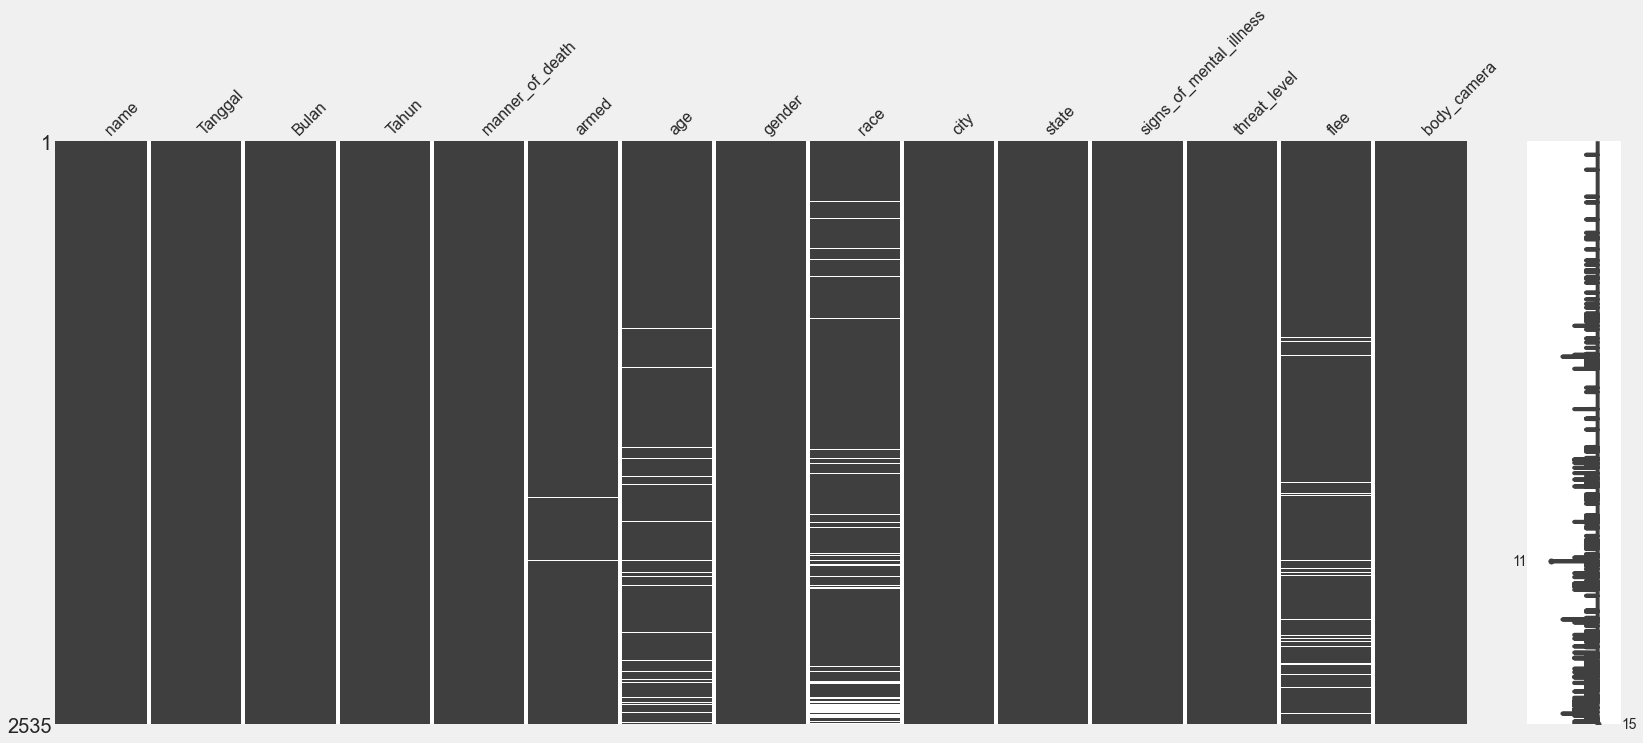

In [31]:
msno.matrix(death_by_police_preproses)

In [32]:
race_poverty_level_hs_medIncome

Geographic Area    State                    City share_white  \
0                  AL  Alabama              Abanda CDP        67.2   
1                  AL  Alabama          Abbeville city        54.4   
2                  AL  Alabama         Adamsville city        52.3   
3                  AL  Alabama            Addison town        99.1   
4                  AL  Alabama              Akron town        13.2   
...               ...      ...                     ...         ...   
29110              WY  Wyoming  Woods Landing-Jelm CDP        95.9   
29111              WY  Wyoming            Worland city        89.9   
29112              WY  Wyoming             Wright town        94.5   
29113              WY  Wyoming              Yoder town        97.4   
29114              WY  Wyoming           Y-O Ranch CDP        92.8   

      share_black share_native_american share_asian share_hispanic  \
0            30.2                     0           0            1.6   
1            41.4                   0.1           1            3.1   
2            44.9                   0.5         0.3            2.3   
3             0.1                     0         0.1            0.4   
4            86.5                     0           0            0.3   
...           ...                   ...         ...            ...   
29110           0                     0         2.1              0   
29111         0.3                   1.3         0.6           16.6   
29112         0.1                   1.4         0.2            6.2   
29113           0                     0           0              4   
29114         1.5                   2.6           0           11.8   

      poverty_rate percent_completed_hs Median Income  
0             78.8                 21.2         11207  
1             29.1                 69.1         25615  
2             25.5                 78.9         42575  
3             30.7                 81.4         37083  
4               42                 68.6         21667  
...            ...                  ...           ...  
29110         18.6                  100           NaN  
29111         15.3                 85.6         41523  
29112          5.9                 89.2         77114  
29113          5.4                 79.4         37500  
29114            0                  100           NaN  

[29115 rows x 11 columns]

In [33]:
for kolom in race_poverty_level_hs_medIncome.columns:
    if (kolom == "Geographic Area") or (kolom == "City"):
        print(f"Data unik pada kolom {kolom} ada : \n{race_poverty_level_hs_medIncome[kolom].unique()}\n")
    else:
        pass

Data unik pada kolom Geographic Area ada : 
['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']

Data unik pada kolom City ada : 
['Abanda CDP' 'Abbeville city' 'Adamsville city' ... 'Wright town'
 'Yoder town' 'Y-O Ranch CDP']



In [34]:
race_poverty_level_hs_medIncome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29115 entries, 0 to 29114
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic Area        29115 non-null  object
 1   State                  29115 non-null  object
 2   City                   29115 non-null  object
 3   share_white            29115 non-null  object
 4   share_black            29115 non-null  object
 5   share_native_american  29115 non-null  object
 6   share_asian            29115 non-null  object
 7   share_hispanic         29115 non-null  object
 8   poverty_rate           29115 non-null  object
 9   percent_completed_hs   29115 non-null  object
 10  Median Income          29064 non-null  object
dtypes: object(11)
memory usage: 2.7+ MB


In [35]:
race_poverty_level_hs_medIncome.loc[race_poverty_level_hs_medIncome.share_asian == "(X)"]

Geographic Area          State                         City share_white  \
629                AK         Alaska                  Chisana CDP         (X)   
676                AK         Alaska                     Flat CDP         (X)   
775                AK         Alaska                Mertarvik CDP         (X)   
1938               CA     California                  Almanor CDP         (X)   
2125               CA     California                  Caribou CDP         (X)   
2151               CA     California              Cedar Slope CDP         (X)   
3176               CA     California              Silver City CDP         (X)   
3230               CA     California  Sugarloaf Mountain Park CDP         (X)   
3323               CA     California             Valley Wells CDP         (X)   
11566              MA  Massachusetts               Southfield CDP         (X)   
13889              MO       Missouri              Florida village         (X)   
13939              MO       Missouri                    Goss town         (X)   
14087              MO       Missouri                Lakeside city         (X)   
21111              OR         Oregon               Greenhorn city         (X)   
25200              TX          Texas   Laredo Ranchettes West CDP         (X)   
25618              TX          Texas              Pueblo East CDP         (X)   
25977              TX          Texas            Valle Hermoso CDP         (X)   
25978              TX          Texas              Valle Verde CDP         (X)   
29090              WY        Wyoming               Table Rock CDP         (X)   

      share_black share_native_american share_asian share_hispanic  \
629           (X)                   (X)         (X)            (X)   
676           (X)                   (X)         (X)            (X)   
775           (X)                   (X)         (X)            (X)   
1938          (X)                   (X)         (X)            (X)   
2125          (X)                   (X)         (X)            (X)   
2151          (X)                   (X)         (X)            (X)   
3176          (X)                   (X)         (X)            (X)   
3230          (X)                   (X)         (X)            (X)   
3323          (X)                   (X)         (X)            (X)   
11566         (X)                   (X)         (X)            (X)   
13889         (X)                   (X)         (X)            (X)   
13939         (X)                   (X)         (X)            (X)   
14087         (X)                   (X)         (X)            (X)   
21111         (X)                   (X)         (X)            (X)   
25200         (X)                   (X)         (X)            (X)   
25618         (X)                   (X)         (X)            (X)   
25977         (X)                   (X)         (X)            (X)   
25978         (X)                   (X)         (X)            (X)   
29090         (X)                   (X)         (X)            (X)   

      poverty_rate percent_completed_hs Median Income  
629              -                    -             -  
676              -                    -             -  
775              -                    -             -  
1938             -                    -             -  
2125             -                    -             -  
2151             -                    -             -  
3176             -                    -             -  
3230             -                    -             -  
3323             -                    -             -  
11566            -                    -             -  
13889            -                    -             -  
13939            -                    -             -  
14087            -                    -             -  
21111            0                  100             -  
25200            -                    -             -  
25618            -                    -             -  
25977            -              

In [36]:
race_poverty_level_hs_medIncome.replace("(X)", value= np.nan, inplace = True)

In [37]:
race_poverty_level_hs_medIncome.loc[race_poverty_level_hs_medIncome.share_asian == "(X)"]

Empty DataFrame
Columns: [Geographic Area, State, City, share_white, share_black, share_native_american, share_asian, share_hispanic, poverty_rate, percent_completed_hs, Median Income]
Index: []

In [38]:
race_poverty_level_hs_medIncome.loc[race_poverty_level_hs_medIncome.poverty_rate == "-"]

Geographic Area    State              City share_white share_black  \
565                AL  Alabama       Whatley CDP          72        26.7   
600                AK   Alaska  Attu Station CDP        90.5           0   
624                AK   Alaska       Chicken CDP         100           0   
629                AK   Alaska       Chisana CDP         NaN         NaN   
654                AK   Alaska      Dot Lake CDP        69.2           0   
...               ...      ...               ...         ...         ...   
29048              WY  Wyoming        Oakley CDP          98           0   
29053              WY  Wyoming     Owl Creek CDP         100           0   
29059              WY  Wyoming  Powder River CDP         100           0   
29075              WY  Wyoming     Ryan Park CDP        97.4           0   
29090              WY  Wyoming    Table Rock CDP         NaN         NaN   

      share_native_american share_asian share_hispanic poverty_rate  \
565                       0         0.7              2            -   
600                     4.8           0             19            -   
624                       0           0           14.3            -   
629                     NaN         NaN            NaN            -   
654                    23.1           0              0            -   
...                     ...         ...            ...          ...   
29048                     0           0              0            -   
29053                     0           0              0            -   
29059                     0           0              0            -   
29075                     0           0              0            -   
29090                   NaN         NaN            NaN            -   

      percent_completed_hs Median Income  
565                      -             -  
600                    100             -  
624                      -             -  
629                      -             -  
654                      -             -  
...                    ...           ...  
29048                    -           NaN  
29053                    -           NaN  
29059                    -           NaN  
29075                    -           NaN  
29090                    -           NaN  

[195 rows x 11 columns]

In [39]:
race_poverty_level_hs_medIncome.replace("-", value= np.nan, inplace = True)

In [40]:
race_poverty_level_hs_medIncome.loc[race_poverty_level_hs_medIncome.poverty_rate == "-"]

Empty DataFrame
Columns: [Geographic Area, State, City, share_white, share_black, share_native_american, share_asian, share_hispanic, poverty_rate, percent_completed_hs, Median Income]
Index: []

In [41]:
race_poverty_level_hs_medIncome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29115 entries, 0 to 29114
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic Area        29115 non-null  object
 1   State                  29115 non-null  object
 2   City                   29115 non-null  object
 3   share_white            29096 non-null  object
 4   share_black            29096 non-null  object
 5   share_native_american  29096 non-null  object
 6   share_asian            29096 non-null  object
 7   share_hispanic         29096 non-null  object
 8   poverty_rate           28920 non-null  object
 9   percent_completed_hs   28924 non-null  object
 10  Median Income          27243 non-null  object
dtypes: object(11)
memory usage: 2.7+ MB


In [42]:
race_poverty_level_hs_medIncome.loc[race_poverty_level_hs_medIncome["Median Income"] == "2,500-"]

Geographic Area           State              City share_white  \
1336               AZ         Arizona       Ventana CDP           0   
2604               CA      California     Lake City CDP        95.1   
9512               KS          Kansas     Oak Hill city        95.8   
20440              OK        Oklahoma     Dotyville CDP        72.3   
23519              SC  South Carolina    Ware Place CDP        83.8   
23535              SC  South Carolina    Willington CDP        14.1   
25450              TX           Texas    New Falcon CDP        89.5   
25758              TX           Texas  San Fernando CDP         100   
27958              WV   West Virginia     Littleton CDP         100   

      share_black share_native_american share_asian share_hispanic  \
1336            0                   100           0            4.1   
2604            0                     0           0              0   
9512            0                     0           0              0   
20440           0                  19.8           0              0   
23519        12.7                   0.9           0            1.3   
23535        85.9                     0           0              0   
25450           0                     1         0.5           98.4   
25758           0                     0           0            100   
27958           0                     0           0            1.5   

      poverty_rate percent_completed_hs Median Income  
1336           100                 77.8        2,500-  
2604            87                  100        2,500-  
9512          82.4                 94.4        2,500-  
20440         16.5                  100        2,500-  
23519         43.4                 83.8        2,500-  
23535         51.6                 90.1        2,500-  
25450         91.9                 53.6        2,500-  
25758          100                    0        2,500-  
27958         77.2                  100        2,500-

In [43]:
race_poverty_level_hs_medIncome.loc[race_poverty_level_hs_medIncome["Median Income"] == "250,000+"]

Geographic Area       State                              City  \
1977               CA  California                     Atherton town   
2587               CA  California                        Ladera CDP   
2860               CA  California                 Norris Canyon CDP   
3411               CA  California                     Woodside town   
4450               FL     Florida              Indian Creek village   
4483               FL     Florida               Jupiter Island town   
5179               GA     Georgia                     Dewy Rose CDP   
7816               IN     Indiana             North Crows Nest town   
9236               KS      Kansas                      Elmdale city   
10054              KY    Kentucky           Mockingbird Valley city   
10951              MD    Maryland                  Chevy Chase town   
10953              MD    Maryland  Chevy Chase Section Five village   
10956              MD    Maryland          Chevy Chase Village town   
11165              MD    Maryland        Martin's Additions village   
11306              MD    Maryland                     Somerset town   
11656              MI    Michigan              Barton Hills village   
13787              MO    Missouri        Country Life Acres village   
16203              NJ  New Jersey                   Short Hills CDP   
17204              NY    New York          Hewlett Bay Park village   
17570              NY    New York                  Plandome village   
17808              NY    New York          Upper Brookville village   
19542              OH        Ohio            Hunting Valley village   
25047              TX       Texas        Hunters Creek Village city   
25574              TX       Texas          Piney Point Village city   

      share_white share_black share_native_american share_asian  \
1977         80.5         1.1                   0.1        13.2   
2587           89         0.2                   0.1         6.9   
2860         49.7         4.3                   0.1        38.9   
3411         89.2         0.4                   0.1         6.3   
4450         98.8           0                     0         1.2   
4483         94.4         2.2                   0.2         2.6   
5179         69.5        27.3                     0         3.2   
7816          100           0                     0           0   
9236         96.4           0                     0           0   
10054        92.2         2.4                     0         4.2   
10951        92.1           1                   0.1         3.9   
10953        95.6         0.2                     0         2.1   
10956        95.9         0.6                   0.2         1.6   
11165        92.7         0.6                     0         3.8   
11306        91.7         0.7                     0         3.9   
11656        88.1           1                     0         6.8   
13787        95.9           0                     0         4.1   
16203        81.4           1                     0        15.5   
17204        92.6           0                     0         5.7   
17570        94.7         0.8                   0.1         3.6   
17808        86.8         0.9                   0.1         9.5   
19542          97         0.6                     0         1.1   
25047        90.6         1.1                   0.2           6   
25574        85.1         1.7                   0.1          11   

      share_hispanic poverty_rate percent_completed_hs Median Income  
1977             3.9          3.8                 97.7      250,000+  
2587             2.3          1.2                  100      250,000+  
2860             4.4            0                 96.6      250,000+  
3411             4.6          4.5                 97.2      250,000+  
4450            27.9          3.3                 95.5      250,000+  
4483             6.9          9.9                 98.6      250,000+  
5179             1.3         47.8                 24.7   

In [44]:
race_poverty_level_hs_medIncome.replace("2,500-", value= np.nan, inplace = True)
race_poverty_level_hs_medIncome.replace("250,000+", value= np.nan, inplace = True)

In [45]:
for kolom in race_poverty_level_hs_medIncome.columns:
    if (kolom == "Geographic Area") or (kolom == "City") or (kolom == "State"):
        pass
    else:
        race_poverty_level_hs_medIncome[kolom] = race_poverty_level_hs_medIncome[kolom].astype("float")

In [46]:
race_poverty_level_hs_medIncome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29115 entries, 0 to 29114
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic Area        29115 non-null  object 
 1   State                  29115 non-null  object 
 2   City                   29115 non-null  object 
 3   share_white            29096 non-null  float64
 4   share_black            29096 non-null  float64
 5   share_native_american  29096 non-null  float64
 6   share_asian            29096 non-null  float64
 7   share_hispanic         29096 non-null  float64
 8   poverty_rate           28920 non-null  float64
 9   percent_completed_hs   28924 non-null  float64
 10  Median Income          27210 non-null  float64
dtypes: float64(8), object(3)
memory usage: 2.7+ MB


In [47]:
race_poverty_level_hs_medIncome.describe()

share_white   share_black  share_native_american   share_asian  \
count  29096.000000  29096.000000           29096.000000  29096.000000   
mean      83.215356      6.842429               2.883255      1.540308   
std       21.664189     15.634056              12.700454      4.283947   
min        0.000000      0.000000               0.000000      0.000000   
25%       78.575000      0.100000               0.100000      0.000000   
50%       92.500000      0.800000               0.300000      0.400000   
75%       96.900000      4.200000               0.900000      1.200000   
max      100.000000    100.000000             100.000000     67.100000   

       share_hispanic  poverty_rate  percent_completed_hs  Median Income  
count    29096.000000  28920.000000          28924.000000   27210.000000  
mean         9.281083     16.441978             85.737408   51159.964792  
std         17.474546     13.158907             11.842763   24862.732172  
min          0.000000      0.000000              0.000000    4511.000000  
25%          1.200000      7.200000             81.000000   35625.000000  
50%          2.900000     13.700000             88.400000   45278.000000  
75%          8.000000     22.500000             93.500000   59453.000000  
max        100.000000    100.000000            100.000000  244083.000000

<AxesSubplot:>

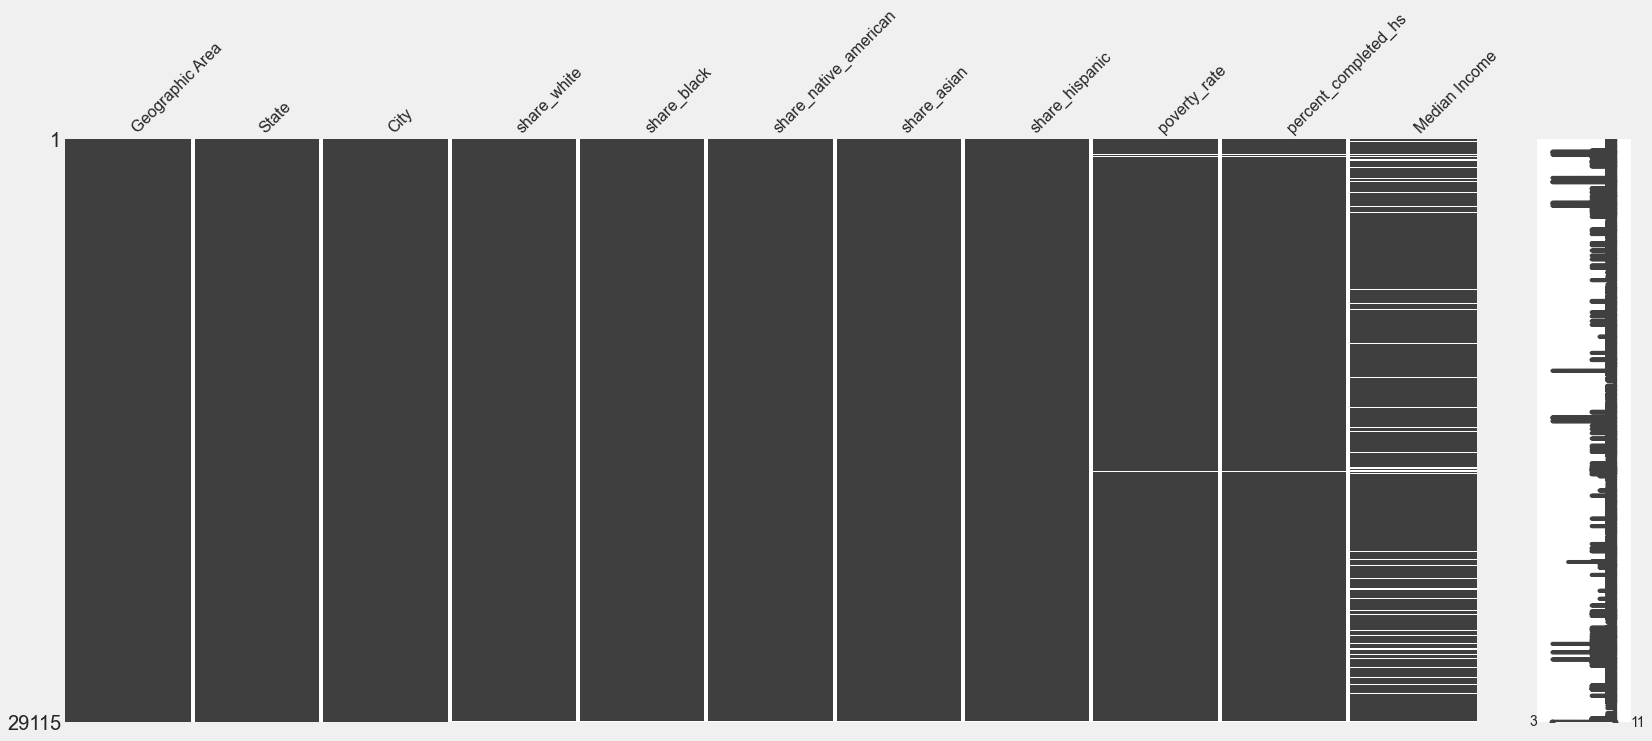

In [48]:
msno.matrix(race_poverty_level_hs_medIncome)

<AxesSubplot:>

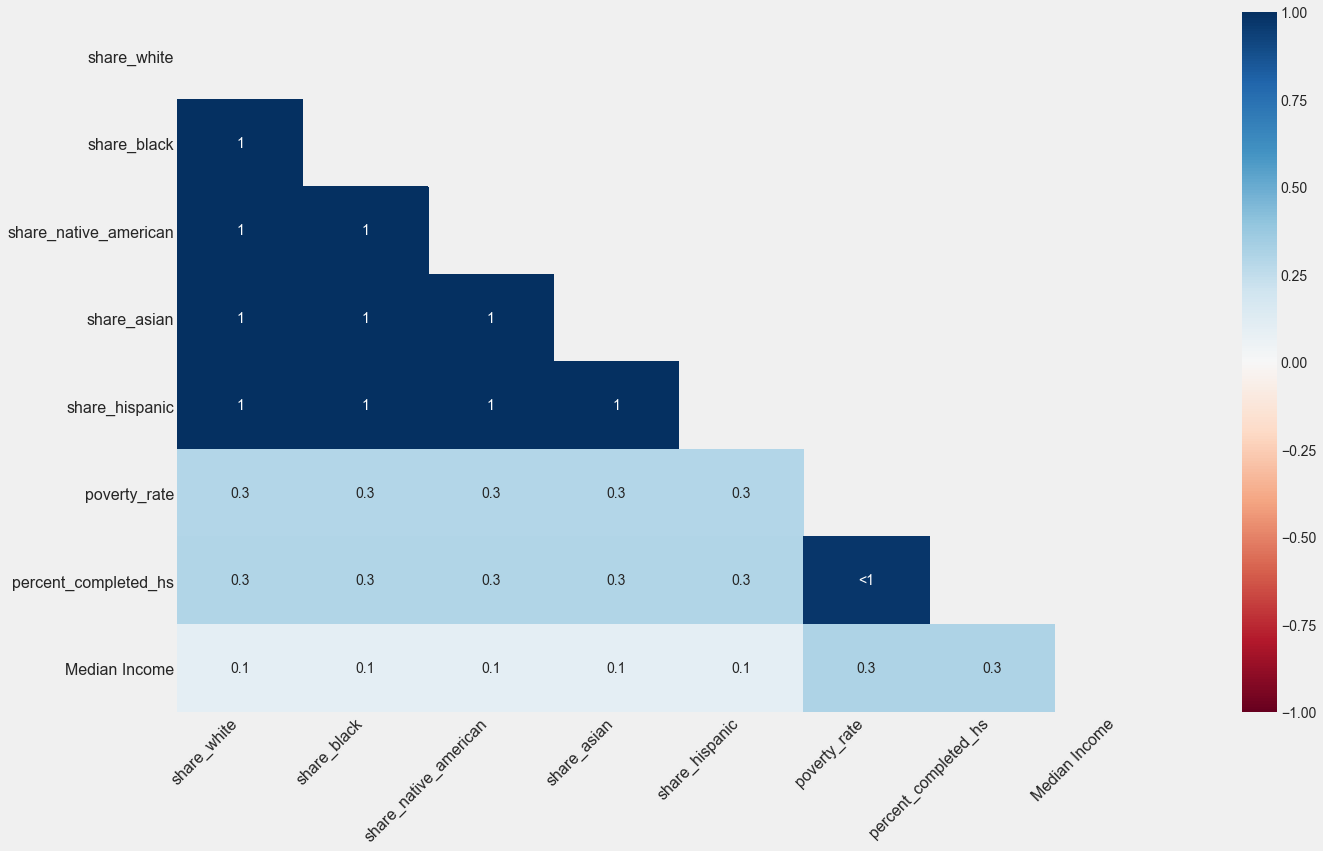

In [49]:
msno.heatmap(race_poverty_level_hs_medIncome)

In [50]:
race_poverty_level_hs_medIncome.isnull().sum()

Geographic Area             0
State                       0
City                        0
share_white                19
share_black                19
share_native_american      19
share_asian                19
share_hispanic             19
poverty_rate              195
percent_completed_hs      191
Median Income            1905
dtype: int64

In [51]:
(race_poverty_level_hs_medIncome.isnull().sum() / len(race_poverty_level_hs_medIncome) * 100).round(2)

Geographic Area          0.00
State                    0.00
City                     0.00
share_white              0.07
share_black              0.07
share_native_american    0.07
share_asian              0.07
share_hispanic           0.07
poverty_rate             0.67
percent_completed_hs     0.66
Median Income            6.54
dtype: float64

In [52]:
race_poverty_level_hs_medIncome.duplicated().sum()

0

### Bagaimana urutan negara bagian yang memiliki tingkat presentase orang di bawah garis kemiskinan? Lalu dari top 5 Negara bagian dengan presentase terbesar coba mencari pada masing — masing negara bagian top 3 kota dengan presentase yang paling besar

In [53]:
race_poverty_level_hs_medIncome

Geographic Area    State                    City  share_white  \
0                  AL  Alabama              Abanda CDP         67.2   
1                  AL  Alabama          Abbeville city         54.4   
2                  AL  Alabama         Adamsville city         52.3   
3                  AL  Alabama            Addison town         99.1   
4                  AL  Alabama              Akron town         13.2   
...               ...      ...                     ...          ...   
29110              WY  Wyoming  Woods Landing-Jelm CDP         95.9   
29111              WY  Wyoming            Worland city         89.9   
29112              WY  Wyoming             Wright town         94.5   
29113              WY  Wyoming              Yoder town         97.4   
29114              WY  Wyoming           Y-O Ranch CDP         92.8   

       share_black  share_native_american  share_asian  share_hispanic  \
0             30.2                    0.0          0.0             1.6   
1             41.4                    0.1          1.0             3.1   
2             44.9                    0.5          0.3             2.3   
3              0.1                    0.0          0.1             0.4   
4             86.5                    0.0          0.0             0.3   
...            ...                    ...          ...             ...   
29110          0.0                    0.0          2.1             0.0   
29111          0.3                    1.3          0.6            16.6   
29112          0.1                    1.4          0.2             6.2   
29113          0.0                    0.0          0.0             4.0   
29114          1.5                    2.6          0.0            11.8   

       poverty_rate  percent_completed_hs  Median Income  
0              78.8                  21.2        11207.0  
1              29.1                  69.1        25615.0  
2              25.5                  78.9        42575.0  
3              30.7                  81.4        37083.0  
4              42.0                  68.6        21667.0  
...             ...                   ...            ...  
29110          18.6                 100.0            NaN  
29111          15.3                  85.6        41523.0  
29112           5.9                  89.2        77114.0  
29113           5.4                  79.4        37500.0  
29114           0.0                 100.0            NaN  

[29115 rows x 11 columns]

In [54]:
top_poverty = race_poverty_level_hs_medIncome.groupby("State").poverty_rate.agg(["mean", "median"]).sort_values("mean", ascending = False)
top_poverty

mean  median
State                                  
Mississippi           27.048189   26.50
Arizona               25.675395   20.30
Georgia               23.782955   23.35
New Mexico            23.013721   19.65
Arkansas              22.963687   22.30
Louisiana             22.368644   21.00
South Carolina        22.196954   22.20
West Virginia         21.210302   19.15
Alabama               20.732465   19.15
Oklahoma              20.721379   18.80
Kentucky              20.152199   19.60
Missouri              20.064671   18.50
Tennessee             19.915493   19.50
Alaska                19.880180   15.00
Texas                 19.867235   17.00
North Carolina        19.726594   17.80
Idaho                 18.301786   16.25
District of Columbia  18.000000   18.00
Michigan              17.920319   16.10
Florida               17.582346   15.00
California            17.091269   13.40
Maine                 16.920312   17.50
Oregon                16.523467   16.20
Montana               16.493629   12.80
South Dakota          15.962141   11.10
Indiana               15.417725   14.80
Washington            15.054828   12.30
Ohio                  14.843376   13.30
Kansas                14.787874   12.80
Virginia              14.615424   11.85
Illinois              13.881278   12.20
Minnesota             13.745736   11.60
Vermont               13.718261   13.20
Colorado              13.414222   11.70
Hawaii                13.343333   11.05
Nebraska              12.984575   11.60
Wisconsin             12.872857   11.50
New Hampshire         12.764583   10.60
Delaware              12.678947   11.15
Pennsylvania          12.509630   10.80
Iowa                  12.304790   10.70
Nevada                12.203125   10.20
North Dakota          12.162250    8.85
Utah                  11.967089    9.35
New York              11.631749    9.50
Rhode Island          10.547059    8.75
Maryland              10.326796    7.50
Wyoming                9.940860    6.70
Massachusetts          9.625514    8.20
Connecticut            9.166901    7.75
New Jersey             8.194270    6.40

<AxesSubplot:title={'center':'Tingkat rataan/median presentase orang berada di bawah garis kemiskinan'}, xlabel='State'>

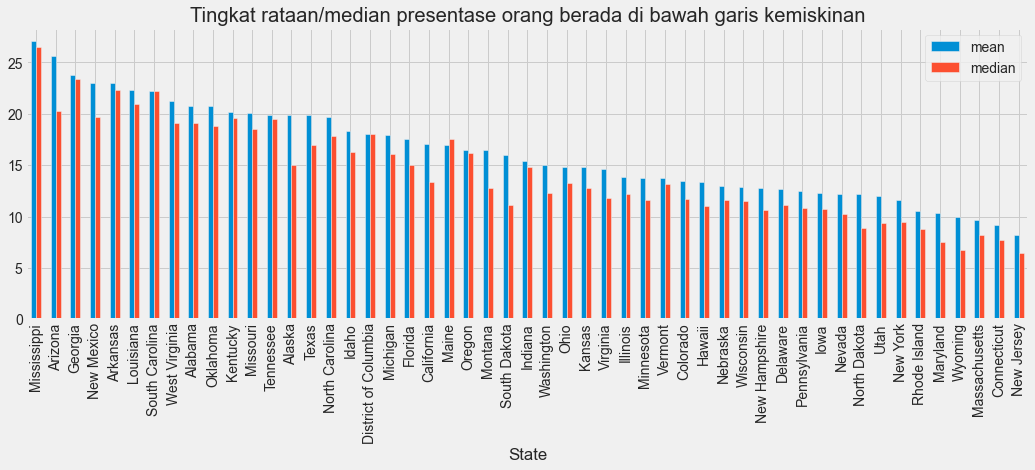

In [55]:
top_poverty.plot(kind = "bar", figsize = (16, 5), 
                 title = "Tingkat rataan/median presentase orang berada di bawah garis kemiskinan")

In [56]:
top5_poverty_index = top_poverty.head(5).index
top5_poverty_index

Index(['Mississippi', 'Arizona', 'Georgia', 'New Mexico', 'Arkansas'], dtype='object', name='State')

In [57]:
mask1 = race_poverty_level_hs_medIncome.State == "Arizona"
mask2 = race_poverty_level_hs_medIncome.State == "Mississippi"
mask3 = race_poverty_level_hs_medIncome.State == "Georgia"
mask4 = race_poverty_level_hs_medIncome.State == "New Mexico"
mask5 = race_poverty_level_hs_medIncome.State == "Arkansas"

top5_state_only = race_poverty_level_hs_medIncome.loc[mask1 | mask2 | mask3 | mask4 | mask5]
top5_state_only

Geographic Area       State                 City  share_white  \
930                AZ     Arizona           Aguila CDP         64.7   
931                AZ     Arizona              Ajo CDP         75.1   
932                AZ     Arizona          Ak Chin CDP          0.0   
933                AZ     Arizona  Ak-Chin Village CDP          2.7   
934                AZ     Arizona       Alamo Lake CDP        100.0   
...               ...         ...                  ...          ...   
16741              NM  New Mexico       Yah-ta-hey CDP         11.4   
16742              NM  New Mexico      Young Place CDP         71.1   
16743              NM  New Mexico      Youngsville CDP         71.4   
16744              NM  New Mexico       Zia Pueblo CDP          0.1   
16745              NM  New Mexico      Zuni Pueblo CDP          1.1   

       share_black  share_native_american  share_asian  share_hispanic  \
930            1.0                    3.6          0.4            69.4   
931            0.9                    9.9          1.1            38.3   
932            0.0                  100.0          0.0             3.3   
933            0.6                   75.4          0.0            27.5   
934            0.0                    0.0          0.0             0.0   
...            ...                    ...          ...             ...   
16741          0.3                   75.4          0.0            13.4   
16742          0.0                    8.6          1.1            32.6   
16743          0.0                    0.0          0.0            89.3   
16744          0.0                   99.5          0.0             2.0   
16745          0.1                   97.1          0.3             2.6   

       poverty_rate  percent_completed_hs  Median Income  
930            57.4                  26.1        26842.0  
931            33.6                  80.0        32964.0  
932            12.1                 100.0            NaN  
933            54.5                  59.8        25197.0  
934             0.0                 100.0            NaN  
...             ...                   ...            ...  
16741          44.4                  83.2            NaN  
16742          25.0                 100.0            NaN  
16743          48.3                  51.7        21250.0  
16744          25.4                  84.5        40000.0  
16745          37.5                  72.4        35752.0  

[2406 rows x 11 columns]

In [58]:
top5_poverty = top5_state_only.groupby(["State", "City"]).poverty_rate.mean().reset_index().set_index("State")
top5_poverty

City  poverty_rate
State                                        
Arizona              Aguila CDP          57.4
Arizona                 Ajo CDP          33.6
Arizona             Ak Chin CDP          12.1
Arizona     Ak-Chin Village CDP          54.5
Arizona          Alamo Lake CDP           0.0
...                         ...           ...
New Mexico       Yah-ta-hey CDP          44.4
New Mexico      Young Place CDP          25.0
New Mexico      Youngsville CDP          48.3
New Mexico       Zia Pueblo CDP          25.4
New Mexico      Zuni Pueblo CDP          37.5

[2406 rows x 2 columns]

In [59]:
top3_povert_city = pd.DataFrame()
for index in top5_poverty.index.unique():
    top3 = top5_poverty.loc[index, :].sort_values("poverty_rate", ascending = False).head(3)
    top3_povert_city = pd.concat([top3_povert_city, top3], axis = "index")

In [60]:
top3_povert_city.index.to_frame().State

State
Arizona            Arizona
Arizona            Arizona
Arizona            Arizona
Arkansas          Arkansas
Arkansas          Arkansas
Arkansas          Arkansas
Georgia            Georgia
Georgia            Georgia
Georgia            Georgia
Mississippi    Mississippi
Mississippi    Mississippi
Mississippi    Mississippi
New Mexico      New Mexico
New Mexico      New Mexico
New Mexico      New Mexico
Name: State, dtype: object

In [61]:
top3_povert_city.reset_index(inplace = True)
top3_povert_city

State              City  poverty_rate
0       Arizona      Vaiva Vo CDP         100.0
1       Arizona    Wide Ruins CDP         100.0
2       Arizona       Ventana CDP         100.0
3      Arkansas     Blue Eye town          74.4
4      Arkansas       Sunset town          64.9
5      Arkansas   Winchester town          64.0
6       Georgia  Phillipsburg CDP          61.0
7       Georgia        Omega city          58.7
8       Georgia       Morgan city          58.7
9   Mississippi    University CDP          92.0
10  Mississippi        Sidon town          73.8
11  Mississippi       Tchula town          66.8
12   New Mexico        Regina CDP         100.0
13   New Mexico      Kingston CDP         100.0
14   New Mexico       Tajique CDP         100.0

[]

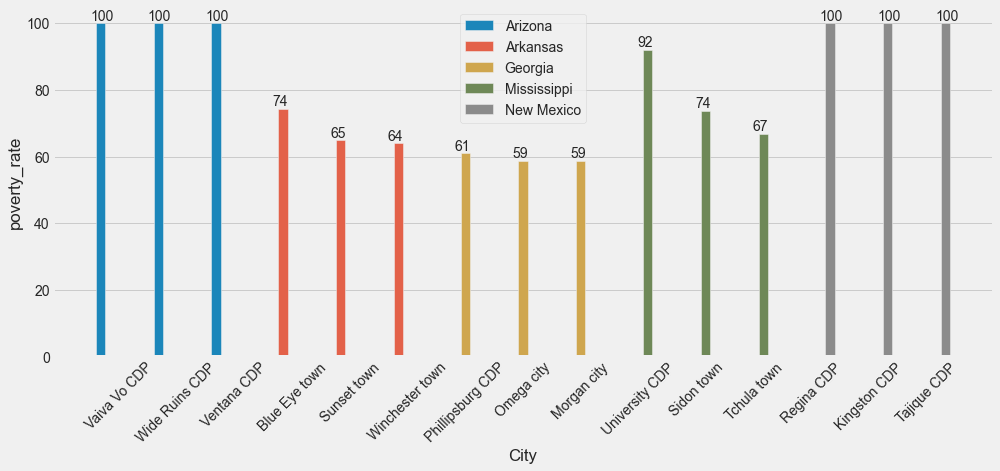

In [62]:
plt.figure(figsize = (15,6))

ax = sns.barplot(data = top3_povert_city, x = "City", y = "poverty_rate", hue = "State")
ax.set_xticklabels(labels = top3_povert_city.City, rotation = 45)

for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
                (p.get_x() - 0.1, p.get_height() + 1))

plt.legend(loc = "upper center")
plt.plot()

### Lalu bagaimana urutan dari tertinggi sampai terendah pada kategori rataan median income dan presentase orang lebih dari 25 tahun yang lulus SMA pada tiap negara bagian?

In [63]:
race_poverty_level_hs_medIncome

Geographic Area    State                    City  share_white  \
0                  AL  Alabama              Abanda CDP         67.2   
1                  AL  Alabama          Abbeville city         54.4   
2                  AL  Alabama         Adamsville city         52.3   
3                  AL  Alabama            Addison town         99.1   
4                  AL  Alabama              Akron town         13.2   
...               ...      ...                     ...          ...   
29110              WY  Wyoming  Woods Landing-Jelm CDP         95.9   
29111              WY  Wyoming            Worland city         89.9   
29112              WY  Wyoming             Wright town         94.5   
29113              WY  Wyoming              Yoder town         97.4   
29114              WY  Wyoming           Y-O Ranch CDP         92.8   

       share_black  share_native_american  share_asian  share_hispanic  \
0             30.2                    0.0          0.0             1.6   
1             41.4                    0.1          1.0             3.1   
2             44.9                    0.5          0.3             2.3   
3              0.1                    0.0          0.1             0.4   
4             86.5                    0.0          0.0             0.3   
...            ...                    ...          ...             ...   
29110          0.0                    0.0          2.1             0.0   
29111          0.3                    1.3          0.6            16.6   
29112          0.1                    1.4          0.2             6.2   
29113          0.0                    0.0          0.0             4.0   
29114          1.5                    2.6          0.0            11.8   

       poverty_rate  percent_completed_hs  Median Income  
0              78.8                  21.2        11207.0  
1              29.1                  69.1        25615.0  
2              25.5                  78.9        42575.0  
3              30.7                  81.4        37083.0  
4              42.0                  68.6        21667.0  
...             ...                   ...            ...  
29110          18.6                 100.0            NaN  
29111          15.3                  85.6        41523.0  
29112           5.9                  89.2        77114.0  
29113           5.4                  79.4        37500.0  
29114           0.0                 100.0            NaN  

[29115 rows x 11 columns]

In [64]:
top_completed_hs = race_poverty_level_hs_medIncome.groupby("State").percent_completed_hs.agg(["mean", "median"]).sort_values("mean", ascending = False).round(2)
top_completed_hs

mean  median
State                              
Massachusetts         92.35   93.80
Wyoming               92.12   93.80
Utah                  91.64   93.25
Hawaii                91.63   92.45
Connecticut           91.55   93.10
Maine                 91.42   91.70
New Jersey            90.84   92.60
New Hampshire         90.82   91.95
New York              90.61   92.00
Montana               90.48   91.80
Wisconsin             90.26   91.20
Vermont               90.19   91.20
Iowa                  90.10   91.10
Colorado              90.07   92.20
Nebraska              89.99   91.00
Minnesota             89.47   90.90
District of Columbia  89.30   89.30
Michigan              89.21   89.90
Pennsylvania          89.02   90.30
Rhode Island          88.56   91.05
Illinois              88.48   89.80
Delaware              88.47   89.30
Maryland              88.43   91.10
Ohio                  88.31   89.60
Oregon                88.30   89.75
Washington            88.29   91.60
Kansas                88.23   90.00
North Dakota          87.82   90.00
South Dakota          87.72   90.10
Nevada                87.68   89.80
Indiana               86.37   86.90
Florida               85.72   88.40
Idaho                 85.11   87.45
Virginia              84.86   85.95
Alaska                84.60   87.50
Missouri              83.52   85.30
North Carolina        83.26   83.60
Oklahoma              82.93   83.70
Kentucky              82.55   82.50
West Virginia         82.31   83.90
California            81.98   87.50
Tennessee             81.55   81.90
New Mexico            81.04   84.50
South Carolina        80.82   81.70
Arizona               80.45   84.10
Alabama               80.25   81.15
Arkansas              79.91   81.10
Louisiana             79.25   79.95
Georgia               78.94   79.10
Mississippi           78.34   78.30
Texas                 75.76   80.25

<AxesSubplot:xlabel='State'>

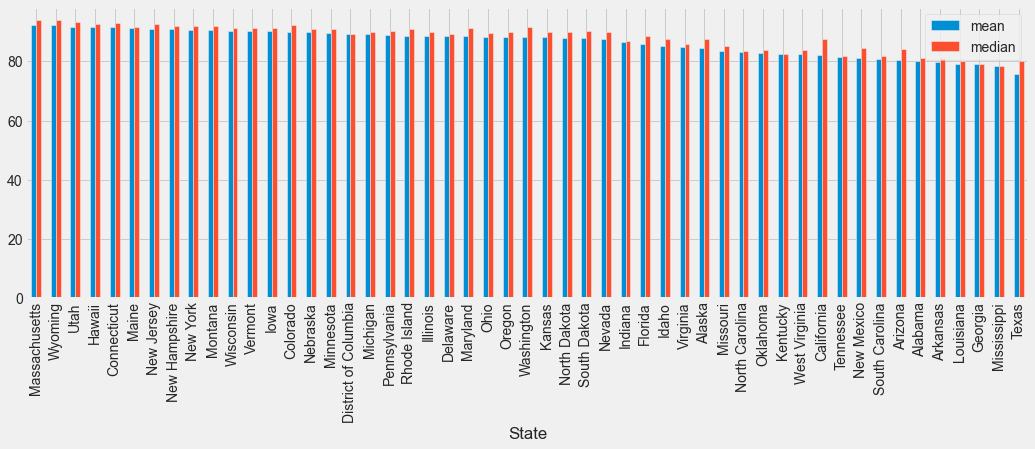

In [65]:
top_completed_hs.plot(kind = "bar", figsize = (16, 5))

In [66]:
race_poverty_level_hs_medIncome

Geographic Area    State                    City  share_white  \
0                  AL  Alabama              Abanda CDP         67.2   
1                  AL  Alabama          Abbeville city         54.4   
2                  AL  Alabama         Adamsville city         52.3   
3                  AL  Alabama            Addison town         99.1   
4                  AL  Alabama              Akron town         13.2   
...               ...      ...                     ...          ...   
29110              WY  Wyoming  Woods Landing-Jelm CDP         95.9   
29111              WY  Wyoming            Worland city         89.9   
29112              WY  Wyoming             Wright town         94.5   
29113              WY  Wyoming              Yoder town         97.4   
29114              WY  Wyoming           Y-O Ranch CDP         92.8   

       share_black  share_native_american  share_asian  share_hispanic  \
0             30.2                    0.0          0.0             1.6   
1             41.4                    0.1          1.0             3.1   
2             44.9                    0.5          0.3             2.3   
3              0.1                    0.0          0.1             0.4   
4             86.5                    0.0          0.0             0.3   
...            ...                    ...          ...             ...   
29110          0.0                    0.0          2.1             0.0   
29111          0.3                    1.3          0.6            16.6   
29112          0.1                    1.4          0.2             6.2   
29113          0.0                    0.0          0.0             4.0   
29114          1.5                    2.6          0.0            11.8   

       poverty_rate  percent_completed_hs  Median Income  
0              78.8                  21.2        11207.0  
1              29.1                  69.1        25615.0  
2              25.5                  78.9        42575.0  
3              30.7                  81.4        37083.0  
4              42.0                  68.6        21667.0  
...             ...                   ...            ...  
29110          18.6                 100.0            NaN  
29111          15.3                  85.6        41523.0  
29112           5.9                  89.2        77114.0  
29113           5.4                  79.4        37500.0  
29114           0.0                 100.0            NaN  

[29115 rows x 11 columns]

In [67]:
top_median_income = race_poverty_level_hs_medIncome.groupby("State")["Median Income"].agg(["mean", "median"]).sort_values("mean", ascending = False).round(2)
top_median_income

mean   median
State                                  
New Jersey            80527.38  75126.5
Maryland              78006.65  70453.5
Connecticut           75200.32  69316.0
Massachusetts         71788.40  66370.0
District of Columbia  70848.00  70848.0
New York              70150.47  58021.0
Hawaii                64886.65  63453.0
Rhode Island          64749.30  64497.0
California            62165.58  54644.0
Virginia              61966.20  50000.0
Delaware              61299.64  57083.0
Wyoming               60874.99  55217.5
Utah                  60293.41  57548.0
Washington            59313.47  53904.0
Colorado              58290.18  50158.0
Nevada                57322.97  50153.0
Illinois              54061.76  47969.0
New Hampshire         53916.29  52464.0
North Dakota          52141.71  49375.0
Alaska                52041.55  50000.0
Pennsylvania          51752.56  48036.0
Minnesota             51678.66  47188.0
Texas                 51311.11  44055.0
Ohio                  50353.36  45507.0
Wisconsin             50312.44  47350.5
Florida               49805.17  44669.0
Oregon                48088.07  44431.0
Iowa                  48033.48  45701.0
Indiana               47700.49  43359.0
Nebraska              46582.91  44167.0
Vermont               46373.98  43833.5
Kentucky              45906.36  37633.0
South Dakota          45408.26  43462.0
Maine                 45380.75  42117.0
Montana               45136.08  41892.0
Kansas                44834.24  42500.0
Michigan              44720.47  41250.0
North Carolina        43323.16  39020.0
Arizona               42512.92  39000.0
Idaho                 42196.36  41250.0
Tennessee             42175.05  37045.0
Missouri              41766.63  36833.0
Louisiana             41506.38  38555.0
New Mexico            41046.79  37500.0
Oklahoma              40438.05  38162.5
Alabama               40433.81  38053.0
South Carolina        39721.86  34828.5
Georgia               39654.68  35682.0
West Virginia         38929.74  36250.0
Arkansas              35507.10  33750.0
Mississippi           34780.48  31750.0

<AxesSubplot:title={'center':'Ranking Rata - Rata dan Median dari Median Income tiap kota pada tiap negara bagian'}, xlabel='State'>

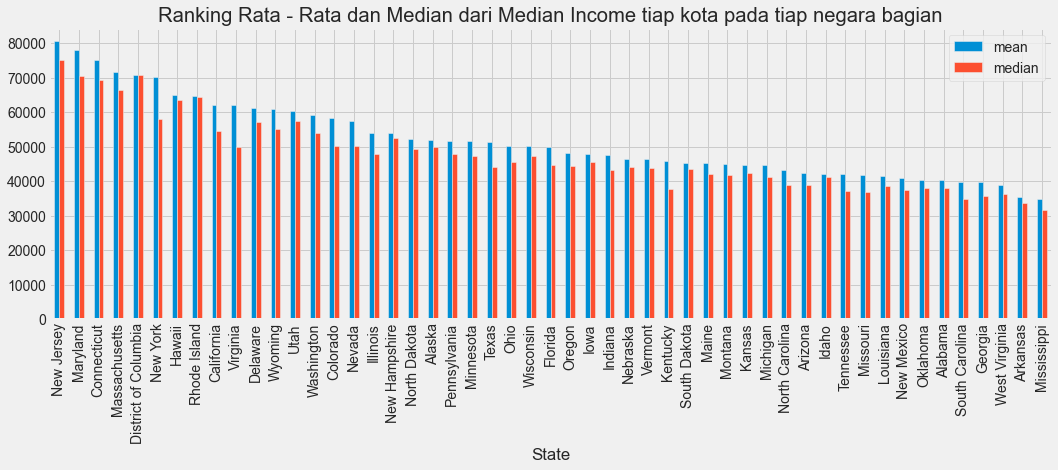

In [68]:
top_median_income.plot(kind = "bar", figsize = (16, 5),
                       title = "Ranking Rata - Rata dan Median dari Median Income tiap kota pada tiap negara bagian")

<AxesSubplot:title={'center':'Ranking Rata - Rata/Median dari Median Income tiap kota pada tiap negara bagian'}, xlabel='State'>

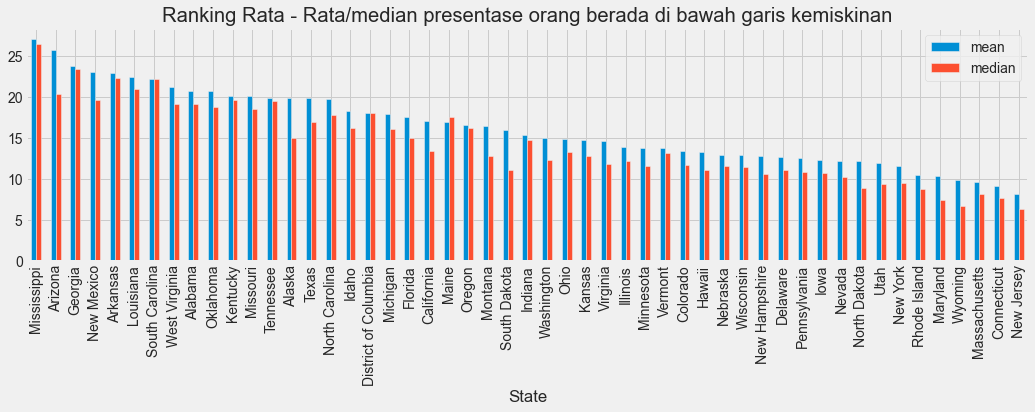

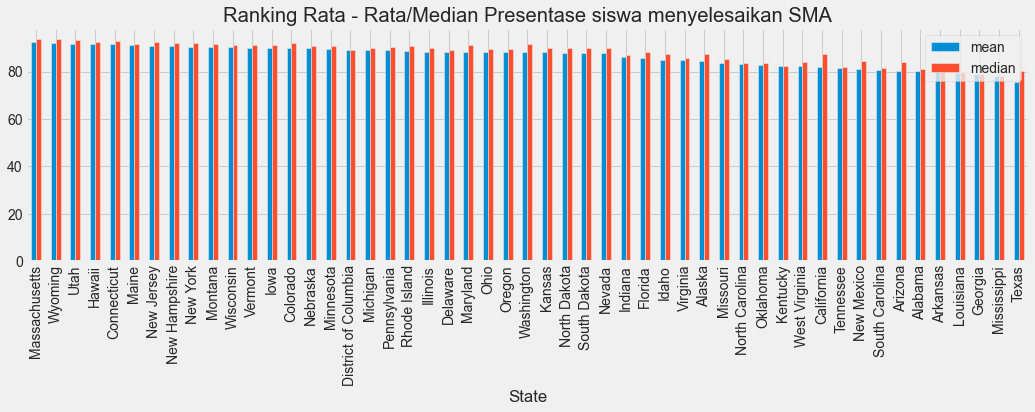

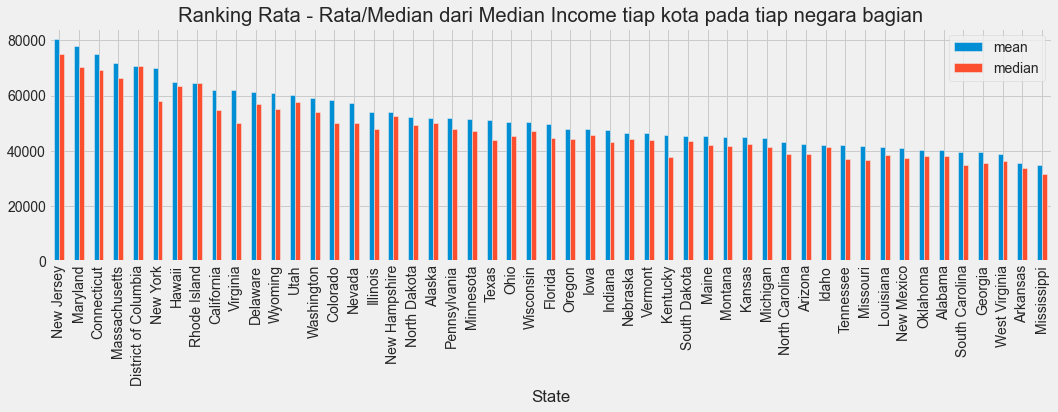

In [69]:
top_poverty.plot(kind = "bar", figsize = (16, 4), title = "Ranking Rata - Rata/median presentase orang berada di bawah garis kemiskinan")

top_completed_hs.plot(kind = "bar", figsize = (16, 4),
                      title = "Ranking Rata - Rata/Median Presentase siswa menyelesaikan SMA")

top_median_income.plot(kind = "bar", figsize = (16, 4),
                       title = "Ranking Rata - Rata/Median dari Median Income tiap kota pada tiap negara bagian")

### Apakah ada korelasi antara tingkat kemiskinan dengan presentase penyelesaian SMA pada semua negara bagian? Lalu adakah korelasi antara kemiskinan dengan hasil median income pada tiap negara bagian dan adakah korelasi antara tingkat median income dengan presentase penyelesaian SMA pada tiap negara bagian?

In [70]:
top_poverty_completed_hs = pd.merge(top_poverty, top_completed_hs, on = "State", suffixes= ("_poverty", "_completed_hs")).round(2)
top_poverty_completed_hs_medIncome = pd.merge(top_poverty_completed_hs, 
                                              top_median_income, on = "State").round(2).rename(columns = {"mean" : "mean_medIncome",
                                                                                                          "median" : "median_medIncome"})
top_poverty_completed_hs_medIncome

mean_poverty  median_poverty  mean_completed_hs  \
State                                                                   
Mississippi                  27.05           26.50              78.34   
Arizona                      25.68           20.30              80.45   
Georgia                      23.78           23.35              78.94   
New Mexico                   23.01           19.65              81.04   
Arkansas                     22.96           22.30              79.91   
Louisiana                    22.37           21.00              79.25   
South Carolina               22.20           22.20              80.82   
West Virginia                21.21           19.15              82.31   
Alabama                      20.73           19.15              80.25   
Oklahoma                     20.72           18.80              82.93   
Kentucky                     20.15           19.60              82.55   
Missouri                     20.06           18.50              83.52   
Tennessee                    19.92           19.50              81.55   
Alaska                       19.88           15.00              84.60   
Texas                        19.87           17.00              75.76   
North Carolina               19.73           17.80              83.26   
Idaho                        18.30           16.25              85.11   
District of Columbia         18.00           18.00              89.30   
Michigan                     17.92           16.10              89.21   
Florida                      17.58           15.00              85.72   
California                   17.09           13.40              81.98   
Maine                        16.92           17.50              91.42   
Oregon                       16.52           16.20              88.30   
Montana                      16.49           12.80              90.48   
South Dakota                 15.96           11.10              87.72   
Indiana                      15.42           14.80              86.37   
Washington                   15.05           12.30              88.29   
Ohio                         14.84           13.30              88.31   
Kansas                       14.79           12.80              88.23   
Virginia                     14.62           11.85              84.86   
Illinois                     13.88           12.20              88.48   
Minnesota                    13.75           11.60              89.47   
Vermont                      13.72           13.20              90.19   
Colorado                     13.41           11.70              90.07   
Hawaii                       13.34           11.05              91.63   
Nebraska                     12.98           11.60              89.99   
Wisconsin                    12.87           11.50              90.26   
New Hampshire                12.76           10.60              90.82   
Delaware                     12.68           11.15              88.47   
Pennsylvania                 12.51           10.80              89.02   
Iowa                         12.30           10.70              90.10   
Nevada                       12.20           10.20              87.68   
North Dakota                 12.16            8.85              87.82   
Utah                         11.97            9.35              91.64   
New York                     11.63            9.50              90.61   
Rhode Island                 10.55            8.75              88.56   
Maryland                     10.33            7.50              88.43   
Wyoming                       9.94            6.70              92.12   
Massachusetts                 9.63            8.20              92.35   
Connecticut                   9.17            7.75              91.55   
New Jersey                    8.19            6.40              90.84   

                      median_completed_hs  mean_medIncome  median_medIncome  
State                                                                     

Text(0.5, 1.0, 'KDE plot Korelasi Antara Tingkat Kemiskinan Dengan Presentase Penyelesaian Pendidikan SMA pada Semua State di US\n')

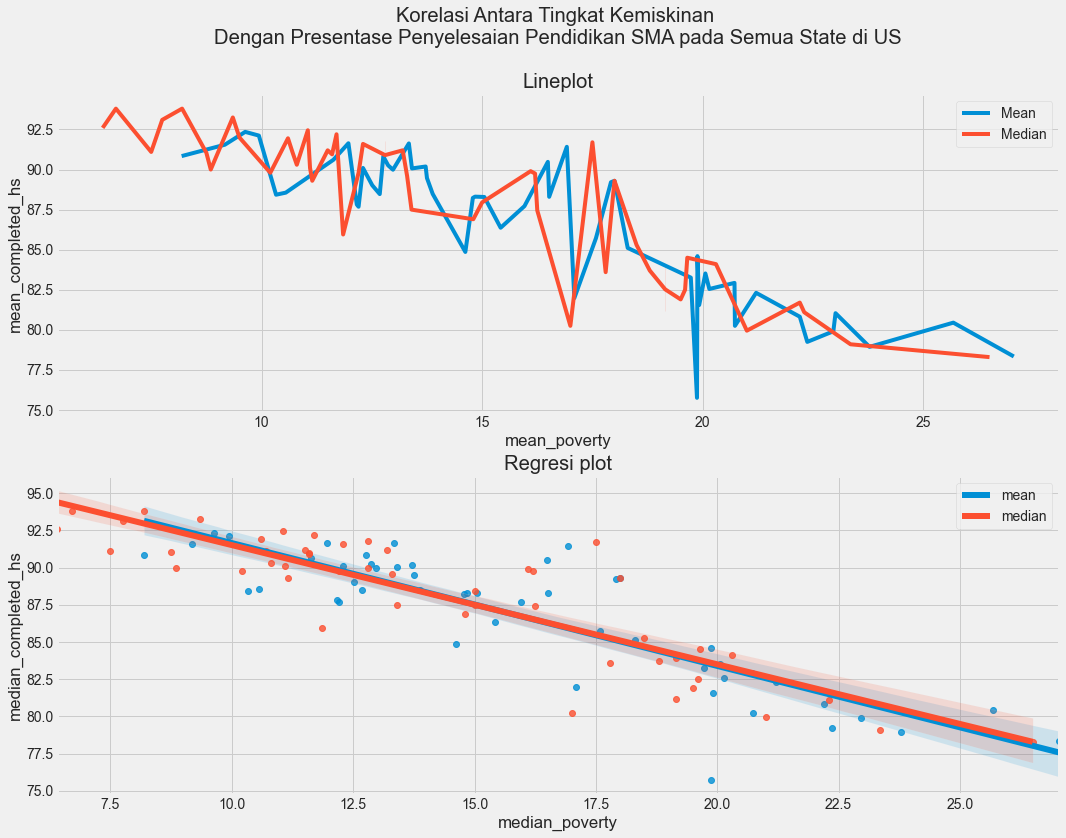

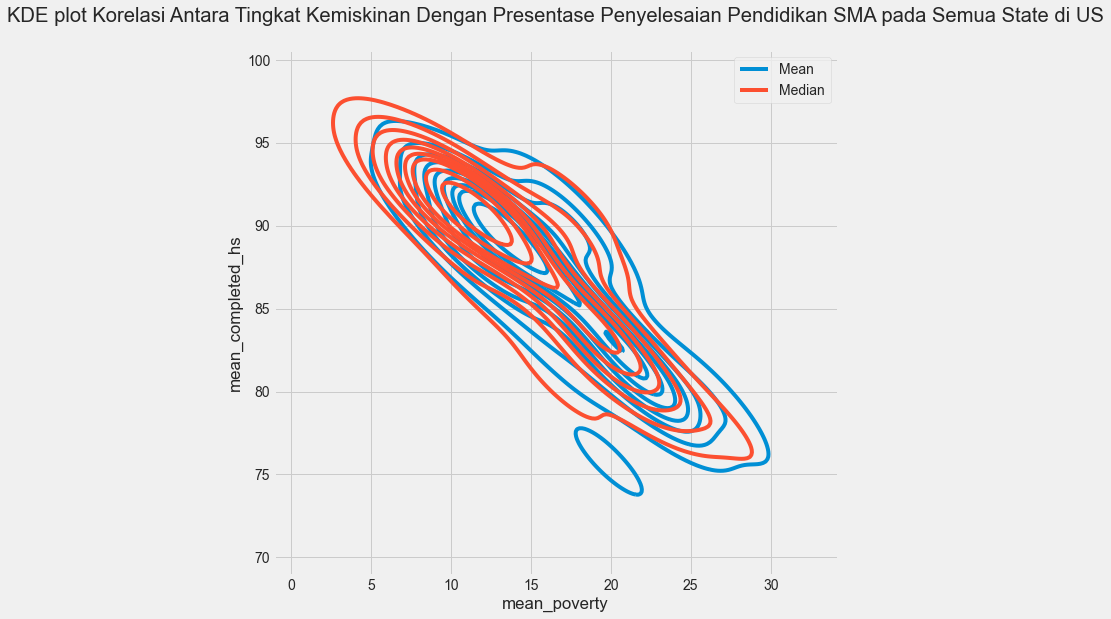

In [71]:
#plt.figure(figsize = (16,6))

fig, ax = plt.subplots(nrows= 2, ncols=1, figsize = (16,12))

#plt.title("Korelasi antara tingkat kemiskinan dengan presentase penyelesaian pendidikan SMA pada semua State di US")

sns.lineplot(data = top_poverty_completed_hs, x = "mean_poverty", y = "mean_completed_hs", ax = ax[0])
sns.lineplot(data = top_poverty_completed_hs, x = "median_poverty", y = "median_completed_hs", ax = ax[0])
ax[0].legend(["Mean", "Median"])
ax[0].set_title("Korelasi Antara Tingkat Kemiskinan \nDengan Presentase Penyelesaian Pendidikan SMA pada Semua State di US\n\nLineplot")

sns.regplot(data = top_poverty_completed_hs, x = "mean_poverty", y = "mean_completed_hs", ax = ax[1])
sns.regplot(data = top_poverty_completed_hs, x = "median_poverty", y = "median_completed_hs", ax = ax[1])
ax[1].legend(["mean", "median"])
ax[1].set_title("Regresi plot")

# -------------------------------------- #

plt.figure(figsize = (9, 9))
sns.kdeplot(data = top_poverty_completed_hs, x = "mean_poverty", y = "mean_completed_hs")
sns.kdeplot(data = top_poverty_completed_hs, x = "median_poverty", y = "median_completed_hs", )
plt.legend(["Mean", "Median"])
plt.title("KDE plot Korelasi Antara Tingkat Kemiskinan Dengan Presentase Penyelesaian Pendidikan SMA pada Semua State di US\n")

Text(0.5, 1.0, 'Regresi plot')

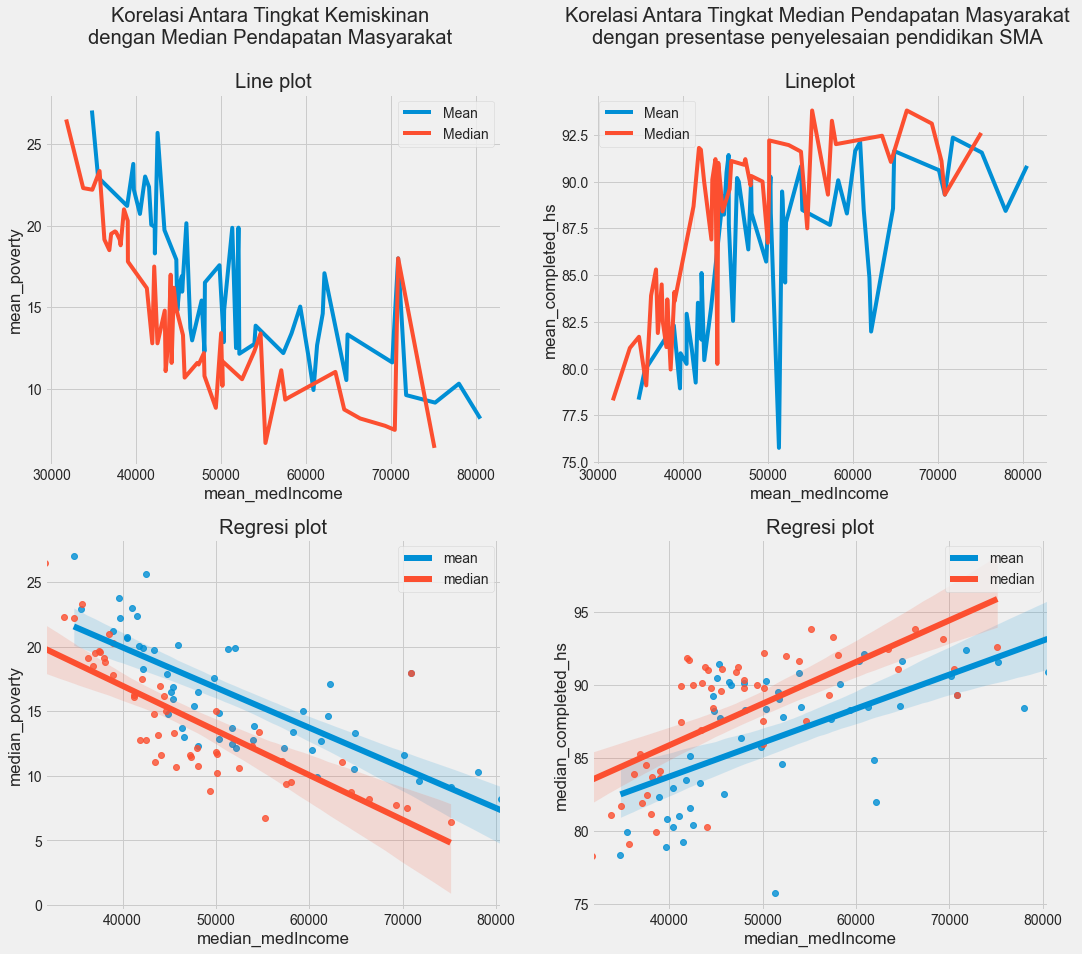

In [72]:
#plt.figure(figsize = (16,6))

fig, ax = plt.subplots(nrows= 2, ncols=2, figsize = (16,14))

#plt.title("Korelasi antara tingkat kemiskinan dengan presentase penyelesaian pendidikan SMA pada semua State di US")

sns.lineplot(data = top_poverty_completed_hs_medIncome, y = "mean_poverty", x = "mean_medIncome", ax = ax[0][0])
sns.lineplot(data = top_poverty_completed_hs_medIncome, y = "median_poverty", x = "median_medIncome", ax = ax[0][0])
ax[0][0].legend(["Mean", "Median"])
ax[0][0].set_title("Korelasi Antara Tingkat Kemiskinan \ndengan Median Pendapatan Masyarakat \n\nLine plot")

sns.regplot(data = top_poverty_completed_hs_medIncome, y = "mean_poverty", x = "mean_medIncome", ax = ax[1][0])
sns.regplot(data = top_poverty_completed_hs_medIncome, y = "median_poverty", x = "median_medIncome", ax = ax[1][0])
ax[1][0].legend(["mean", "median"])
ax[1][0].set_title("Regresi plot")

#----------------------------------------------------#

sns.lineplot(data = top_poverty_completed_hs_medIncome, x = "mean_medIncome", y = "mean_completed_hs", ax = ax[0][1])
sns.lineplot(data = top_poverty_completed_hs_medIncome, x = "median_medIncome", y = "median_completed_hs", ax = ax[0][1])
ax[0][1].legend(["Mean", "Median"])
ax[0][1].set_title("Korelasi Antara Tingkat Median Pendapatan Masyarakat \ndengan presentase penyelesaian pendidikan SMA \n\nLineplot")

sns.regplot(data = top_poverty_completed_hs_medIncome, x = "mean_medIncome", y = "mean_completed_hs", ax = ax[1][1])
sns.regplot(data = top_poverty_completed_hs_medIncome, x = "median_medIncome", y = "median_completed_hs", ax = ax[1][1])
ax[1][1].legend(["mean", "median"])
ax[1][1].set_title("Regresi plot")

In [73]:
race_poverty_level_hs_medIncome

Geographic Area    State                    City  share_white  \
0                  AL  Alabama              Abanda CDP         67.2   
1                  AL  Alabama          Abbeville city         54.4   
2                  AL  Alabama         Adamsville city         52.3   
3                  AL  Alabama            Addison town         99.1   
4                  AL  Alabama              Akron town         13.2   
...               ...      ...                     ...          ...   
29110              WY  Wyoming  Woods Landing-Jelm CDP         95.9   
29111              WY  Wyoming            Worland city         89.9   
29112              WY  Wyoming             Wright town         94.5   
29113              WY  Wyoming              Yoder town         97.4   
29114              WY  Wyoming           Y-O Ranch CDP         92.8   

       share_black  share_native_american  share_asian  share_hispanic  \
0             30.2                    0.0          0.0             1.6   
1             41.4                    0.1          1.0             3.1   
2             44.9                    0.5          0.3             2.3   
3              0.1                    0.0          0.1             0.4   
4             86.5                    0.0          0.0             0.3   
...            ...                    ...          ...             ...   
29110          0.0                    0.0          2.1             0.0   
29111          0.3                    1.3          0.6            16.6   
29112          0.1                    1.4          0.2             6.2   
29113          0.0                    0.0          0.0             4.0   
29114          1.5                    2.6          0.0            11.8   

       poverty_rate  percent_completed_hs  Median Income  
0              78.8                  21.2        11207.0  
1              29.1                  69.1        25615.0  
2              25.5                  78.9        42575.0  
3              30.7                  81.4        37083.0  
4              42.0                  68.6        21667.0  
...             ...                   ...            ...  
29110          18.6                 100.0            NaN  
29111          15.3                  85.6        41523.0  
29112           5.9                  89.2        77114.0  
29113           5.4                  79.4        37500.0  
29114           0.0                 100.0            NaN  

[29115 rows x 11 columns]

### Bagaimanakah persebaran ras pada tiap negara bagian?

In [74]:
race_share = race_poverty_level_hs_medIncome.groupby(["State"])["share_white", 
                                                                "share_black", 
                                                                "share_native_american", 
                                                                "share_asian", 
                                                                "share_hispanic"].mean().round(2)
race_share

share_white  share_black  share_native_american  \
State                                                                   
Alabama                     72.47        23.36                   0.66   
Alaska                      45.40         0.56                  46.11   
Arizona                     59.95         0.96                  28.64   
Arkansas                    78.43        16.36                   0.75   
California                  71.95         2.69                   1.73   
Colorado                    87.74         0.92                   1.63   
Connecticut                 86.08         5.01                   0.66   
Delaware                    76.25        15.39                   0.52   
District of Columbia        38.50        50.70                   0.30   
Florida                     78.74        13.41                   0.46   
Georgia                     62.71        30.55                   0.30   
Hawaii                      33.45         1.08                   0.38   
Idaho                       88.79         0.30                   2.53   
Illinois                    90.36         4.71                   0.26   
Indiana                     94.92         1.65                   0.27   
Iowa                        96.70         0.56                   0.27   
Kansas                      92.98         0.96                   1.86   
Kentucky                    92.26         4.40                   0.21   
Louisiana                   64.81        30.78                   0.96   
Maine                       95.72         0.83                   0.55   
Maryland                    72.22        19.35                   0.34   
Massachusetts               89.67         2.80                   0.27   
Michigan                    90.65         4.14                   1.08   
Minnesota                   91.78         1.00                   3.37   
Mississippi                 53.49        42.13                   1.63   
Missouri                    90.42         5.90                   0.54   
Montana                     84.43         0.23                  11.92   
Nebraska                    94.72         0.42                   1.56   
Nevada                      82.33         1.57                   5.58   
New Hampshire               95.68         0.72                   0.29   
New Jersey                  80.88         6.99                   0.26   
New Mexico                  65.42         0.67                  15.40   
New York                    88.84         4.02                   0.36   
North Carolina              71.47        20.44                   1.79   
North Dakota                92.29         0.36                   5.33   
Ohio                        92.83         3.93                   0.21   
Oklahoma                    72.86         3.39                  14.42   
Oregon                      87.61         0.53                   2.59   
Pennsylvania                93.24         3.28                   0.16   
Rhode Island                89.23         2.99                   0.67   
South Carolina              61.98        32.83                   0.46   
South Dakota                84.78         0.29                  12.06   
Tennessee                   88.99         7.27                   0.32   
Texas                       82.52         5.91                   0.66   
Utah                        89.41         0.38                   3.90   
Vermont                     95.94         0.78                   0.35   
Virginia                    74.59        16.50                   0.34   
Washington                  82.67         1.41                   3.69   
West Virginia               95.03         2.93                   0.20   
Wisconsin                   92.95         0.94                   2.63   
Wyoming                     92.37         0.40                   3.10   

                      share_asian  share_hispanic  
State                                              
Alabama                      0.48            2.9

<AxesSubplot:xlabel='State'>

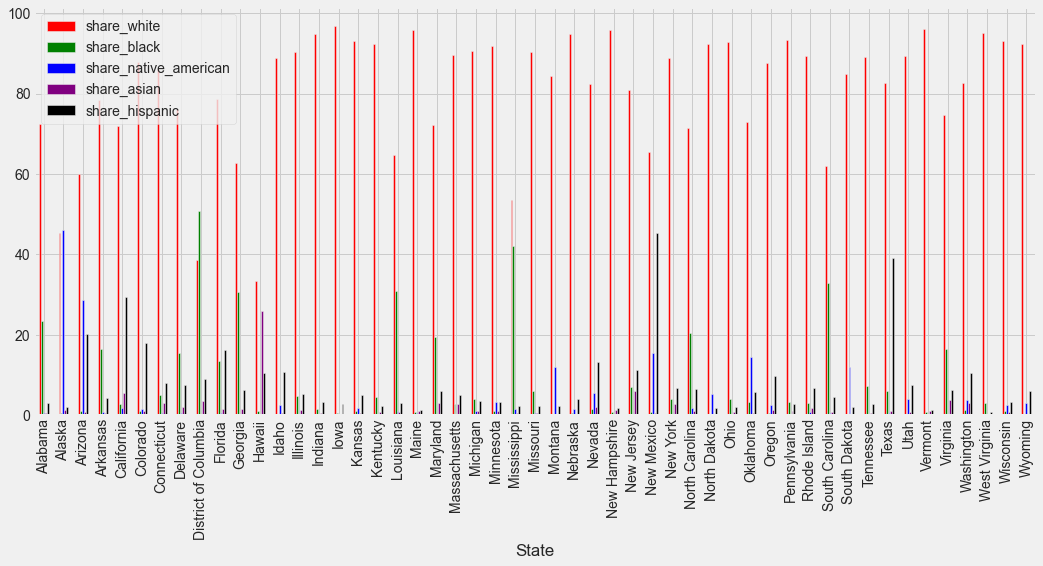

In [75]:
race_share.plot(kind = "bar", figsize = (16,7), color = ["red", "green", "blue", "purple", "black"])

### Bagaimana perbandingan ras yang menjadi korban penembakan polisi jika dibandingkan dengan total presentase seluruh persebaran ras pada seluruh Amerika Serikat?

In [76]:
death_by_police_preproses

name  Tanggal  Bulan  Tahun   manner_of_death       armed  \
0             Tim Elliot        2      1     15              shot         gun   
1       Lewis Lee Lembke        2      1     15              shot         gun   
2     John Paul Quintero        3      1     15  shot and Tasered     unarmed   
3        Matthew Hoffman        4      1     15              shot  toy weapon   
4      Michael Rodriguez        4      1     15              shot    nail gun   
...                  ...      ...    ...    ...               ...         ...   
2530    Rodney E. Jacobs       28      7     17              shot         gun   
2531               TK TK       28      7     17              shot     vehicle   
2532  Dennis W. Robinson       29      7     17              shot         gun   
2533       Isaiah Tucker       31      7     17              shot     vehicle   
2534        Dwayne Jeune       31      7     17              shot       knife   

       age gender      race           city state  signs_of_mental_illness  \
0     53.0      M     Asian        Shelton    WA                     True   
1     47.0      M     White          Aloha    OR                    False   
2     23.0      M  Hispanic        Wichita    KS                    False   
3     32.0      M     White  San Francisco    CA                     True   
4     39.0      M  Hispanic          Evans    CO                    False   
...    ...    ...       ...            ...   ...                      ...   
2530  31.0      M       NaN    Kansas City    MO                    False   
2531   NaN      M       NaN    Albuquerque    NM                    False   
2532  48.0      M       NaN          Melba    ID                    False   
2533  28.0      M     Black        Oshkosh    WI                    False   
2534  32.0      M     Black       Brooklyn    NY                     True   

     threat_level         flee  body_camera  
0          attack  Not fleeing        False  
1          attack  Not fleeing        False  
2           other  Not fleeing        False  
3          attack  Not fleeing        False  
4          attack  Not fleeing        False  
...           ...          ...          ...  
2530       attack  Not fleeing        False  
2531       attack          Car        False  
2532       attack          Car        False  
2533       attack          Car         True  
2534       attack  Not fleeing        False  

[2535 rows x 15 columns]

In [77]:
death_by_police_race_pct = (death_by_police_preproses.groupby("race").race.count() / len(death_by_police_preproses) * 100).round(2).to_frame()
death_by_police_race_pct

race
race                  
Asian             1.54
Black            24.38
Hispanic         16.69
Native_american   1.22
Other             1.10
White            47.38

In [78]:
race_share_general = race_share.mean(axis = "index").to_frame().round(2)
race_share_general.columns = ["Presentase"]
race_share_general

Presentase
share_white                 80.97
share_black                  7.84
share_native_american        3.62
share_asian                  1.84
share_hispanic               7.73

[]

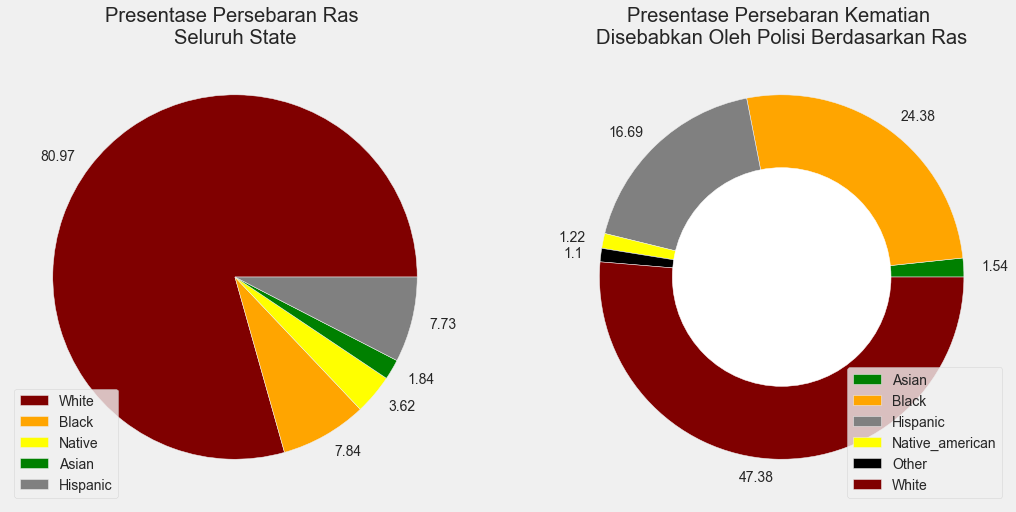

In [79]:
#plt.figure(figsize = (9, 9))

fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize = (16, 9))

ax[0].pie(race_share_general.Presentase, labels = race_share_general.Presentase,
          colors = ["maroon", "orange", "yellow", "green", "grey"])
ax[0].legend(["White", "Black", "Native", "Asian", "Hispanic"], loc = "lower left")
ax[0].set_title("Presentase Persebaran Ras \nSeluruh State")


# ---------------------------- #

centre_circle = plt.Circle( (0,0), 0.6, color = "white") # buat lingkaran tengah
plt.pie(death_by_police_race_pct.race, labels = death_by_police_race_pct.race,
        colors= ["green", "orange", "grey", "yellow", "Black", "maroon"]) # utama
p = plt.gcf() # ambil titik tengah
p.gca().add_artist(centre_circle) # pasang lingkaran tengah
plt.legend(death_by_police_race_pct.index, loc = "lower right")
plt.title("Presentase Persebaran Kematian \nDisebabkan Oleh Polisi Berdasarkan Ras")
plt.plot()

### Bagaimana persebaran gender dan tanda bahwa korban mempunyai penyakit mental?

In [80]:
gender_pct = death_by_police_preproses.groupby("gender").gender.count().to_frame()
gender_pct

gender
gender        
F          107
M         2428

In [81]:
mental_pct = death_by_police_preproses.groupby("signs_of_mental_illness").signs_of_mental_illness.count().to_frame()
mental_pct

signs_of_mental_illness
signs_of_mental_illness                         
False                                       1902
True                                         633

In [82]:
gender_mental = death_by_police_preproses.groupby(["gender", "signs_of_mental_illness"]).gender.count().unstack()
gender_mental

signs_of_mental_illness  False  True 
gender                               
F                           68     39
M                         1834    594

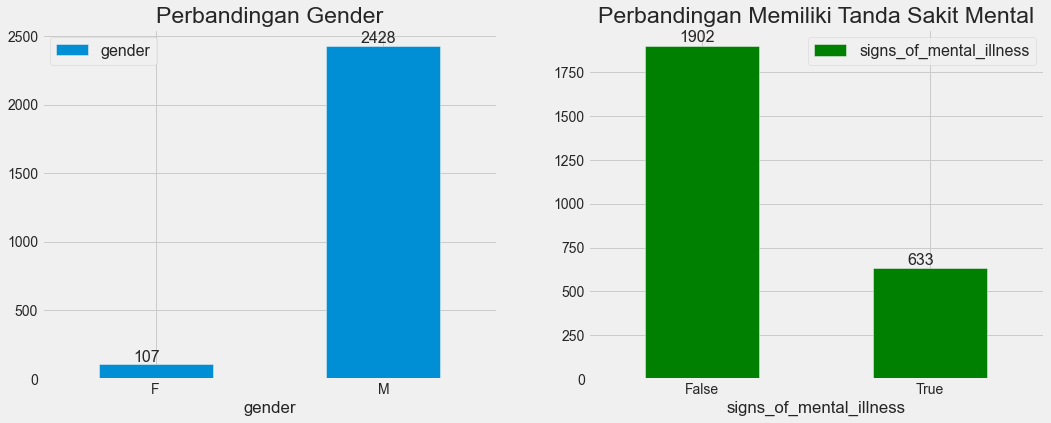

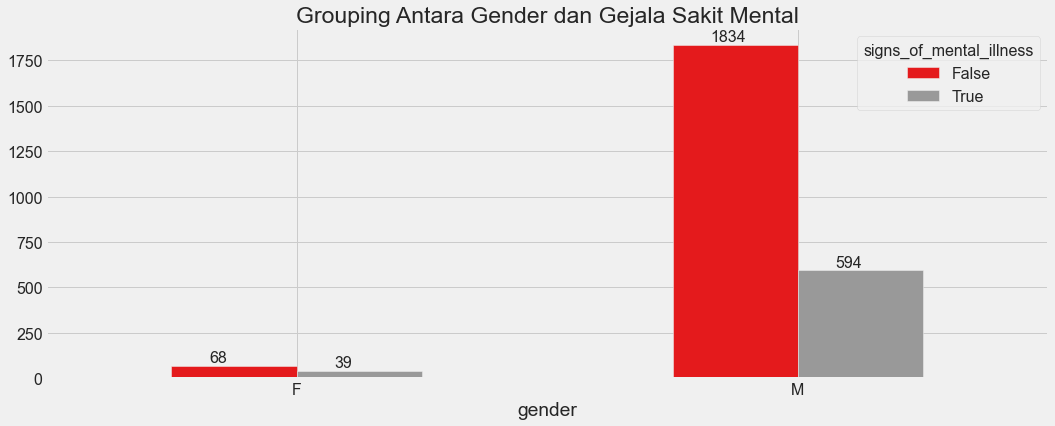

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))
plt.rcParams.update({"font.size" : 16})

gender_pct.plot(kind = "bar", ax = ax[0], rot = 0)
ax[0].set_title("Perbandingan Gender")

for p in ax[0].patches:
    ax[0].annotate('{:.0f}'.format( p.get_height() ), 
                ( p.get_x() + 0.15, p.get_height() + 20))
# ----------------

mental_pct.plot(kind = "bar", ax = ax[1], color = "green", rot = 0)
ax[1].set_title("Perbandingan Memiliki Tanda Sakit Mental")

for p in ax[1].patches:
    ax[1].annotate("{:.0f}".format(p.get_height()),
                   (p.get_x()+ 0.15, p.get_height() + 20 )) 

# ----------------
fig, ax1 = plt.subplots(ncols = 1, nrows = 1, figsize = (16, 6))

gender_mental.plot(kind = "bar", colormap = "Set1", rot = 0, title = "Grouping Antara Gender dan Gejala Sakit Mental", ax = ax1)

for p in ax1.patches:
    ax1.annotate("{:.0f}".format((p.get_height())),
                 (p.get_x() + 0.075, p.get_height() + 20))

### Bagaimana persebaran jenis senjata yang digunakan korban saat kejadian?

In [84]:
armed_death = death_by_police_preproses.groupby("armed").armed.count().sort_values(ascending = False).to_frame()
armed_death.columns = ["Jumlah"]
armed_death

Jumlah
armed                  
gun                1398
knife               373
vehicle             177
unarmed             171
undetermined        117
...                 ...
bayonet               1
hand torch            1
metal hand tool       1
machete and gun       1
bean-bag gun          1

[68 rows x 1 columns]

In [85]:
armed_death_change = armed_death.copy()
armed_death_change_index = []
for index in armed_death.index:
    if (index == "gun") or (index == "knife") or (index == "vehicle") or (index == "unarmed"):
        pass
    else:
        armed_death_change_index.append(index)

In [86]:
armed_death_change = armed_death_change.reset_index().replace(armed_death_change_index, "other").groupby("armed").Jumlah.sum().to_frame().sort_values("Jumlah", ascending = False)
armed_death_change

Jumlah
armed          
gun        1398
other       407
knife       373
vehicle     177
unarmed     171

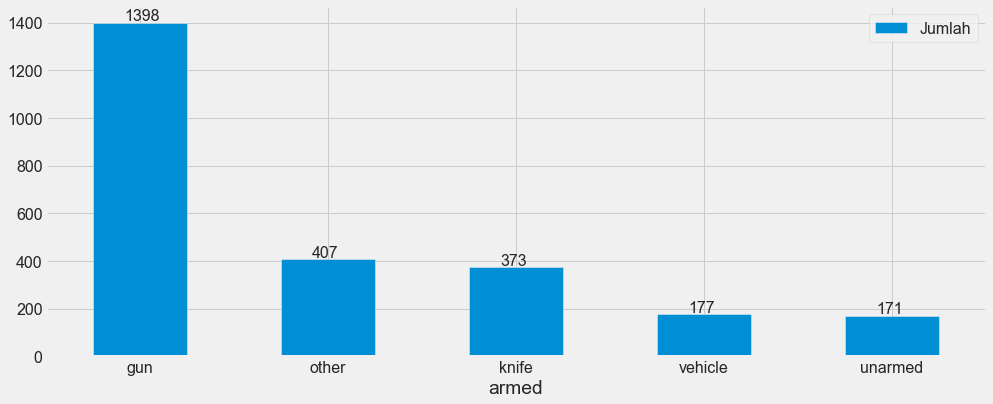

In [152]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,6))

armed_death_change.plot(kind = "bar",
                        rot = 0, ax = ax)
plt.rcParams.update({"font.size" : 16})

for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
          (p.get_x() + 0.165, p.get_height() + 10))

In [157]:
unarmed_case = death_by_police_preproses.loc[death_by_police_preproses.armed == "unarmed"]
unarmed_case

name  Tanggal    Bulan  Tahun   manner_of_death    armed  \
2      John Paul Quintero        3  Januari     15  shot and Tasered  unarmed   
8           Autumn Steele        6  Januari     15              shot  unarmed   
17    Artago Damon Howard        8  Januari     15              shot  unarmed   
62     Joshua Omar Garcia       26  Januari     15              shot  unarmed   
71           Ralph Willis       29  Januari     15              shot  unarmed   
...                   ...      ...      ...    ...               ...      ...   
2346      Hayden J. Stutz       24      Mei     17              shot  unarmed   
2425  Armando Garcia-Muro       22     Juni     17              shot  unarmed   
2440         Aaron Bailey       29     Juni     17              shot  unarmed   
2494       Justine Damond       15     Juli     17              shot  unarmed   
2506       Farhad Jabbari       19     Juli     17              shot  unarmed   

       age gender      race          city state  signs_of_mental_illness  \
2     23.0      M  Hispanic       Wichita    KS                    False   
8     34.0      F     White    Burlington    IA                    False   
17    36.0      M     Black        Strong    AR                    False   
62    24.0      M  Hispanic        Tahoka    TX                    False   
71    42.0      M     White    Stillwater    OK                    False   
...    ...    ...       ...           ...   ...                      ...   
2346  24.0      M     White        Canton    OH                     True   
2425  17.0      M  Hispanic      Palmdale    CA                    False   
2440  45.0      M     Black  Indianapolis    IN                    False   
2494  40.0      F     White   Minneapolis    MN                    False   
2506  38.0      M       NaN       Saginaw    MI                    False   

      threat_level         flee  body_camera armed_update  
2            other  Not fleeing        False      unarmed  
8            other  Not fleeing         True      unarmed  
17          attack  Not fleeing        False      unarmed  
62           other          Car        False      unarmed  
71           other         Foot        False      unarmed  
...            ...          ...          ...          ...  
2346        attack  Not fleeing         True      unarmed  
2425         other  Not fleeing        False      unarmed  
2440         other          Car        False      unarmed  
2494  undetermined  Not fleeing        False      unarmed  
2506        attack  Not fleeing        False      unarmed  

[171 rows x 16 columns]

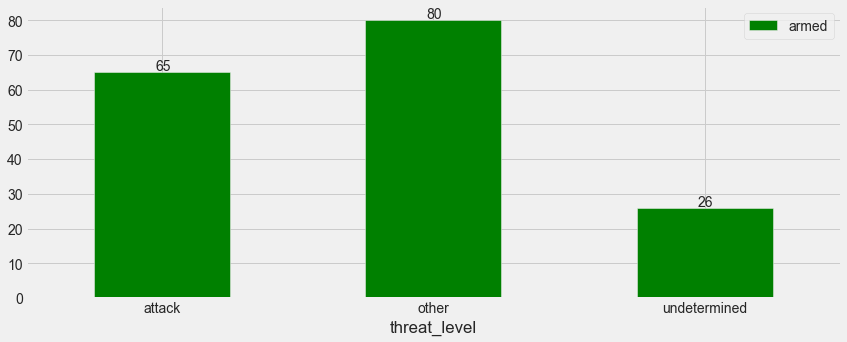

In [226]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,6))

unarmed_case.groupby(["threat_level"]).armed.count().to_frame().plot(kind = "bar", color = "green",
                                                          figsize = (13,5), rot = 0, ax = ax)


for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
               (p.get_x() + 0.225, p.get_height() + 0.5))

In [232]:
threat_race = unarmed_case.groupby(["threat_level", "race"]).armed.count().to_frame().reset_index()#.plot(kind = "bar", color = "green",
                                                          #figsize = (13,5), rot = 45)

threat_race

threat_level             race  armed
0         attack            Black     24
1         attack         Hispanic     10
2         attack            Other      1
3         attack            White     29
4          other            Black     29
5          other         Hispanic     17
6          other  Native_american      1
7          other            Other      3
8          other            White     30
9   undetermined            Black     10
10  undetermined         Hispanic      7
11  undetermined  Native_american      1
12  undetermined            White      8

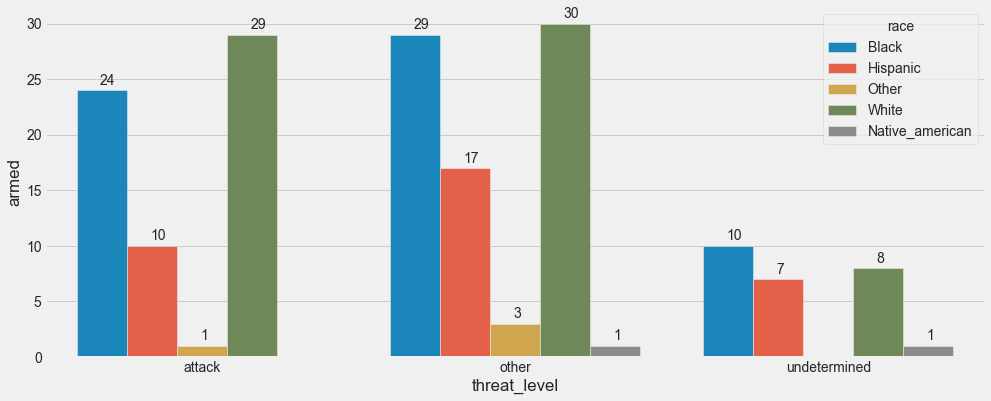

In [234]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,6))

sns.barplot(threat_race.threat_level, threat_race.armed, hue = threat_race.race, ax = ax)

for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
               (p.get_x() + 0.075, p.get_height() + 0.5))

In [186]:
threat_flee = unarmed_case.groupby(["threat_level", 
                            "flee"]).armed.count().to_frame().reset_index()

threat_flee

threat_level         flee  armed
0         attack          Car      1
1         attack         Foot     14
2         attack  Not fleeing     46
3         attack        Other      3
4          other          Car     21
5          other         Foot     17
6          other  Not fleeing     38
7          other        Other      1
8   undetermined          Car      6
9   undetermined         Foot      4
10  undetermined  Not fleeing     14
11  undetermined        Other      2

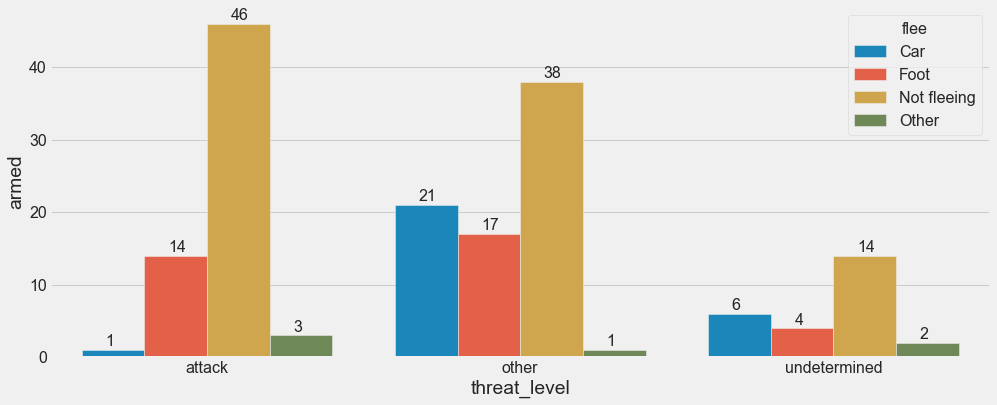

In [201]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,6))

sns.barplot(threat_flee.threat_level, threat_flee.armed, hue = threat_flee.flee, ax = ax)
plt.rcParams.update({"font.size" : 16})

for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
               (p.get_x() + 0.075, p.get_height() + 0.5))

In [203]:
plt.rcParams.update({"font.size" : 14})

In [261]:
race_flee_unarmed = unarmed_case.groupby(["race", "flee"]).state.count().to_frame().reset_index()#.set_index(["threat_level", "race"])
race_flee_unarmed

race         flee  state
0             Black          Car      9
1             Black         Foot     17
2             Black  Not fleeing     32
3             Black        Other      4
4          Hispanic          Car      5
5          Hispanic         Foot      6
6          Hispanic  Not fleeing     21
7          Hispanic        Other      1
8   Native_american         Foot      2
9             Other         Foot      1
10            Other  Not fleeing      3
11            White          Car     14
12            White         Foot      9
13            White  Not fleeing     41
14            White        Other      1

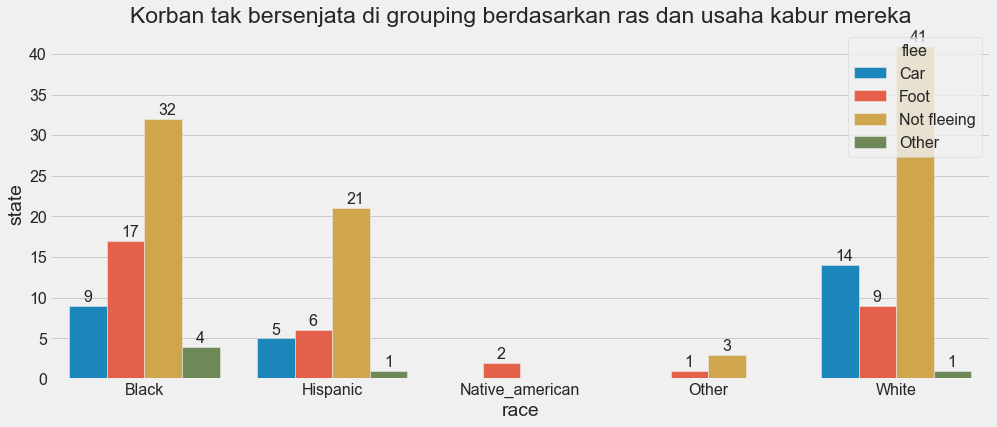

In [264]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,6))

sns.barplot(race_flee_unarmed.race, race_flee_unarmed.state, 
            hue = race_flee_unarmed.flee, ax = ax)
plt.rcParams.update({"font.size" : 16})

ax.set_title("Korban tak bersenjata di grouping berdasarkan ras dan usaha kabur mereka")

for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
               (p.get_x() + 0.075, p.get_height() + 0.5))

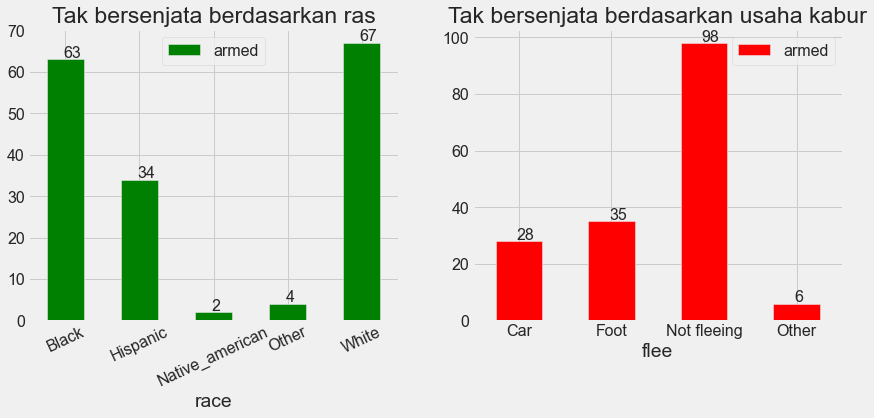

In [273]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (15,6))

unarmed_case.groupby(["race"]).armed.count().to_frame().plot(kind = "bar", color = "green",
                                                          figsize = (13,5), rot = 25, ax = ax[0])
ax[0].set_title("Tak bersenjata berdasarkan ras")


for p in ax[0].patches:
    ax[0].annotate("{:.0f}".format((p.get_height())),
               (p.get_x() + 0.225, p.get_height() + 0.5))
    
# -----------------------------------------------------
    
unarmed_case.groupby(["flee"]).armed.count().to_frame().plot(kind = "bar", color = "red",
                                                          figsize = (13,5), rot = 0, ax = ax[1])

ax[1].set_title("Tak bersenjata berdasarkan usaha kabur")


for p in ax[1].patches:
    ax[1].annotate("{:.0f}".format((p.get_height())),
               (p.get_x() + 0.225, p.get_height() + 0.5))

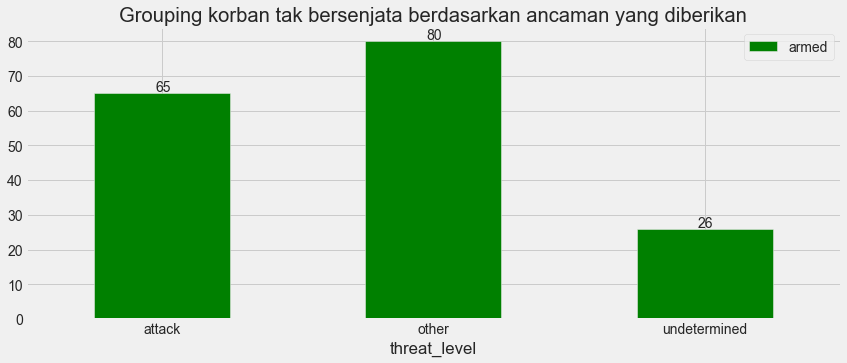

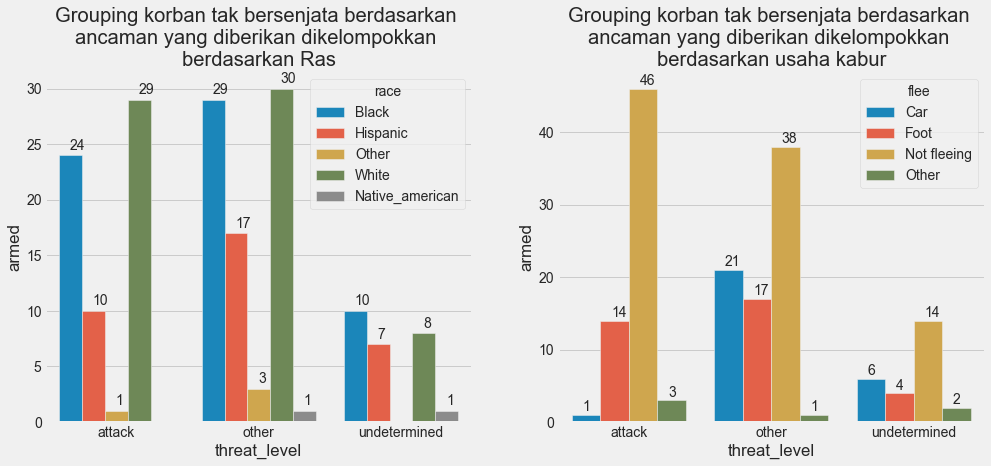

In [243]:
# gabungan tiga di atas

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (15,6))

unarmed_case.groupby(["threat_level"]).armed.count().to_frame().plot(kind = "bar", color = "green",
                                                          figsize = (13,5), rot = 0, ax = ax)
ax.set_title("Grouping korban tak bersenjata berdasarkan ancaman yang diberikan")


for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
               (p.get_x() + 0.225, p.get_height() + 0.5))
    
# ------------------------------------------------
    
fig, ax1 = plt.subplots(nrows=1, ncols=2, figsize = (15,6))

sns.barplot(threat_race.threat_level, threat_race.armed, hue = threat_race.race, ax = ax1[0])
ax1[0].set_title("Grouping korban tak bersenjata berdasarkan \nancaman yang diberikan dikelompokkan \nberdasarkan Ras")

for p in ax1[0].patches:
    ax1[0].annotate("{:.0f}".format((p.get_height())),
               (p.get_x() + 0.075, p.get_height() + 0.5))
    

sns.barplot(threat_flee.threat_level, threat_flee.armed, hue = threat_flee.flee, ax = ax1[1])
ax1[1].set_title("Grouping korban tak bersenjata berdasarkan \nancaman yang diberikan dikelompokkan \nberdasarkan usaha kabur")

for p in ax1[1].patches:
    ax1[1].annotate("{:.0f}".format((p.get_height())),
               (p.get_x() + 0.075, p.get_height() + 0.5))

### Bagaimana bentuk persebaran umur para korban? dan adakah korelasi antara umur dengan kategori lainnya?

In [153]:
plt.rcParams.update({"font.size" : 12})

In [88]:
death_by_police_preproses["armed_update"] = death_by_police_preproses.armed.replace(armed_death_change_index, "other")

In [89]:
death_by_police_preproses

name  Tanggal  Bulan  Tahun   manner_of_death       armed  \
0             Tim Elliot        2      1     15              shot         gun   
1       Lewis Lee Lembke        2      1     15              shot         gun   
2     John Paul Quintero        3      1     15  shot and Tasered     unarmed   
3        Matthew Hoffman        4      1     15              shot  toy weapon   
4      Michael Rodriguez        4      1     15              shot    nail gun   
...                  ...      ...    ...    ...               ...         ...   
2530    Rodney E. Jacobs       28      7     17              shot         gun   
2531               TK TK       28      7     17              shot     vehicle   
2532  Dennis W. Robinson       29      7     17              shot         gun   
2533       Isaiah Tucker       31      7     17              shot     vehicle   
2534        Dwayne Jeune       31      7     17              shot       knife   

       age gender      race           city state  signs_of_mental_illness  \
0     53.0      M     Asian        Shelton    WA                     True   
1     47.0      M     White          Aloha    OR                    False   
2     23.0      M  Hispanic        Wichita    KS                    False   
3     32.0      M     White  San Francisco    CA                     True   
4     39.0      M  Hispanic          Evans    CO                    False   
...    ...    ...       ...            ...   ...                      ...   
2530  31.0      M       NaN    Kansas City    MO                    False   
2531   NaN      M       NaN    Albuquerque    NM                    False   
2532  48.0      M       NaN          Melba    ID                    False   
2533  28.0      M     Black        Oshkosh    WI                    False   
2534  32.0      M     Black       Brooklyn    NY                     True   

     threat_level         flee  body_camera armed_update  
0          attack  Not fleeing        False          gun  
1          attack  Not fleeing        False          gun  
2           other  Not fleeing        False      unarmed  
3          attack  Not fleeing        False        other  
4          attack  Not fleeing        False        other  
...           ...          ...          ...          ...  
2530       attack  Not fleeing        False          gun  
2531       attack          Car        False      vehicle  
2532       attack          Car        False          gun  
2533       attack          Car         True      vehicle  
2534       attack  Not fleeing        False        knife  

[2535 rows x 16 columns]

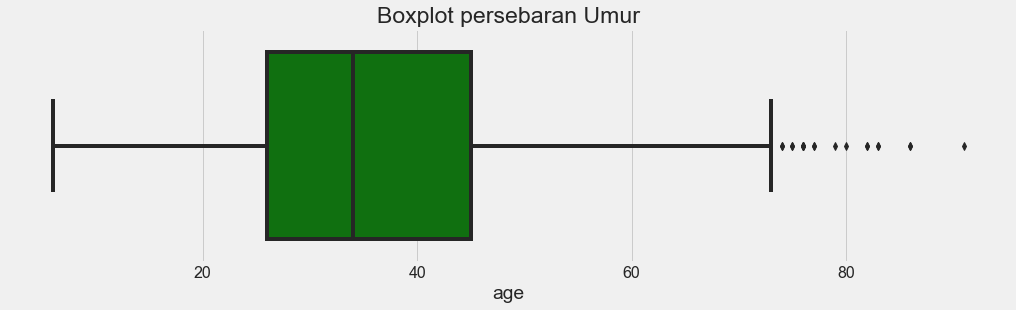

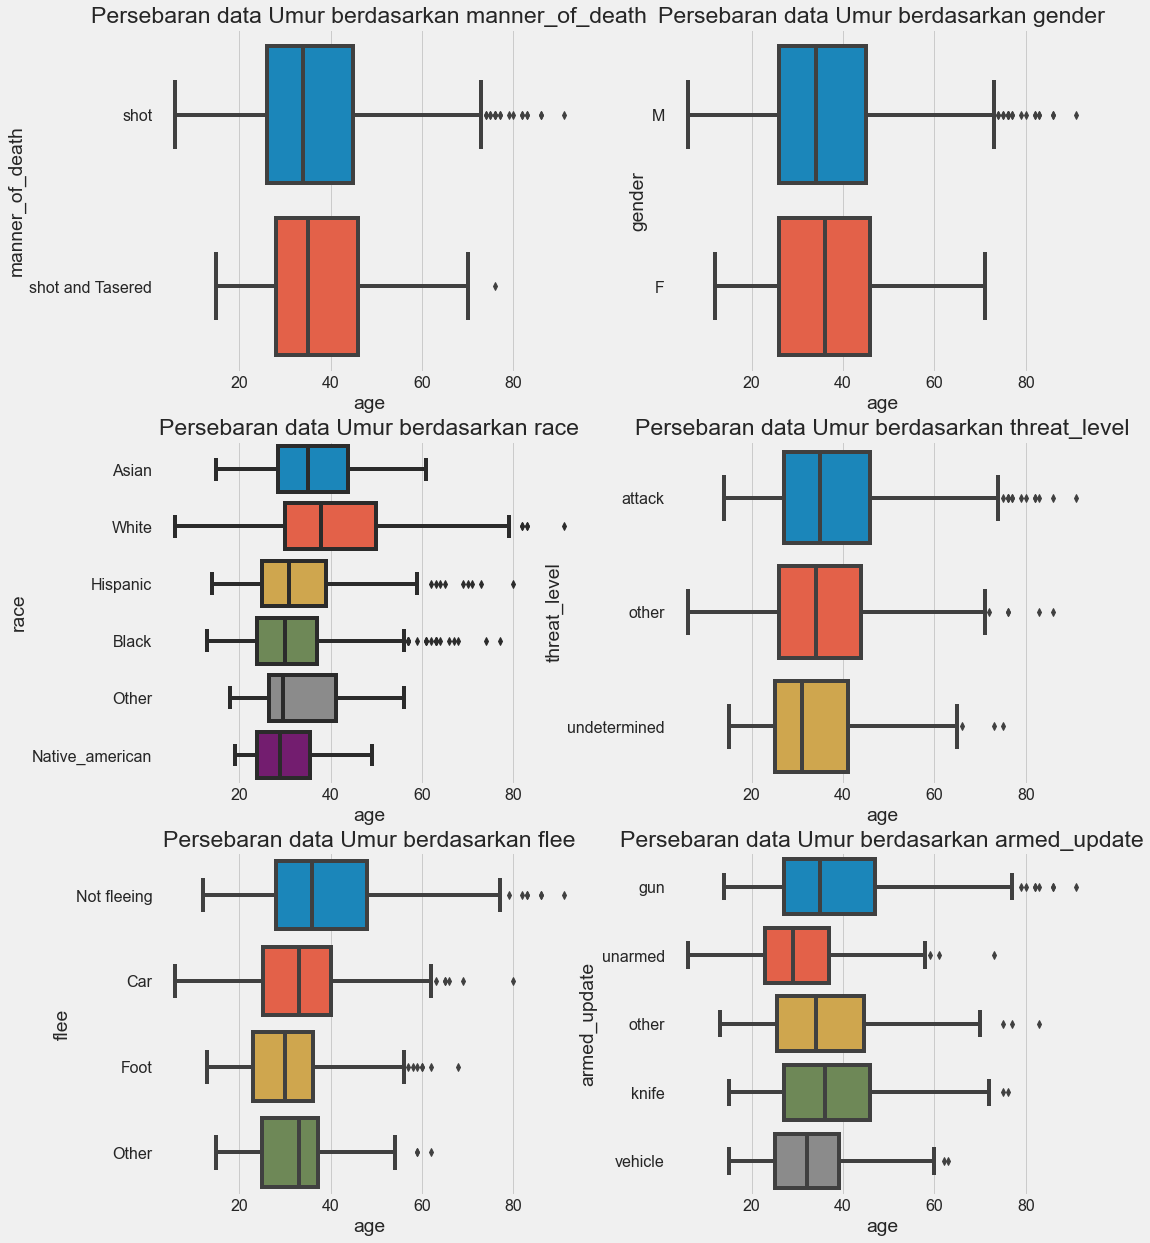

In [293]:
plt.figure(figsize = (16, 4))
sns.boxplot(data = death_by_police_preproses, x = "age",
            color= "green")
plt.title("Boxplot persebaran Umur")

# ------------------------------ #

fig, ax = plt.subplots(nrows= 3, ncols= 2, figsize = (15, 20))

i = 0
p = 0

for kolom in death_by_police_preproses.columns:
    if (kolom == "manner_of_death") | (kolom == "threat_level") | (kolom == "flee") | (kolom == "gender") | (kolom == "race") |(kolom == "armed_update"):
        sns.boxplot(data = death_by_police_preproses, x = "age", y = kolom, ax = ax[i][p])
        ax[i][p].set_title(f"Persebaran data Umur berdasarkan {kolom}")
        if p == 1:
            i += 1
            p = 0
        else:
            p += 1

In [283]:
death_by_police_preproses.loc[death_by_police_preproses.age < 17].sort_values("age", ascending = False)

name  Tanggal      Bulan  Tahun   manner_of_death  \
110            Jason C. Hendrix       14   Februari     15              shot   
1190             Jose Raul Cruz       13      Maret     16              shot   
2305              Jayson Negron        9        Mei     17              shot   
2269             Kendell Wilson       24      April     17              shot   
2251   Isaiah Murrietta-Golding       15      April     17              shot   
2177    Elena "Ebbie" Mondragon       14      Maret     17              shot   
1999  Marlon Joel Rodas-Sanchez       18    Januari     17  shot and Tasered   
1723               Daniel Perez        2    Oktober     16              shot   
136          A'Donte Washington       23   Februari     15              shot   
1274               Pierre Loury       11      April     16              shot   
1216            Robert Dentmond       20      Maret     16              shot   
2519                Aries Clark       25       Juli     17              shot   
1143                Robert Keil       24   Februari     16              shot   
1087                Jose Mendez        6   Februari     16              shot   
862             Shane Whitehead       15   November     15              shot   
205               Kendre Alston       19      Maret     15              shot   
1845                 Luke Smith       19   November     16  shot and Tasered   
776        Jorge Santiago Tapia       15    Oktober     15              shot   
596                 Andre Green        9    Agustus     15              shot   
2267             Daezion Turner       24      April     17              shot   
435                 Zane Terryn       14       Juni     15              shot   
2282             Jordan Edwards       29      April     17              shot   
2298             Jacob Peterson        6        Mei     17              shot   
1294            Jorevis Scruggs       19      April     16              shot   
1585         Jesse James Romero        9    Agustus     16              shot   
1678                  Tyre King       14  September     16              shot   
1014                Ciara Meyer       11    Januari     16              shot   
830               Jeremy Mardis        3   November     15              shot   

               armed   age gender      race           city state  \
110              gun  16.0      M     White          Essex    MD   
1190         unarmed  16.0      M  Hispanic        Addison    TX   
2305         vehicle  16.0      M  Hispanic     Bridgeport    CT   
2269             gun  16.0      M     Black        Houston    TX   
2251    undetermined  16.0      M  Hispanic         Fresno    CA   
2177         unarmed  16.0      F  Hispanic        Hayward    CA   
1999           knife  16.0      M  Hispanic        Salinas    CA   
1723      toy weapon  16.0      M  Hispanic    Los Angeles    CA   
136              gun  16.0      M     Black      Millbrook    AL   
1274             gun  16.0      M     Black        Chicago    IL   
1216      toy weapon  16.0      M     Black    Gainesville    FL   
2519    undetermined  16.0      M     Black         Marion    AR   
1143           knife  16.0      M     White   Blue Springs    MO   
1087             gun  16.0      M  Hispanic    Los Angeles    CA   
862   unknown weapon  16.0      M     Black     Germantown    PA   
205              gun  16.0      M     Black   Jacksonville    FL   
1845           knife  15.0      M     Asian    Watsonville    CA   
776              gun  15.0      M  Hispanic          Miami    FL   
596          vehicle  15.0      M     Black   Indianapolis    IN   
2267             gun  15.0      M       NaN        Killeen    TX   
435              gun  15.0      M     White          Cocoa    FL   
2282         unarmed  15.0      M     Black  Balch Springs    TX   
2298      toy weapon  15.0      M     White      San Diego    CA   
1294             gun  15.0      M     Black      St. Louis    MO   
1585  

In [285]:
death_by_police_preproses.loc[death_by_police_preproses.age > 75].sort_values("age", ascending = False)

name  Tanggal      Bulan  Tahun   manner_of_death  \
2160       Frank W. Wratny        8      Maret     17              shot   
426      Raymond  Phillips       11       Juni     15              shot   
1675          Eugene Craig       12  September     16              shot   
275    Richard Dale Weaver       12      April     15              shot   
1878      Quinton Phillips        1   Desember     16              shot   
1631        Darrel Hetrick       27    Agustus     16              shot   
2390    Theodore Brendecke        9       Juni     17              shot   
1431       Edward Acquisto       13       Juni     16              shot   
2268         Robert Becker       24      April     17              shot   
127         Douglas Harris       20   Februari     15              shot   
598   Robert Patrick Quinn        9    Agustus     15              shot   
315          Albert Hanson       26      April     15              shot   
518       Charles Crandall       14       Juli     15              shot   
664    Charles Robert Shaw        1  September     15              shot   
1217   Ralph "Phil" Grenon       21      Maret     16  shot and Tasered   
1798         Henry Simpson        1   November     16              shot   

           armed   age gender      race            city state  \
2160         gun  91.0      M     White  Union Township    PA   
426          gun  86.0      M       NaN        Columbia    TN   
1675         gun  86.0      M       NaN        Saratoga    CA   
275      machete  83.0      M     White   Oklahoma City    OK   
1878         gun  83.0      M     White           Dover    AR   
1631         gun  82.0      M     White      Morgantown    WV   
2390         gun  82.0      M     White           Miami    FL   
1431         gun  80.0      M  Hispanic        Tiverton    RI   
2268         gun  79.0      M     White    Stewartstown    PA   
127          gun  77.0      M     Black      Birmingham    AL   
598   toy weapon  77.0      M       NaN        Pittston    PA   
315          gun  76.0      M     White    Kings County    CA   
518          gun  76.0      M       NaN     Southington    OH   
664          gun  76.0      M     White       Twinsburg    OH   
1217       knife  76.0      M     White      Burlington    VT   
1798         gun  76.0      M     White     Carson City    NV   

      signs_of_mental_illness threat_level         flee  body_camera  \
2160                    False       attack  Not fleeing        False   
426                      True       attack  Not fleeing        False   
1675                    False        other  Not fleeing        False   
275                      True        other  Not fleeing        False   
1878                    False       attack  Not fleeing        False   
1631                    False       attack  Not fleeing         True   
2390                     True       attack          NaN        False   
1431                    False       attack          Car        False   
2268                     True       attack  Not fleeing        False   
127                      True       attack  Not fleeing        False   
598                      True       attack  Not fleeing        False   
315                     False       attack  Not fleeing        False   
518                     False       attack  Not fleeing        False   
664                     False       attack  Not fleeing        False   
1217                     True        other  Not fleeing         True   
1798                    False        other  Not fleeing        False   

     armed_update  
2160          gun  
426           gun  
1675          gun  
275         other  
1878          gun  
1631          gun  
2390          gun  
1431          gun  
2268          gun  
127           gun  
598         other  
315           gun  
518           gun  
664           gun  
1217        knife  
1798          gun

### Mencari urutan negara bagian dengan jumlah kasus terbanyak, lalu dari urutan tersebut, kota top 3 mana saja yang punya kasus terbanyak pada top 5 negara bagian dengan kasus terbanyak? Kemudian coba untuk mencari top 20 kota dengan kasus terbanyak

In [91]:
death_by_police_preproses

name  Tanggal  Bulan  Tahun   manner_of_death       armed  \
0             Tim Elliot        2      1     15              shot         gun   
1       Lewis Lee Lembke        2      1     15              shot         gun   
2     John Paul Quintero        3      1     15  shot and Tasered     unarmed   
3        Matthew Hoffman        4      1     15              shot  toy weapon   
4      Michael Rodriguez        4      1     15              shot    nail gun   
...                  ...      ...    ...    ...               ...         ...   
2530    Rodney E. Jacobs       28      7     17              shot         gun   
2531               TK TK       28      7     17              shot     vehicle   
2532  Dennis W. Robinson       29      7     17              shot         gun   
2533       Isaiah Tucker       31      7     17              shot     vehicle   
2534        Dwayne Jeune       31      7     17              shot       knife   

       age gender      race           city state  signs_of_mental_illness  \
0     53.0      M     Asian        Shelton    WA                     True   
1     47.0      M     White          Aloha    OR                    False   
2     23.0      M  Hispanic        Wichita    KS                    False   
3     32.0      M     White  San Francisco    CA                     True   
4     39.0      M  Hispanic          Evans    CO                    False   
...    ...    ...       ...            ...   ...                      ...   
2530  31.0      M       NaN    Kansas City    MO                    False   
2531   NaN      M       NaN    Albuquerque    NM                    False   
2532  48.0      M       NaN          Melba    ID                    False   
2533  28.0      M     Black        Oshkosh    WI                    False   
2534  32.0      M     Black       Brooklyn    NY                     True   

     threat_level         flee  body_camera armed_update  
0          attack  Not fleeing        False          gun  
1          attack  Not fleeing        False          gun  
2           other  Not fleeing        False      unarmed  
3          attack  Not fleeing        False        other  
4          attack  Not fleeing        False        other  
...           ...          ...          ...          ...  
2530       attack  Not fleeing        False          gun  
2531       attack          Car        False      vehicle  
2532       attack          Car        False          gun  
2533       attack          Car         True      vehicle  
2534       attack  Not fleeing        False        knife  

[2535 rows x 16 columns]

In [92]:
deathby_state = death_by_police_preproses.groupby("state").city.count().sort_values(ascending = False).to_frame()
deathby_state.columns = ["Jumlah"]
deathby_state

top5_deathby_state = deathby_state.head(5)
top5_deathby_state

Jumlah
state        
CA        424
TX        225
FL        154
AZ        118
OH         79

In [93]:
deathby_state = pd.merge(deathby_state, states, left_index= True, right_on= "Abbreviation").reset_index(drop = True)
deathby_state = deathby_state[["Abbreviation", "State", "Jumlah"]]
deathby_state

Abbreviation                 State  Jumlah
0            CA            California     424
1            TX                 Texas     225
2            FL               Florida     154
3            AZ               Arizona     118
4            OH                  Ohio      79
5            OK              Oklahoma      78
6            CO              Colorado      74
7            GA               Georgia      70
8            NC        North Carolina      69
9            MO              Missouri      64
10           IL              Illinois      62
11           WA            Washington      62
12           TN             Tennessee      59
13           LA             Louisiana      57
14           NM            New Mexico      51
15           PA          Pennsylvania      51
16           AL               Alabama      50
17           VA              Virginia      47
18           NY              New York      45
19           SC        South Carolina      44
20           KY              Kentucky      43
21           WI             Wisconsin      43
22           IN               Indiana      43
23           NV                Nevada      42
24           OR                Oregon      38
25           MD              Maryland      38
26           MI              Michigan      37
27           NJ            New Jersey      35
28           MN             Minnesota      32
29           WV         West Virginia      27
30           AR              Arkansas      26
31           KS                Kansas      24
32           MS           Mississippi      23
33           UT                  Utah      23
34           MA         Massachusetts      22
35           ID                 Idaho      17
36           AK                Alaska      15
37           NE              Nebraska      15
38           ME                 Maine      13
39           IA                  Iowa      12
40           MT               Montana      11
41           HI                Hawaii      11
42           DC  District of Columbia      11
43           SD          South Dakota      10
44           CT           Connecticut       9
45           DE              Delaware       8
46           WY               Wyoming       8
47           NH         New Hampshire       7
48           ND          North Dakota       4
49           VT               Vermont       3
50           RI          Rhode Island       2

In [94]:
deathby_city = death_by_police_preproses.groupby("city").state.count().sort_values(ascending = False).to_frame()
deathby_city.columns = ["Jumlah"]
deathby_city

Jumlah
city                    
Los Angeles           39
Phoenix               31
Houston               27
Chicago               25
Las Vegas             21
...                  ...
Healdton               1
Hawthorne              1
Hawaiian Gardens       1
Hattiesburg            1
Lewistown              1

[1417 rows x 1 columns]

In [95]:
deathby_statecity = death_by_police_preproses.groupby(["state", "city"]).flee.count().reset_index().set_index("state")
deathby_statecity.columns = ["city", "Jumlah"]
deathby_statecity

top5_state_perCity = pd.DataFrame()
for index in top5_deathby_state.index:
    top3 = deathby_statecity.loc[index, :].sort_values("Jumlah", ascending = False).head(3)
    top5_state_perCity = pd.concat([top5_state_perCity, top3], axis = "index")
    
top5_state_perCity.reset_index(inplace = True)
top5_state_perCity = pd.merge(top5_state_perCity, states, how = "left", left_on= "state", right_on= "Abbreviation").drop("Abbreviation", axis = "columns")
top5_state_perCity

state          city  Jumlah       State
0     CA   Los Angeles      39  California
1     CA   Bakersfield      13  California
2     CA      San Jose      11  California
3     TX       Houston      25       Texas
4     TX   San Antonio      18       Texas
5     TX        Austin      16       Texas
6     FL         Miami      15     Florida
7     FL  Jacksonville      11     Florida
8     FL       Orlando       9     Florida
9     AZ       Phoenix      31     Arizona
10    AZ        Tucson      13     Arizona
11    AZ      Glendale       7     Arizona
12    OH      Columbus      16        Ohio
13    OH    Cincinnati       5        Ohio
14    OH         Akron       4        Ohio

Text(0.5, 1.0, 'Top 20 Kota \ndengan Jumlah Pembunuhan Terbanyak \n')

<Figure size 1080x432 with 0 Axes>

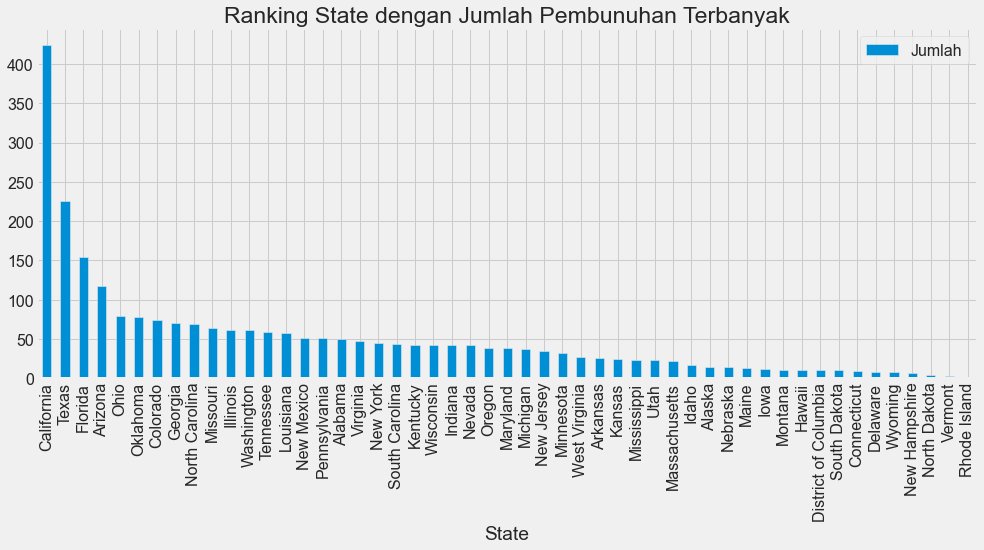

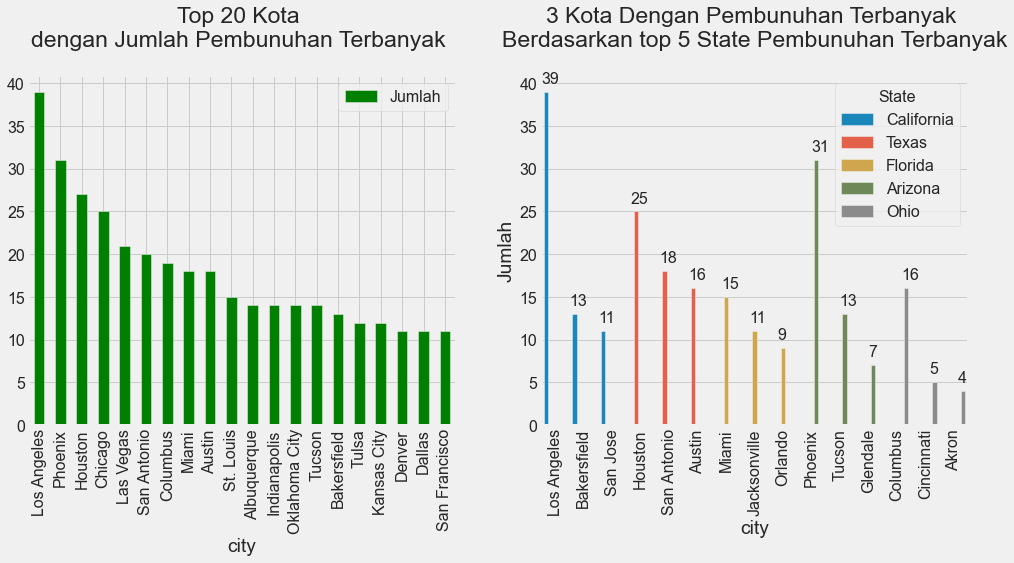

In [96]:
plt.figure(figsize = (15,6))

deathby_state.plot(kind = "bar", figsize = (15, 6), x = "State")
plt.title("Ranking State dengan Jumlah Pembunuhan Terbanyak")

# --------------

fig, ax = plt.subplots(nrows=1, ncols= 2, figsize = (15,6))

sns.barplot(data = top5_state_perCity, x = "city", y = "Jumlah", hue = "State", ax= ax[1])
ax[1].set_xticklabels(labels = top5_state_perCity.city, rotation = 90)
ax[1].set_title("3 Kota Dengan Pembunuhan Terbanyak \nBerdasarkan top 5 State Pembunuhan Terbanyak\n")

for p in ax[1].patches:
    ax[1].annotate("{:.0f}".format((p.get_height())),
               (p.get_x() - 0.1, p.get_height() + 1))

# ----------------

deathby_city[:20].plot(kind = "bar", color = "green", ax = ax[0])
ax[0].set_title("Top 20 Kota \ndengan Jumlah Pembunuhan Terbanyak \n")

### Coba untuk merangking tiap kategori pada tiap negara bagian. Lalu coba mencari top 5 negara bagian dengan jumlah kasus terbanyak, kemudian coba lihat ranking tiap kategori pada negara bagian tersebut, apakah ada pattern tertentu?

In [295]:
death_by_police_preproses

name  Tanggal    Bulan  Tahun   manner_of_death  \
0             Tim Elliot        2  Januari     15              shot   
1       Lewis Lee Lembke        2  Januari     15              shot   
2     John Paul Quintero        3  Januari     15  shot and Tasered   
3        Matthew Hoffman        4  Januari     15              shot   
4      Michael Rodriguez        4  Januari     15              shot   
...                  ...      ...      ...    ...               ...   
2530    Rodney E. Jacobs       28     Juli     17              shot   
2531               TK TK       28     Juli     17              shot   
2532  Dennis W. Robinson       29     Juli     17              shot   
2533       Isaiah Tucker       31     Juli     17              shot   
2534        Dwayne Jeune       31     Juli     17              shot   

           armed   age gender      race           city state  \
0            gun  53.0      M     Asian        Shelton    WA   
1            gun  47.0      M     White          Aloha    OR   
2        unarmed  23.0      M  Hispanic        Wichita    KS   
3     toy weapon  32.0      M     White  San Francisco    CA   
4       nail gun  39.0      M  Hispanic          Evans    CO   
...          ...   ...    ...       ...            ...   ...   
2530         gun  31.0      M       NaN    Kansas City    MO   
2531     vehicle   NaN      M       NaN    Albuquerque    NM   
2532         gun  48.0      M       NaN          Melba    ID   
2533     vehicle  28.0      M     Black        Oshkosh    WI   
2534       knife  32.0      M     Black       Brooklyn    NY   

      signs_of_mental_illness threat_level         flee  body_camera  \
0                        True       attack  Not fleeing        False   
1                       False       attack  Not fleeing        False   
2                       False        other  Not fleeing        False   
3                        True       attack  Not fleeing        False   
4                       False       attack  Not fleeing        False   
...                       ...          ...          ...          ...   
2530                    False       attack  Not fleeing        False   
2531                    False       attack          Car        False   
2532                    False       attack          Car        False   
2533                    False       attack          Car         True   
2534                     True       attack  Not fleeing        False   

     armed_update  
0             gun  
1             gun  
2         unarmed  
3           other  
4           other  
...           ...  
2530          gun  
2531      vehicle  
2532          gun  
2533      vehicle  
2534        knife  

[2535 rows x 16 columns]

In [97]:
top5_deathby_state = deathby_state.head(5)
top5_deathby_state

Abbreviation       State  Jumlah
0           CA  California     424
1           TX       Texas     225
2           FL     Florida     154
3           AZ     Arizona     118
4           OH        Ohio      79

In [98]:
# dibuat agar index mulai dari 1 yang merupakan ranking tertinggi sampai terendah

top_poverty_completed_hs_medIncome_update = top_poverty_completed_hs_medIncome.rank(ascending = False).astype("int")
top_poverty_completed_hs_medIncome_update

mean_poverty  median_poverty  mean_completed_hs  \
State                                                                   
Mississippi                      1               1                 50   
Arizona                          2               6                 45   
Georgia                          3               2                 49   
New Mexico                       4               7                 43   
Arkansas                         5               3                 47   
Louisiana                        6               5                 48   
South Carolina                   7               4                 44   
West Virginia                    8              10                 40   
Alabama                          9              10                 46   
Oklahoma                        10              12                 38   
Kentucky                        11               8                 39   
Missouri                        12              13                 36   
Tennessee                       13               9                 42   
Alaska                          14              21                 35   
Texas                           15              17                 51   
North Carolina                  16              15                 37   
Idaho                           17              18                 33   
District of Columbia            18              14                 17   
Michigan                        19              20                 18   
Florida                         20              21                 32   
California                      21              24                 41   
Maine                           22              16                  6   
Oregon                          23              19                 25   
Montana                         24              27                 10   
South Dakota                    25              37                 29   
Indiana                         26              23                 31   
Washington                      27              29                 26   
Ohio                            28              25                 24   
Kansas                          29              27                 27   
Virginia                        30              31                 34   
Illinois                        31              30                 21   
Minnesota                       32              33                 16   
Vermont                         33              26                 12   
Colorado                        34              32                 14   
Hawaii                          35              38                  4   
Nebraska                        36              33                 15   
Wisconsin                       37              35                 11   
New Hampshire                   38              41                  8   
Delaware                        39              36                 22   
Pennsylvania                    40              39                 19   
Iowa                            41              40                 13   
Nevada                          42              42                 30   
North Dakota                    43              45                 28   
Utah                            44              44                  3   
New York                        45              43                  9   
Rhode Island                    46              46                 20   
Maryland                        47              49                 23   
Wyoming                         48              50                  2   
Massachusetts                   49              47                  1   
Connecticut                     50              48                  5   
New Jersey                      51              51                  7   

                      median_completed_hs  mean_medIncome  median_medIncome  
State                                                                     

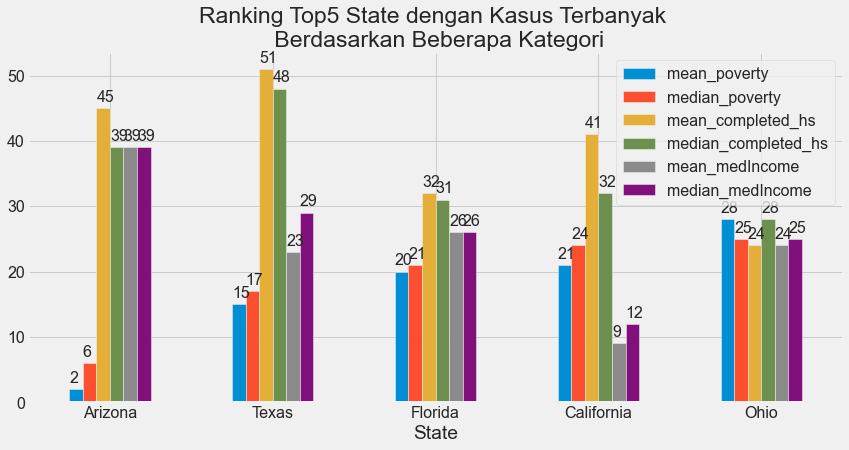

In [297]:
# top 5 state dengan pembunuhan terbanyal
mask1 = top_poverty_completed_hs_medIncome_update.index == "California"
mask2 = top_poverty_completed_hs_medIncome_update.index == "Texas"
mask3 = top_poverty_completed_hs_medIncome_update.index == "Florida"
mask4 = top_poverty_completed_hs_medIncome_update.index == "Arizona"
mask5 = top_poverty_completed_hs_medIncome_update.index == "Ohio"

ax = top_poverty_completed_hs_medIncome_update.loc[mask1 | mask2 | mask3 | mask4 | mask5].plot(kind = "bar",
                                                                                         figsize = (13, 6),
                                                                                         title = "Ranking Top5 State dengan Kasus Terbanyak \n Berdasarkan Beberapa Kategori",
                                                                                             rot = 0)

for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
                (p.get_x(), p.get_height() + 1))

### Lalu jika berhasil, bagaimana pada ranking tiap kategori pada top 10 negara bagian dengan kasus terbanyak? apakah ada pattern tertentu?

In [100]:
top10_state = deathby_state.head(10)

top10_state_info = pd.DataFrame()
for State in top10_state.State:
    state = top_poverty_completed_hs_medIncome_update.loc[top_poverty_completed_hs_medIncome_update.index == State]
    top10_state_info = pd.concat([top10_state_info, state], axis = "index")
    
top10_state_info

mean_poverty  median_poverty  mean_completed_hs  \
State                                                             
California                21              24                 41   
Texas                     15              17                 51   
Florida                   20              21                 32   
Arizona                    2               6                 45   
Ohio                      28              25                 24   
Oklahoma                  10              12                 38   
Colorado                  34              32                 14   
Georgia                    3               2                 49   
North Carolina            16              15                 37   
Missouri                  12              13                 36   

                median_completed_hs  mean_medIncome  median_medIncome  
State                                                                  
California                       32               9                12  
Texas                            48              23                29  
Florida                          31              26                26  
Arizona                          39              39                39  
Ohio                             28              24                25  
Oklahoma                         41              45                41  
Colorado                          7              15                15  
Georgia                          50              48                48  
North Carolina                   42              38                38  
Missouri                         37              42                46

In [320]:
top10_state_info.iloc[:, [0,2,4]]

mean_poverty  mean_completed_hs  mean_medIncome
State                                                          
California                21                 41               9
Texas                     15                 51              23
Florida                   20                 32              26
Arizona                    2                 45              39
Ohio                      28                 24              24
Oklahoma                  10                 38              45
Colorado                  34                 14              15
Georgia                    3                 49              48
North Carolina            16                 37              38
Missouri                  12                 36              42

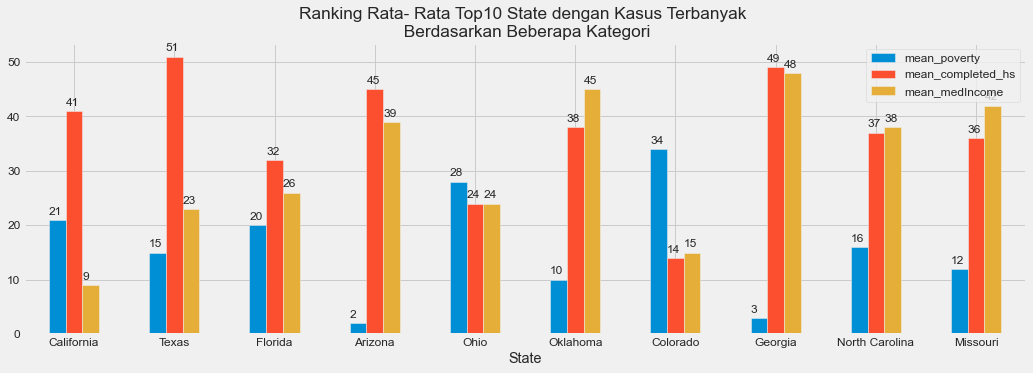

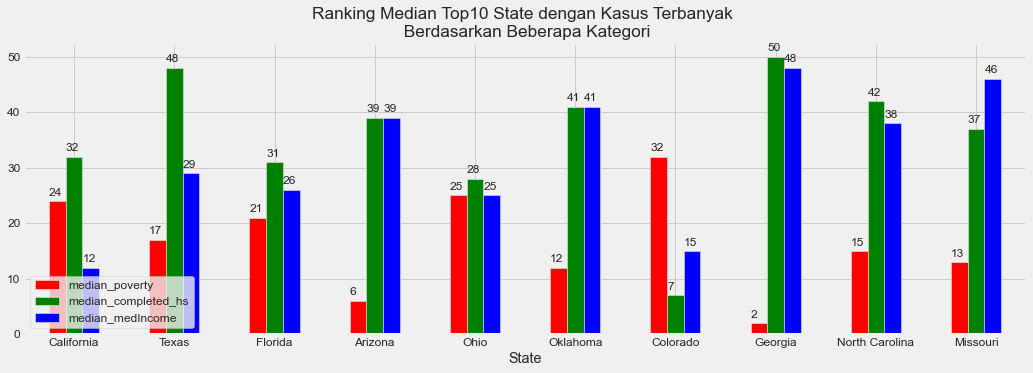

In [329]:
ax = top10_state_info.iloc[:, [0,2,4]].plot(kind = "bar",
                           figsize = (16, 5),
                           title = "Ranking Rata- Rata Top10 State dengan Kasus Terbanyak \n Berdasarkan Beberapa Kategori",
                           rot = 0)
plt.rcParams.update({"font.size" : 12})

for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
                (p.get_x(), p.get_height() + 1))
    
    
# -------------------------------------

ax = top10_state_info.iloc[:, [1,3,5]].plot(kind = "bar",
                           figsize = (16, 5),
                           title = "Ranking Median Top10 State dengan Kasus Terbanyak \n Berdasarkan Beberapa Kategori",
                           rot = 0, color = ["red", "green", "blue"])
plt.legend(loc = "lower left")

for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
                (p.get_x(), p.get_height() + 1))

### Bagaimana dengan tanggal? coba mencari tanggal, serta bulan dengan kasus terbanyak, lalu mencoba mencari top 3 bulan dengan jumlah kasus terbanyak pada tiap tahun apakah ada kesamaan satu sama lain?

In [101]:
death_by_police_preproses

name  Tanggal  Bulan  Tahun   manner_of_death       armed  \
0             Tim Elliot        2      1     15              shot         gun   
1       Lewis Lee Lembke        2      1     15              shot         gun   
2     John Paul Quintero        3      1     15  shot and Tasered     unarmed   
3        Matthew Hoffman        4      1     15              shot  toy weapon   
4      Michael Rodriguez        4      1     15              shot    nail gun   
...                  ...      ...    ...    ...               ...         ...   
2530    Rodney E. Jacobs       28      7     17              shot         gun   
2531               TK TK       28      7     17              shot     vehicle   
2532  Dennis W. Robinson       29      7     17              shot         gun   
2533       Isaiah Tucker       31      7     17              shot     vehicle   
2534        Dwayne Jeune       31      7     17              shot       knife   

       age gender      race           city state  signs_of_mental_illness  \
0     53.0      M     Asian        Shelton    WA                     True   
1     47.0      M     White          Aloha    OR                    False   
2     23.0      M  Hispanic        Wichita    KS                    False   
3     32.0      M     White  San Francisco    CA                     True   
4     39.0      M  Hispanic          Evans    CO                    False   
...    ...    ...       ...            ...   ...                      ...   
2530  31.0      M       NaN    Kansas City    MO                    False   
2531   NaN      M       NaN    Albuquerque    NM                    False   
2532  48.0      M       NaN          Melba    ID                    False   
2533  28.0      M     Black        Oshkosh    WI                    False   
2534  32.0      M     Black       Brooklyn    NY                     True   

     threat_level         flee  body_camera armed_update  
0          attack  Not fleeing        False          gun  
1          attack  Not fleeing        False          gun  
2           other  Not fleeing        False      unarmed  
3          attack  Not fleeing        False        other  
4          attack  Not fleeing        False        other  
...           ...          ...          ...          ...  
2530       attack  Not fleeing        False          gun  
2531       attack          Car        False      vehicle  
2532       attack          Car        False          gun  
2533       attack          Car         True      vehicle  
2534       attack  Not fleeing        False        knife  

[2535 rows x 16 columns]

In [102]:
bulanNama = ["Januari", "Februari", "Maret", "April",
             "Mei", "Juni", "Juli", "Agustus",
            "September", "Oktober", "November", "Desember"]
bulan = [i for i in range (1, 13)]
death_by_police_preproses.Bulan = death_by_police_preproses.Bulan.replace(to_replace= bulan, value = bulanNama)
death_by_police_preproses

name  Tanggal    Bulan  Tahun   manner_of_death  \
0             Tim Elliot        2  Januari     15              shot   
1       Lewis Lee Lembke        2  Januari     15              shot   
2     John Paul Quintero        3  Januari     15  shot and Tasered   
3        Matthew Hoffman        4  Januari     15              shot   
4      Michael Rodriguez        4  Januari     15              shot   
...                  ...      ...      ...    ...               ...   
2530    Rodney E. Jacobs       28     Juli     17              shot   
2531               TK TK       28     Juli     17              shot   
2532  Dennis W. Robinson       29     Juli     17              shot   
2533       Isaiah Tucker       31     Juli     17              shot   
2534        Dwayne Jeune       31     Juli     17              shot   

           armed   age gender      race           city state  \
0            gun  53.0      M     Asian        Shelton    WA   
1            gun  47.0      M     White          Aloha    OR   
2        unarmed  23.0      M  Hispanic        Wichita    KS   
3     toy weapon  32.0      M     White  San Francisco    CA   
4       nail gun  39.0      M  Hispanic          Evans    CO   
...          ...   ...    ...       ...            ...   ...   
2530         gun  31.0      M       NaN    Kansas City    MO   
2531     vehicle   NaN      M       NaN    Albuquerque    NM   
2532         gun  48.0      M       NaN          Melba    ID   
2533     vehicle  28.0      M     Black        Oshkosh    WI   
2534       knife  32.0      M     Black       Brooklyn    NY   

      signs_of_mental_illness threat_level         flee  body_camera  \
0                        True       attack  Not fleeing        False   
1                       False       attack  Not fleeing        False   
2                       False        other  Not fleeing        False   
3                        True       attack  Not fleeing        False   
4                       False       attack  Not fleeing        False   
...                       ...          ...          ...          ...   
2530                    False       attack  Not fleeing        False   
2531                    False       attack          Car        False   
2532                    False       attack          Car        False   
2533                    False       attack          Car         True   
2534                     True       attack  Not fleeing        False   

     armed_update  
0             gun  
1             gun  
2         unarmed  
3           other  
4           other  
...           ...  
2530          gun  
2531      vehicle  
2532          gun  
2533      vehicle  
2534        knife  

[2535 rows x 16 columns]

In [103]:
topBulan = death_by_police_preproses.groupby("Bulan").Tanggal.count().sort_values(ascending = False).to_frame().reset_index()
topBulan.columns = ["Bulan", "Jumlah"]
topBulan

Bulan  Jumlah
0        Juli     264
1    Februari     263
2       Maret     260
3     Januari     249
4        Juni     241
5       April     224
6         Mei     219
7     Agustus     176
8    Desember     167
9   September     160
10    Oktober     158
11   November     154

In [104]:
topTanggal = death_by_police_preproses.groupby("Tanggal").Bulan.count().sort_values(ascending = False).to_frame()#.reset_index()
topTanggal.columns = ["Jumlah"]
topTanggal

Jumlah
Tanggal        
27           95
23           95
21           92
5            91
9            91
7            90
17           89
4            89
26           89
11           89
15           88
24           87
16           86
10           86
13           83
19           81
20           80
25           80
12           79
6            79
3            79
28           79
14           78
18           78
22           78
8            78
29           78
2            75
30           70
1            64
31           39

In [105]:
tahun_bulan = death_by_police_preproses.groupby(["Tahun", "Bulan"]).Tanggal.count().to_frame().reset_index().set_index("Tahun")
tahun_bulan.columns = ["Bulan", "Jumlah"]

top4_tahun_bulan = pd.DataFrame()
tahun_bulan
for kolom in tahun_bulan.index.unique():
    top4 = tahun_bulan.loc[kolom, :].sort_values("Jumlah", ascending = False).head(4)
    top4_tahun_bulan = pd.concat([top4_tahun_bulan, top4], axis = "index")
    
top4_tahun_bulan.reset_index(inplace = True)
top4_tahun_bulan.Bulan = top4_tahun_bulan.Bulan + " " + top4_tahun_bulan.Tahun.astype("str")
top4_tahun_bulan

Tahun        Bulan  Jumlah
0      15      Juli 15     104
1      15   Agustus 15      94
2      15     Maret 15      92
3      15  Desember 15      89
4      16      Juni 16      92
5      16     Maret 16      92
6      16  Februari 16      86
7      16   Agustus 16      82
8      17  Februari 17     100
9      17   Januari 17      92
10     17      Juli 17      88
11     17      Juni 17      84

Text(0.5, 1.0, 'Tanggal Terbanyak Terjadi Kasus')

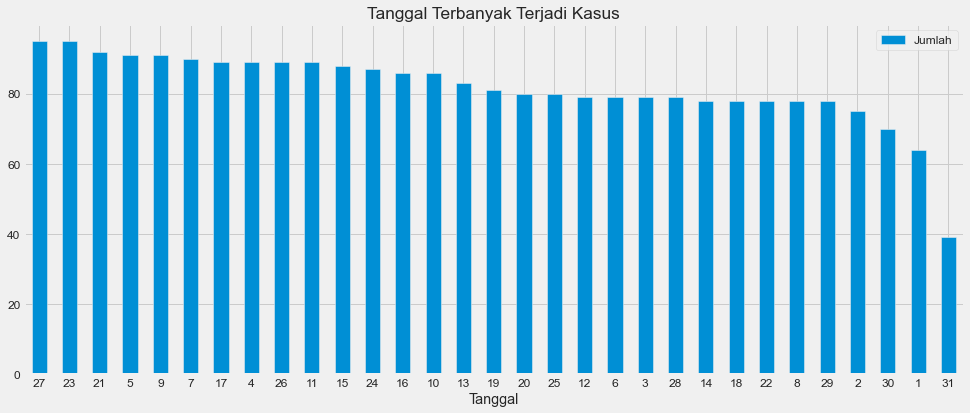

In [332]:
topTanggal.plot(kind = "bar", figsize = (15, 6), rot = 0)
plt.title("Tanggal Terbanyak Terjadi Kasus")

[]

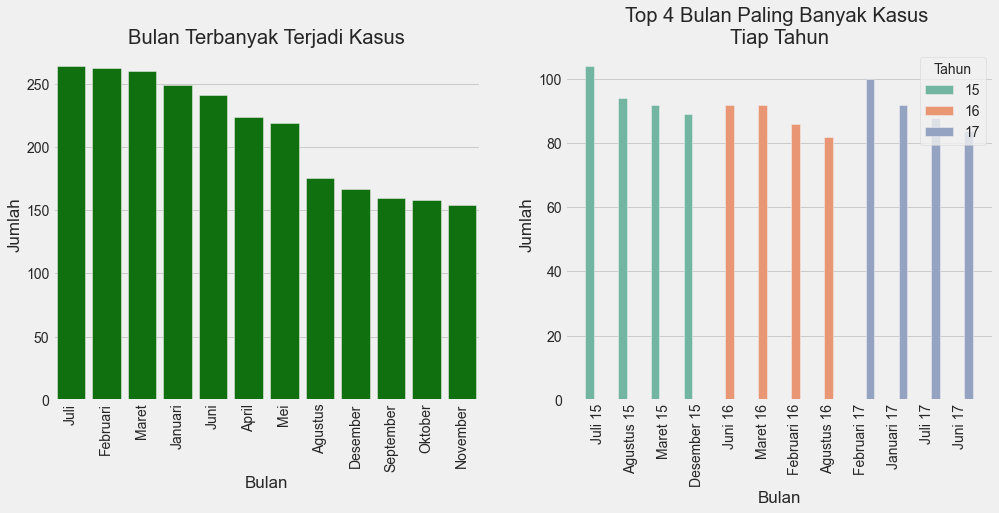

In [335]:
fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize = (15, 6))

sns.barplot(data = topBulan, x = "Bulan", y = "Jumlah", ax = ax[0], color= "green")
ax[0].set_xticklabels(labels = topBulan.Bulan, rotation = 90)
ax[0].set_title("Bulan Terbanyak Terjadi Kasus")

sns.barplot(data = top4_tahun_bulan, x = "Bulan", y = "Jumlah", hue = "Tahun", ax = ax[1], palette= "Set2")
ax[1].set_xticklabels(labels = top4_tahun_bulan.Bulan, rotation = 90)
ax[1].set_title("Top 4 Bulan Paling Banyak Kasus \nTiap Tahun")
plt.rcParams.update({"font.size" : 16})
plt.plot()

In [336]:
plt.rcParams.update({"font.size" : 12})

### Karena tiap polisi dibekali dengan kamera pada badan mereka dan kadang aktif dan tidak, apakah ada korelasi tertentu dari jenis ras korban dengan kondisi aktif tidaknya kamera pada polisi pada saat kejadian?

In [107]:
body_camera_race = death_by_police_preproses.groupby(["body_camera", "race"]).flee.count().to_frame().reset_index().set_index("race")
body_camera_race.columns = ["body_camera",  "Jumlah"]
body_camera_race

body_camera  Jumlah
race                                
Asian                  False      32
Black                  False     529
Hispanic               False     364
Native_american        False      23
Other                  False      26
White                  False    1062
Asian                   True       5
Black                   True      76
Hispanic                True      47
Native_american         True       6
Other                   True       2
White                   True     116

In [108]:
death_by_police_race_total = death_by_police_preproses.race.value_counts().to_frame()#.reindex(body_camera_race.race[:6].to_list())#.reset_index()
#death_by_police_race_total.columns = ["race", "Jumlah"]
death_by_police_race_total

race
White            1201
Black             618
Hispanic          423
Asian              39
Native_american    31
Other              28

In [109]:
body_camera_race_update = pd.DataFrame()
for camera in body_camera_race.body_camera.unique():
    data = body_camera_race.loc[body_camera_race.body_camera == camera]
    data["Presentase_race_per_body_camera"] = (data["Jumlah"] / death_by_police_race_total.race * 100).round(2)
    body_camera_race_update = pd.concat([body_camera_race_update, data], axis = "index")
    
body_camera_race_update = body_camera_race_update.reset_index()
body_camera_race_update

race  body_camera  Jumlah  Presentase_race_per_body_camera
0             Asian        False      32                            82.05
1             Black        False     529                            85.60
2          Hispanic        False     364                            86.05
3   Native_american        False      23                            74.19
4             Other        False      26                            92.86
5             White        False    1062                            88.43
6             Asian         True       5                            12.82
7             Black         True      76                            12.30
8          Hispanic         True      47                            11.11
9   Native_american         True       6                            19.35
10            Other         True       2                             7.14
11            White         True     116                             9.66

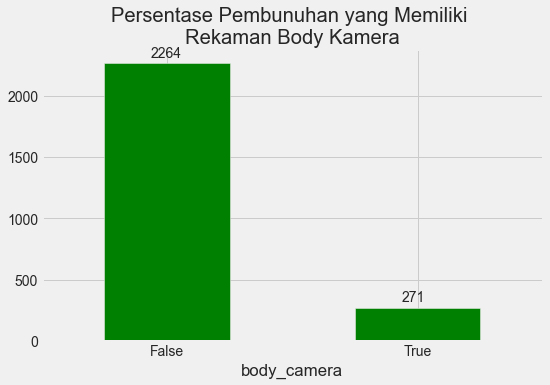

In [362]:
ax = death_by_police_preproses.groupby("body_camera").body_camera.count().plot(kind = "bar",
                                                                          color = "green",
                                                                          rot = 0,
                                                                          figsize = (8, 5))
ax.set_title("Persentase Pembunuhan yang Memiliki \nRekaman Body Kamera")
for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
                (p.get_x() + 0.185, p.get_height() + 50))
    

In [367]:
camera_on = death_by_police_preproses.loc[death_by_police_preproses.body_camera == True]
camera_on.head()

name  Tanggal    Bulan  Tahun manner_of_death  \
8                      Autumn Steele        6  Januari     15            shot   
14  Omarr Julian Maximillian Jackson        7  Januari     15            shot   
16               James Dudley Barker        8  Januari     15            shot   
18                      Thomas Hamby        8  Januari     15            shot   
24               John Edward O'Keefe       13  Januari     15            shot   

      armed   age gender   race            city state  \
8   unarmed  34.0      F  White      Burlington    IA   
14      gun  37.0      M  Black     New Orleans    LA   
16   shovel  42.0      M  White  Salt Lake City    UT   
18      gun  49.0      M  White        Syracuse    UT   
24      gun  34.0      M  White     Albuquerque    NM   

    signs_of_mental_illness threat_level         flee  body_camera  \
8                     False        other  Not fleeing         True   
14                    False       attack         Foot         True   
16                    False       attack  Not fleeing         True   
18                    False       attack  Not fleeing         True   
24                    False       attack         Foot         True   

   armed_update  
8       unarmed  
14          gun  
16        other  
18          gun  
24          gun

In [431]:
state_camera_on = camera_on.groupby("state").Bulan.count().to_frame().sort_values("Bulan", ascending = False).head(10)
state_camera_on

Bulan
state       
CA        56
TX        20
AZ        15
AL        11
NC        10
NM        10
OK         9
VA         9
TN         8
MD         8

In [432]:
# buat tiap state ada rankingnya

deathby_state["Rank"] = deathby_state.Jumlah.rank(ascending = False).astype("int")
deathby_state.head()

Abbreviation       State  Jumlah  Rank
0           CA  California     424     1
1           TX       Texas     225     2
2           FL     Florida     154     3
3           AZ     Arizona     118     4
4           OH        Ohio      79     5

In [433]:
state_camera_on = pd.merge(state_camera_on, 
                           deathby_state, 
                           left_index= True, 
                           right_on= "Abbreviation").set_index("State").drop("Abbreviation", 
                                                                             axis = "columns")
state_camera_on

Bulan  Jumlah  Rank
State                              
California         56     424     1
Texas              20     225     2
Arizona            15     118     4
Alabama            11      50    17
North Carolina     10      69     9
New Mexico         10      51    15
Oklahoma            9      78     6
Virginia            9      47    18
Tennessee           8      59    13
Maryland            8      38    25

In [434]:
state_camera_on.columns = ["Jumlah_kamera_menyala", "Jumlah Kasus", "Ranking_kasus_terbanyak"]
state_camera_on

Jumlah_kamera_menyala  Jumlah Kasus  Ranking_kasus_terbanyak
State                                                                       
California                         56           424                        1
Texas                              20           225                        2
Arizona                            15           118                        4
Alabama                            11            50                       17
North Carolina                     10            69                        9
New Mexico                         10            51                       15
Oklahoma                            9            78                        6
Virginia                            9            47                       18
Tennessee                           8            59                       13
Maryland                            8            38                       25

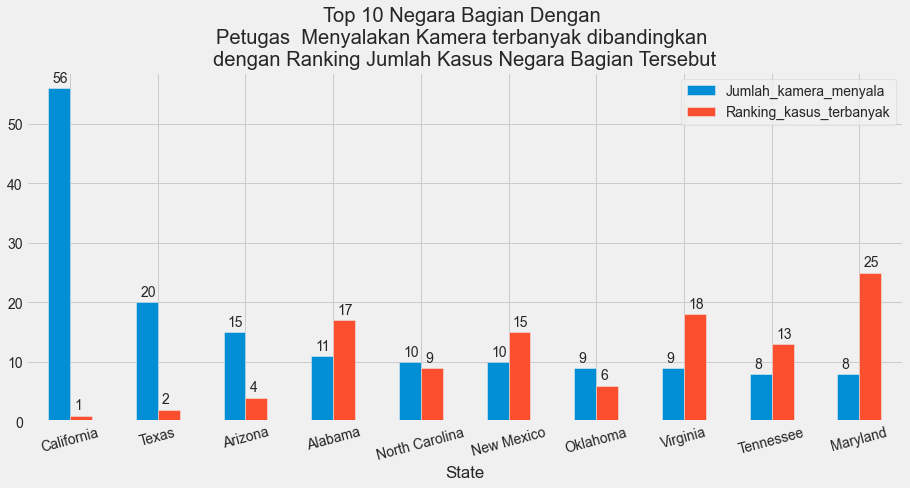

In [440]:
ax = state_camera_on.iloc[:, [0,2] ].plot(kind = "bar", figsize = (14, 6), rot = 15,
                                          title = "Top 10 Negara Bagian Dengan \nPetugas  Menyalakan Kamera terbanyak dibandingkan \ndengan Ranking Jumlah Kasus Negara Bagian Tersebut")

for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
               (p.get_x() + 0.05, p.get_height() + 1))

In [438]:
deathby_state

Abbreviation                 State  Jumlah  Rank
0            CA            California     424     1
1            TX                 Texas     225     2
2            FL               Florida     154     3
3            AZ               Arizona     118     4
4            OH                  Ohio      79     5
5            OK              Oklahoma      78     6
6            CO              Colorado      74     7
7            GA               Georgia      70     8
8            NC        North Carolina      69     9
9            MO              Missouri      64    10
10           IL              Illinois      62    11
11           WA            Washington      62    11
12           TN             Tennessee      59    13
13           LA             Louisiana      57    14
14           NM            New Mexico      51    15
15           PA          Pennsylvania      51    15
16           AL               Alabama      50    17
17           VA              Virginia      47    18
18           NY              New York      45    19
19           SC        South Carolina      44    20
20           KY              Kentucky      43    22
21           WI             Wisconsin      43    22
22           IN               Indiana      43    22
23           NV                Nevada      42    24
24           OR                Oregon      38    25
25           MD              Maryland      38    25
26           MI              Michigan      37    27
27           NJ            New Jersey      35    28
28           MN             Minnesota      32    29
29           WV         West Virginia      27    30
30           AR              Arkansas      26    31
31           KS                Kansas      24    32
32           MS           Mississippi      23    33
33           UT                  Utah      23    33
34           MA         Massachusetts      22    35
35           ID                 Idaho      17    36
36           AK                Alaska      15    37
37           NE              Nebraska      15    37
38           ME                 Maine      13    39
39           IA                  Iowa      12    40
40           MT               Montana      11    42
41           HI                Hawaii      11    42
42           DC  District of Columbia      11    42
43           SD          South Dakota      10    44
44           CT           Connecticut       9    45
45           DE              Delaware       8    46
46           WY               Wyoming       8    46
47           NH         New Hampshire       7    48
48           ND          North Dakota       4    49
49           VT               Vermont       3    50
50           RI          Rhode Island       2    51

In [446]:
camera_on.groupby("state").Bulan.count().to_frame().sort_values("Bulan", ascending = False).reset_index()

state  Bulan
0     CA     56
1     TX     20
2     AZ     15
3     AL     11
4     NC     10
5     NM     10
6     OK      9
7     VA      9
8     TN      8
9     MD      8
10    LA      8
11    UT      8
12    NV      8
13    CO      8
14    IN      6
15    GA      6
16    OH      6
17    WI      6
18    ID      5
19    FL      5
20    MI      5
21    WA      5
22    SC      4
23    IL      4
24    KY      3
25    MN      3
26    VT      3
27    IA      3
28    DC      3
29    MO      2
30    WV      2
31    KS      2
32    DE      2
33    OR      1
34    SD      1
35    NJ      1
36    NH      1
37    NE      1
38    MT      1
39    AR      1
40    AK      1

In [450]:
body_camera_race_update

race  body_camera  Jumlah  Presentase_race_per_body_camera
0             Asian        False      32                            82.05
1             Black        False     529                            85.60
2          Hispanic        False     364                            86.05
3   Native_american        False      23                            74.19
4             Other        False      26                            92.86
5             White        False    1062                            88.43
6             Asian         True       5                            12.82
7             Black         True      76                            12.30
8          Hispanic         True      47                            11.11
9   Native_american         True       6                            19.35
10            Other         True       2                             7.14
11            White         True     116                             9.66

In [452]:
body_camera_race_update.sort_values("race").reset_index(drop = True)

race  body_camera  Jumlah  Presentase_race_per_body_camera
0             Asian        False      32                            82.05
1             Asian         True       5                            12.82
2             Black        False     529                            85.60
3             Black         True      76                            12.30
4          Hispanic        False     364                            86.05
5          Hispanic         True      47                            11.11
6   Native_american        False      23                            74.19
7   Native_american         True       6                            19.35
8             Other        False      26                            92.86
9             Other         True       2                             7.14
10            White        False    1062                            88.43
11            White         True     116                             9.66

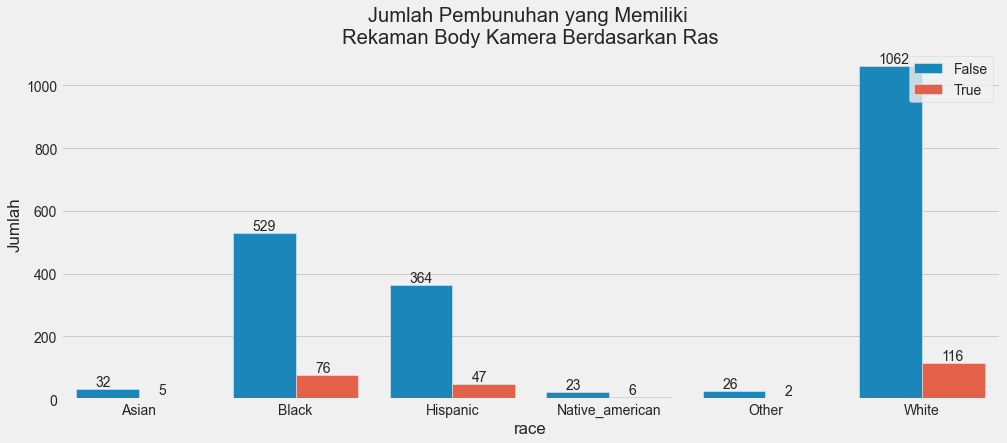

In [460]:
plt.figure(figsize = (15, 6))

ax = sns.barplot(data = body_camera_race_update, x = "race", y = "Jumlah", hue = "body_camera")
ax.set_title("Jumlah Pembunuhan yang Memiliki \nRekaman Body Kamera Berdasarkan Ras")

for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
                (p.get_x() + 0.125, p.get_height() + 10))
    
ax.legend(loc = "upper right")

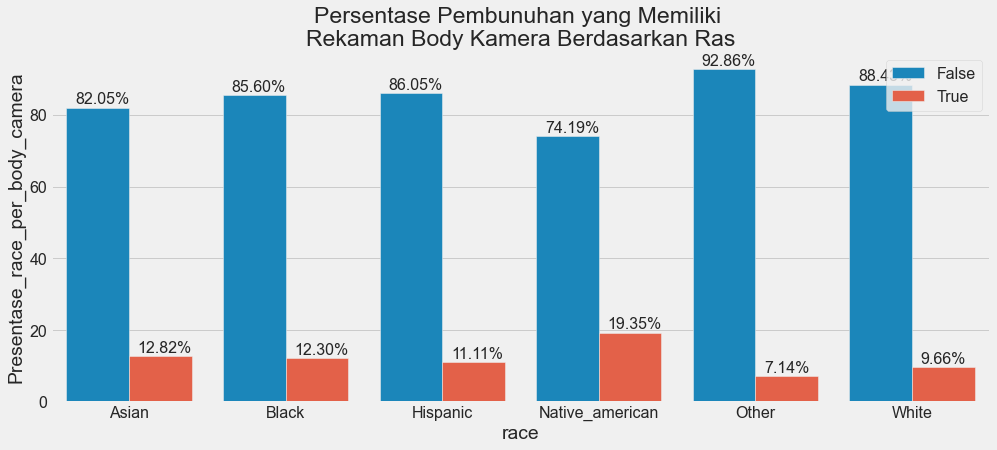

In [110]:
plt.figure(figsize = (15, 6))

ax = sns.barplot(data = body_camera_race_update, x = "race", y = "Presentase_race_per_body_camera", hue = "body_camera")
ax.set_title("Persentase Pembunuhan yang Memiliki \nRekaman Body Kamera Berdasarkan Ras")

for p in ax.patches:
    ax.annotate("{:.2f}%".format((p.get_height())),
                (p.get_x() + 0.055, p.get_height() + 1))
    
ax.legend(loc = "upper right")

In [449]:
death_by_police_preproses.loc[death_by_police_preproses.race == "Native_american"].groupby("body_camera").body_camera.count()

body_camera
False    25
True      6
Name: body_camera, dtype: int64

### Senjata apa yang paling sering digunakan pada tiap ras? Bagaimana presentasenya? Lalu bagaimana presentase persebaran penggunaan senjata pada tiap ras?

In [111]:
death_by_police_preproses

name  Tanggal    Bulan  Tahun   manner_of_death  \
0             Tim Elliot        2  Januari     15              shot   
1       Lewis Lee Lembke        2  Januari     15              shot   
2     John Paul Quintero        3  Januari     15  shot and Tasered   
3        Matthew Hoffman        4  Januari     15              shot   
4      Michael Rodriguez        4  Januari     15              shot   
...                  ...      ...      ...    ...               ...   
2530    Rodney E. Jacobs       28     Juli     17              shot   
2531               TK TK       28     Juli     17              shot   
2532  Dennis W. Robinson       29     Juli     17              shot   
2533       Isaiah Tucker       31     Juli     17              shot   
2534        Dwayne Jeune       31     Juli     17              shot   

           armed   age gender      race           city state  \
0            gun  53.0      M     Asian        Shelton    WA   
1            gun  47.0      M     White          Aloha    OR   
2        unarmed  23.0      M  Hispanic        Wichita    KS   
3     toy weapon  32.0      M     White  San Francisco    CA   
4       nail gun  39.0      M  Hispanic          Evans    CO   
...          ...   ...    ...       ...            ...   ...   
2530         gun  31.0      M       NaN    Kansas City    MO   
2531     vehicle   NaN      M       NaN    Albuquerque    NM   
2532         gun  48.0      M       NaN          Melba    ID   
2533     vehicle  28.0      M     Black        Oshkosh    WI   
2534       knife  32.0      M     Black       Brooklyn    NY   

      signs_of_mental_illness threat_level         flee  body_camera  \
0                        True       attack  Not fleeing        False   
1                       False       attack  Not fleeing        False   
2                       False        other  Not fleeing        False   
3                        True       attack  Not fleeing        False   
4                       False       attack  Not fleeing        False   
...                       ...          ...          ...          ...   
2530                    False       attack  Not fleeing        False   
2531                    False       attack          Car        False   
2532                    False       attack          Car        False   
2533                    False       attack          Car         True   
2534                     True       attack  Not fleeing        False   

     armed_update  
0             gun  
1             gun  
2         unarmed  
3           other  
4           other  
...           ...  
2530          gun  
2531      vehicle  
2532          gun  
2533      vehicle  
2534        knife  

[2535 rows x 16 columns]

In [112]:
armed_race = death_by_police_preproses.groupby(["armed_update", 
                                                "race"]).flee.count().to_frame().reset_index().set_index("race")
armed_race.columns = ["armed_update", "Jumlah"]
armed_race

armed_update  Jumlah
race                                
Asian                    gun      11
Black                    gun     342
Hispanic                 gun     201
Native_american          gun      17
Other                    gun      11
White                    gun     680
Asian                  knife      14
Black                  knife      69
Hispanic               knife      67
Native_american        knife       5
Other                  knife       9
White                  knife     167
Asian                  other       9
Black                  other      84
Hispanic               other      79
Native_american        other       3
Other                  other       1
White                  other     187
Black                unarmed      62
Hispanic             unarmed      33
Native_american      unarmed       2
Other                unarmed       4
White                unarmed      65
Asian                vehicle       3
Black                vehicle      44
Hispanic             vehicle      30
Native_american      vehicle       2
Other                vehicle       3
White                vehicle      78

In [113]:
death_by_police_race_total

race
White            1201
Black             618
Hispanic          423
Asian              39
Native_american    31
Other              28

In [114]:
armed_update = death_by_police_preproses.groupby("armed_update").flee.count().to_frame()
armed_update.columns = ["Jumlah"]
armed_update

Jumlah
armed_update        
gun             1370
knife            364
other            391
unarmed          167
vehicle          171

In [115]:
armed_race_info = pd.DataFrame()

for armed in armed_race.armed_update.unique():
    data = armed_race.loc[armed_race.armed_update == armed] 
    data["persentase_ras_dalam_pemilihan_senjata"] = (data.Jumlah / death_by_police_race_total.race * 100).round(2)
    armed_race_info = pd.concat([armed_race_info, data], axis = "index")
armed_race_info.reset_index(inplace = True)
armed_race_info

race armed_update  Jumlah  \
0             Asian          gun      11   
1             Black          gun     342   
2          Hispanic          gun     201   
3   Native_american          gun      17   
4             Other          gun      11   
5             White          gun     680   
6             Asian        knife      14   
7             Black        knife      69   
8          Hispanic        knife      67   
9   Native_american        knife       5   
10            Other        knife       9   
11            White        knife     167   
12            Asian        other       9   
13            Black        other      84   
14         Hispanic        other      79   
15  Native_american        other       3   
16            Other        other       1   
17            White        other     187   
18            Black      unarmed      62   
19         Hispanic      unarmed      33   
20  Native_american      unarmed       2   
21            Other      unarmed       4   
22            White      unarmed      65   
23            Asian      vehicle       3   
24            Black      vehicle      44   
25         Hispanic      vehicle      30   
26  Native_american      vehicle       2   
27            Other      vehicle       3   
28            White      vehicle      78   

    persentase_ras_dalam_pemilihan_senjata  
0                                    28.21  
1                                    55.34  
2                                    47.52  
3                                    54.84  
4                                    39.29  
5                                    56.62  
6                                    35.90  
7                                    11.17  
8                                    15.84  
9                                    16.13  
10                                   32.14  
11                                   13.91  
12                                   23.08  
13                                   13.59  
14                                   18.68  
15                                    9.68  
16                                    3.57  
17                                   15.57  
18                                   10.03  
19                                    7.80  
20                                    6.45  
21                                   14.29  
22                                    5.41  
23                                    7.69  
24                                    7.12  
25                                    7.09  
26                                    6.45  
27                                   10.71  
28                                    6.49

In [116]:
armed_race_info2 = pd.DataFrame()
armed_race_update = armed_race.reset_index().set_index("race")
for armed in armed_race_update.index.unique():
    data = armed_race_update.loc[armed_race_update.index == armed].reset_index().set_index("armed_update")
    data["persentase_penggunaan_senjata_berdasar_ras"] = (data.Jumlah / armed_update.Jumlah * 100).round(2)
    armed_race_info2 = pd.concat([armed_race_info2, data], axis = "index")

armed_race_info2.reset_index(inplace = True)
armed_race_info2

armed_update             race  Jumlah  \
0           gun            Asian      11   
1         knife            Asian      14   
2         other            Asian       9   
3       vehicle            Asian       3   
4           gun            Black     342   
5         knife            Black      69   
6         other            Black      84   
7       unarmed            Black      62   
8       vehicle            Black      44   
9           gun         Hispanic     201   
10        knife         Hispanic      67   
11        other         Hispanic      79   
12      unarmed         Hispanic      33   
13      vehicle         Hispanic      30   
14          gun  Native_american      17   
15        knife  Native_american       5   
16        other  Native_american       3   
17      unarmed  Native_american       2   
18      vehicle  Native_american       2   
19          gun            Other      11   
20        knife            Other       9   
21        other            Other       1   
22      unarmed            Other       4   
23      vehicle            Other       3   
24          gun            White     680   
25        knife            White     167   
26        other            White     187   
27      unarmed            White      65   
28      vehicle            White      78   

    persentase_penggunaan_senjata_berdasar_ras  
0                                         0.80  
1                                         3.85  
2                                         2.30  
3                                         1.75  
4                                        24.96  
5                                        18.96  
6                                        21.48  
7                                        37.13  
8                                        25.73  
9                                        14.67  
10                                       18.41  
11                                       20.20  
12                                       19.76  
13                                       17.54  
14                                        1.24  
15                                        1.37  
16                                        0.77  
17                                        1.20  
18                                        1.17  
19                                        0.80  
20                                        2.47  
21                                        0.26  
22                                        2.40  
23                                        1.75  
24                                       49.64  
25                                       45.88  
26                                       47.83  
27                                       38.92  
28                                       45.61

In [117]:
race_armed = pd.merge(armed_race_info, armed_race_info2, left_on= ["armed_update", "race", "Jumlah"],
                      right_on= ["armed_update", "race", "Jumlah"])
race_armed

race armed_update  Jumlah  \
0             Asian          gun      11   
1             Black          gun     342   
2          Hispanic          gun     201   
3   Native_american          gun      17   
4             Other          gun      11   
5             White          gun     680   
6             Asian        knife      14   
7             Black        knife      69   
8          Hispanic        knife      67   
9   Native_american        knife       5   
10            Other        knife       9   
11            White        knife     167   
12            Asian        other       9   
13            Black        other      84   
14         Hispanic        other      79   
15  Native_american        other       3   
16            Other        other       1   
17            White        other     187   
18            Black      unarmed      62   
19         Hispanic      unarmed      33   
20  Native_american      unarmed       2   
21            Other      unarmed       4   
22            White      unarmed      65   
23            Asian      vehicle       3   
24            Black      vehicle      44   
25         Hispanic      vehicle      30   
26  Native_american      vehicle       2   
27            Other      vehicle       3   
28            White      vehicle      78   

    persentase_ras_dalam_pemilihan_senjata  \
0                                    28.21   
1                                    55.34   
2                                    47.52   
3                                    54.84   
4                                    39.29   
5                                    56.62   
6                                    35.90   
7                                    11.17   
8                                    15.84   
9                                    16.13   
10                                   32.14   
11                                   13.91   
12                                   23.08   
13                                   13.59   
14                                   18.68   
15                                    9.68   
16                                    3.57   
17                                   15.57   
18                                   10.03   
19                                    7.80   
20                                    6.45   
21                                   14.29   
22                                    5.41   
23                                    7.69   
24                                    7.12   
25                                    7.09   
26                                    6.45   
27                                   10.71   
28                                    6.49   

    persentase_penggunaan_senjata_berdasar_ras  
0                                         0.80  
1                                        24.96  
2                                        14.67  
3                                         1.24  
4                                         0.80  
5                                        49.64  
6                                         3.85  
7                                        18.96  
8                                        18.41  
9                                         1.37  
10                                        2.47  
11                                       45.88  
12                                        2.30  
13                                       21.48  
14                                       20.20  
15                                        0.77  
16                                        0.26  
17                                       47.83  
18                                       37.13  
19                                       19.76  
20                                        1.20  
21                                        2.40  
22                                       38.92  
23                                        1.75  
24                                       25.73  
25                                     

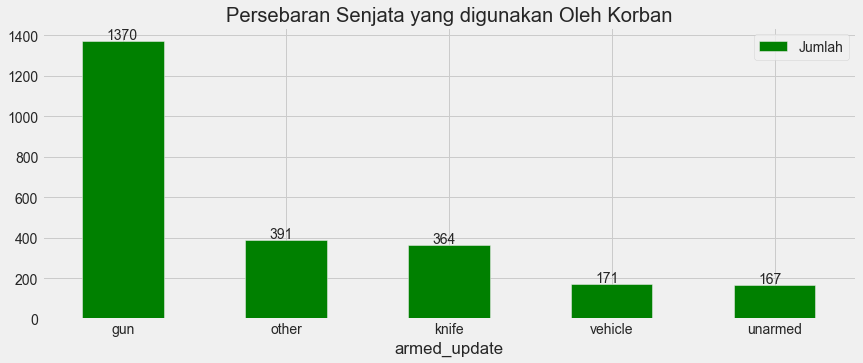

In [478]:
ax = armed_update.sort_values("Jumlah", ascending = False).plot(kind = "bar", figsize = (13, 5), color = "green",
                  rot = 0, title = "Persebaran Senjata yang digunakan Oleh Korban")

for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
                (p.get_x() + 0.15, p.get_height() + 10))

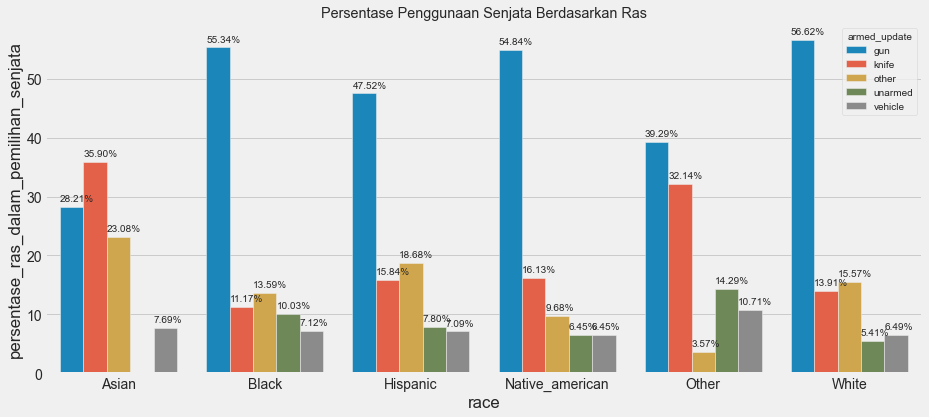

In [490]:
fig, ax = plt.subplots(nrows=1, figsize = (14,6))
plt.rcParams.update({"font.size" : 10})

sns.barplot(data = race_armed, 
                 x = "race", 
                 y = "persentase_ras_dalam_pemilihan_senjata",
                 hue = "armed_update", 
                 ax = ax)

ax.set_title("Persentase Penggunaan Senjata Berdasarkan Ras")
for p in ax.patches:
    ax.annotate("{:.2f}%".format((p.get_height())),
                (p.get_x(), p.get_height() +1))
    
plt.rcParams.update({"font.size" : 14})

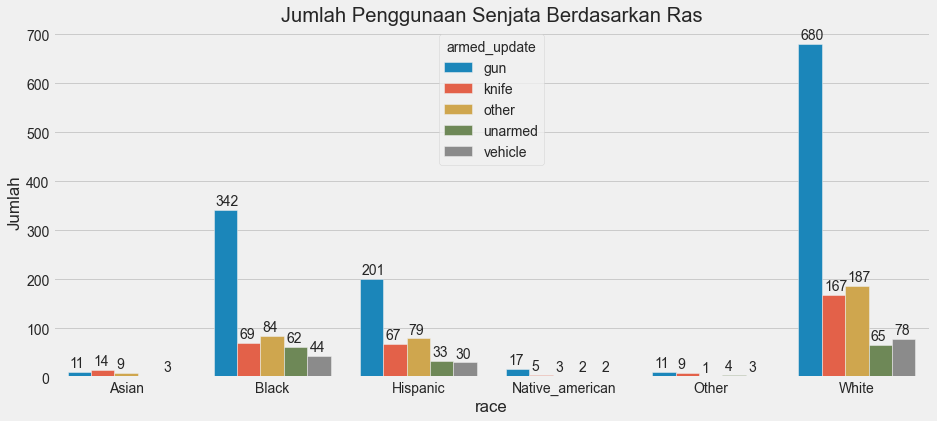

In [510]:
fig, ax = plt.subplots(nrows=1, figsize = (14,6))
plt.rcParams.update({"font.size" : 14})


sns.barplot(data = race_armed,
            x = "race",
            y = "Jumlah",
            hue = "armed_update",
            ax = ax)

ax.set_title("Jumlah Penggunaan Senjata Berdasarkan Ras")

for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
                (p.get_x() + 0.015, p.get_height() + 10))

In [498]:
race_armed

race armed_update  Jumlah  \
0             Asian          gun      11   
1             Black          gun     342   
2          Hispanic          gun     201   
3   Native_american          gun      17   
4             Other          gun      11   
5             White          gun     680   
6             Asian        knife      14   
7             Black        knife      69   
8          Hispanic        knife      67   
9   Native_american        knife       5   
10            Other        knife       9   
11            White        knife     167   
12            Asian        other       9   
13            Black        other      84   
14         Hispanic        other      79   
15  Native_american        other       3   
16            Other        other       1   
17            White        other     187   
18            Black      unarmed      62   
19         Hispanic      unarmed      33   
20  Native_american      unarmed       2   
21            Other      unarmed       4   
22            White      unarmed      65   
23            Asian      vehicle       3   
24            Black      vehicle      44   
25         Hispanic      vehicle      30   
26  Native_american      vehicle       2   
27            Other      vehicle       3   
28            White      vehicle      78   

    persentase_ras_dalam_pemilihan_senjata  \
0                                    28.21   
1                                    55.34   
2                                    47.52   
3                                    54.84   
4                                    39.29   
5                                    56.62   
6                                    35.90   
7                                    11.17   
8                                    15.84   
9                                    16.13   
10                                   32.14   
11                                   13.91   
12                                   23.08   
13                                   13.59   
14                                   18.68   
15                                    9.68   
16                                    3.57   
17                                   15.57   
18                                   10.03   
19                                    7.80   
20                                    6.45   
21                                   14.29   
22                                    5.41   
23                                    7.69   
24                                    7.12   
25                                    7.09   
26                                    6.45   
27                                   10.71   
28                                    6.49   

    persentase_penggunaan_senjata_berdasar_ras  
0                                         0.80  
1                                        24.96  
2                                        14.67  
3                                         1.24  
4                                         0.80  
5                                        49.64  
6                                         3.85  
7                                        18.96  
8                                        18.41  
9                                         1.37  
10                                        2.47  
11                                       45.88  
12                                        2.30  
13                                       21.48  
14                                       20.20  
15                                        0.77  
16                                        0.26  
17                                       47.83  
18                                       37.13  
19                                       19.76  
20                                        1.20  
21                                        2.40  
22                                       38.92  
23                                        1.75  
24                                       25.73  
25                                     

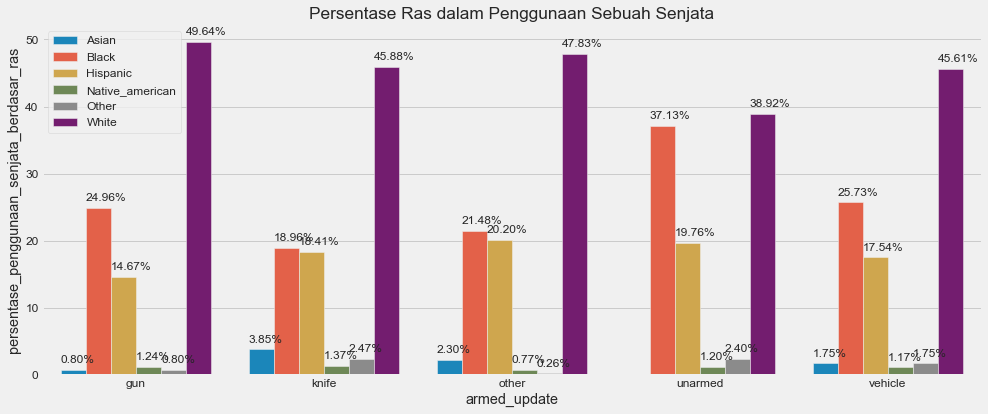

In [494]:
fig, ax = plt.subplots(nrows=1, figsize = (15,6))

sns.barplot(data = race_armed, 
            x = "armed_update", 
            y = "persentase_penggunaan_senjata_berdasar_ras",
            hue = "race",
            ax = ax)

ax.set_title("Persentase Ras dalam Penggunaan Sebuah Senjata")
ax.legend(loc = "upper left")
for p in ax.patches:
    ax.annotate("{:.2f}%".format((p.get_height())),
                (p.get_x(), p.get_height() + 1))
    
plt.rcParams.update({"font.size" : 12})

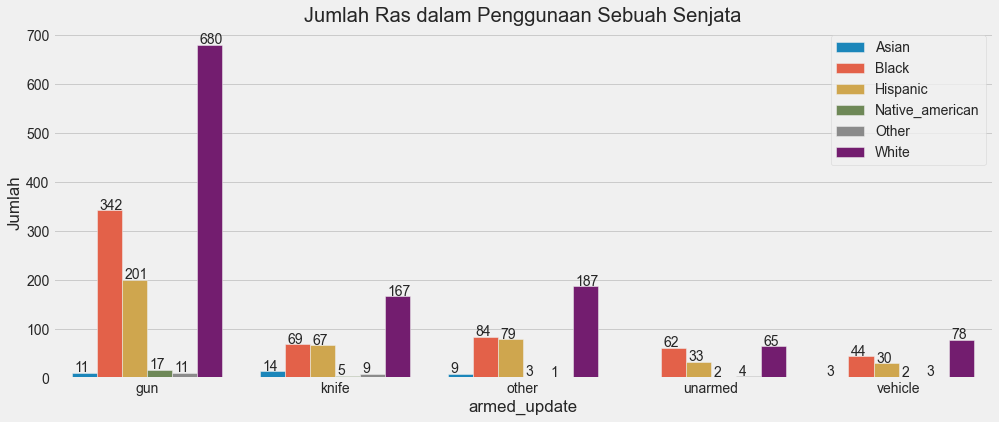

In [518]:
fig, ax = plt.subplots(nrows=1, figsize = (15,6))

sns.barplot(data = race_armed, 
            x = "armed_update", 
            y = "Jumlah",
            hue = "race",
            ax = ax)

ax.set_title("Jumlah Ras dalam Penggunaan Sebuah Senjata")
ax.legend(loc = "upper left")
for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
                (p.get_x() + 0.015, p.get_height() + 1))
    
plt.rcParams.update({"font.size" : 14})
ax.legend(loc = "upper right")

In [119]:
#plt.rcParams.update({"font.size" : 16})

### Mencoba melihat pada top 5 negara bagian dengan jumlah kasus terbanyak, bagaimana persebaran penggunaan senjata oleh para korban?

In [120]:
death_by_police_preproses

name  Tanggal    Bulan  Tahun   manner_of_death  \
0             Tim Elliot        2  Januari     15              shot   
1       Lewis Lee Lembke        2  Januari     15              shot   
2     John Paul Quintero        3  Januari     15  shot and Tasered   
3        Matthew Hoffman        4  Januari     15              shot   
4      Michael Rodriguez        4  Januari     15              shot   
...                  ...      ...      ...    ...               ...   
2530    Rodney E. Jacobs       28     Juli     17              shot   
2531               TK TK       28     Juli     17              shot   
2532  Dennis W. Robinson       29     Juli     17              shot   
2533       Isaiah Tucker       31     Juli     17              shot   
2534        Dwayne Jeune       31     Juli     17              shot   

           armed   age gender      race           city state  \
0            gun  53.0      M     Asian        Shelton    WA   
1            gun  47.0      M     White          Aloha    OR   
2        unarmed  23.0      M  Hispanic        Wichita    KS   
3     toy weapon  32.0      M     White  San Francisco    CA   
4       nail gun  39.0      M  Hispanic          Evans    CO   
...          ...   ...    ...       ...            ...   ...   
2530         gun  31.0      M       NaN    Kansas City    MO   
2531     vehicle   NaN      M       NaN    Albuquerque    NM   
2532         gun  48.0      M       NaN          Melba    ID   
2533     vehicle  28.0      M     Black        Oshkosh    WI   
2534       knife  32.0      M     Black       Brooklyn    NY   

      signs_of_mental_illness threat_level         flee  body_camera  \
0                        True       attack  Not fleeing        False   
1                       False       attack  Not fleeing        False   
2                       False        other  Not fleeing        False   
3                        True       attack  Not fleeing        False   
4                       False       attack  Not fleeing        False   
...                       ...          ...          ...          ...   
2530                    False       attack  Not fleeing        False   
2531                    False       attack          Car        False   
2532                    False       attack          Car        False   
2533                    False       attack          Car         True   
2534                     True       attack  Not fleeing        False   

     armed_update  
0             gun  
1             gun  
2         unarmed  
3           other  
4           other  
...           ...  
2530          gun  
2531      vehicle  
2532          gun  
2533      vehicle  
2534        knife  

[2535 rows x 16 columns]

In [121]:
top5_state_total = top10_state.head(5)

top5_state_death_data = pd.DataFrame()
for state in top5_state_total.Abbreviation:
    data = death_by_police_preproses.loc[death_by_police_preproses.state == state]
    top5_state_death_data = pd.concat([top5_state_death_data, data], axis = "index")

top5_state_total = pd.merge(top5_state_death_data, 
                            top5_state_total, left_on= 'state', 
                            right_on= "Abbreviation").drop(["Jumlah", "Abbreviation"], axis = "columns")

top5_state_total

name  Tanggal    Bulan  Tahun   manner_of_death  \
0           Matthew Hoffman        4  Januari     15              shot   
1            Patrick Wetter        6  Januari     15  shot and Tasered   
2            Brian  Barbosa       11  Januari     15              shot   
3                 Jose Ceja       15  Januari     15              shot   
4             Zaki Shinwary       16  Januari     15  shot and Tasered   
..                      ...      ...      ...    ...               ...   
995             Dana Dubose        4     Juli     17              shot   
996  Kareem Ali Nadir Jones        7     Juli     17              shot   
997          Ryan A. Probst        9     Juli     17              shot   
998           Edward Taylor        9     Juli     17              shot   
999       Kesharn K. Burney       26     Juli     17              shot   

          armed   age gender      race           city state  \
0    toy weapon  32.0      M     White  San Francisco    CA   
1         knife  25.0      M     White       Stockton    CA   
2           gun  23.0      M  Hispanic     South Gate    CA   
3         knife  36.0      M  Hispanic      Fairfield    CA   
4         knife  48.0      M     Other        Fremont    CA   
..          ...   ...    ...       ...            ...   ...   
995       knife  36.0      M     Black       Vandalia    OH   
996         gun  30.0      M       NaN       Columbus    OH   
997         gun  28.0      M       NaN      Uniontown    OH   
998         gun  54.0      M       NaN          Akron    OH   
999     vehicle  25.0      M     Black         Dayton    OH   

     signs_of_mental_illness  threat_level         flee  body_camera  \
0                       True        attack  Not fleeing        False   
1                      False        attack  Not fleeing        False   
2                      False        attack  Not fleeing        False   
3                       True         other  Not fleeing        False   
4                      False         other  Not fleeing        False   
..                       ...           ...          ...          ...   
995                    False        attack  Not fleeing        False   
996                    False  undetermined  Not fleeing         True   
997                    False        attack  Not fleeing        False   
998                    False        attack  Not fleeing        False   
999                    False        attack          Car        False   

    armed_update       State  
0          other  California  
1          knife  California  
2            gun  California  
3          knife  California  
4          knife  California  
..           ...         ...  
995        knife        Ohio  
996          gun        Ohio  
997          gun        Ohio  
998          gun        Ohio  
999      vehicle        Ohio  

[1000 rows x 17 columns]

In [122]:
state_armed_top5 = top5_state_total.groupby(["State", "armed_update"]).flee.count().to_frame()
state_armed_top5.columns = ["Jumlah"]
state_armed_top5.reset_index(inplace = True)
state_armed_top5

State armed_update  Jumlah
0      Arizona          gun      61
1      Arizona        knife      17
2      Arizona        other      17
3      Arizona      unarmed       9
4      Arizona      vehicle      11
5   California          gun     159
6   California        knife      98
7   California        other      95
8   California      unarmed      34
9   California      vehicle      29
10     Florida          gun      83
11     Florida        knife      23
12     Florida        other      23
13     Florida      unarmed      13
14     Florida      vehicle       7
15        Ohio          gun      39
16        Ohio        knife      10
17        Ohio        other      13
18        Ohio      unarmed       7
19        Ohio      vehicle       8
20       Texas          gun     143
21       Texas        knife      21
22       Texas        other      25
23       Texas      unarmed      15
24       Texas      vehicle      13

In [524]:
deathby_state.head()

Abbreviation       State  Jumlah  Rank
0           CA  California     424     1
1           TX       Texas     225     2
2           FL     Florida     154     3
3           AZ     Arizona     118     4
4           OH        Ohio      79     5

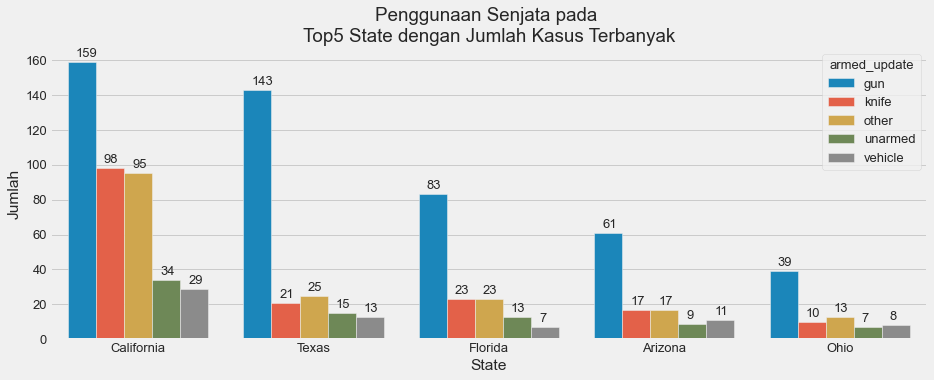

In [525]:
plt.figure(figsize = (14, 5))
plt.rcParams.update({"font.size" : 13})

ax = sns.barplot(data = state_armed_top5, x = "State", y = "Jumlah", hue = "armed_update",
                 order= deathby_state.State.head())
ax.set_title("Penggunaan Senjata pada \nTop5 State dengan Jumlah Kasus Terbanyak")
for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
                (p.get_x() + 0.045, p.get_height() + 3))

### Bagaimana presentase jenis kabur pada tiap ras?

In [124]:
death_by_police_preproses

name  Tanggal    Bulan  Tahun   manner_of_death  \
0             Tim Elliot        2  Januari     15              shot   
1       Lewis Lee Lembke        2  Januari     15              shot   
2     John Paul Quintero        3  Januari     15  shot and Tasered   
3        Matthew Hoffman        4  Januari     15              shot   
4      Michael Rodriguez        4  Januari     15              shot   
...                  ...      ...      ...    ...               ...   
2530    Rodney E. Jacobs       28     Juli     17              shot   
2531               TK TK       28     Juli     17              shot   
2532  Dennis W. Robinson       29     Juli     17              shot   
2533       Isaiah Tucker       31     Juli     17              shot   
2534        Dwayne Jeune       31     Juli     17              shot   

           armed   age gender      race           city state  \
0            gun  53.0      M     Asian        Shelton    WA   
1            gun  47.0      M     White          Aloha    OR   
2        unarmed  23.0      M  Hispanic        Wichita    KS   
3     toy weapon  32.0      M     White  San Francisco    CA   
4       nail gun  39.0      M  Hispanic          Evans    CO   
...          ...   ...    ...       ...            ...   ...   
2530         gun  31.0      M       NaN    Kansas City    MO   
2531     vehicle   NaN      M       NaN    Albuquerque    NM   
2532         gun  48.0      M       NaN          Melba    ID   
2533     vehicle  28.0      M     Black        Oshkosh    WI   
2534       knife  32.0      M     Black       Brooklyn    NY   

      signs_of_mental_illness threat_level         flee  body_camera  \
0                        True       attack  Not fleeing        False   
1                       False       attack  Not fleeing        False   
2                       False        other  Not fleeing        False   
3                        True       attack  Not fleeing        False   
4                       False       attack  Not fleeing        False   
...                       ...          ...          ...          ...   
2530                    False       attack  Not fleeing        False   
2531                    False       attack          Car        False   
2532                    False       attack          Car        False   
2533                    False       attack          Car         True   
2534                     True       attack  Not fleeing        False   

     armed_update  
0             gun  
1             gun  
2         unarmed  
3           other  
4           other  
...           ...  
2530          gun  
2531      vehicle  
2532          gun  
2533      vehicle  
2534        knife  

[2535 rows x 16 columns]

In [125]:
flee_race = death_by_police_preproses.groupby(["race", "flee"]).flee.count().to_frame()
flee_race.columns = ["Jumlah"]
flee_race.reset_index(inplace = True)
flee_race

race         flee  Jumlah
0             Asian          Car       4
1             Asian         Foot       5
2             Asian  Not fleeing      28
3             Black          Car      90
4             Black         Foot     113
5             Black  Not fleeing     379
6             Black        Other      23
7          Hispanic          Car      74
8          Hispanic         Foot      50
9          Hispanic  Not fleeing     268
10         Hispanic        Other      19
11  Native_american          Car       2
12  Native_american         Foot       6
13  Native_american  Not fleeing      21
14            Other          Car       4
15            Other         Foot       2
16            Other  Not fleeing      21
17            Other        Other       1
18            White          Car     191
19            White         Foot     103
20            White  Not fleeing     838
21            White        Other      46

In [126]:
race_group = death_by_police_preproses.groupby("race").race.count().to_frame()
race_group.columns = ["Jumlah"]
race_group

Jumlah
race                   
Asian                39
Black               618
Hispanic            423
Native_american      31
Other                28
White              1201

In [127]:
kolom = pd.DataFrame()
for race in flee_race.race.unique():
    data = flee_race.loc[flee_race.race == race]
    pembagi = race_group.loc[race_group.index == race].Jumlah.values
    
    persentase = pd.DataFrame(data.Jumlah.values / pembagi * 100).round(2)
    kolom = pd.concat([kolom, persentase], axis = "index")

flee_race["Persentase_jenis_kabur_berdasar_ras"] = kolom.values
flee_race

race         flee  Jumlah  Persentase_jenis_kabur_berdasar_ras
0             Asian          Car       4                                10.26
1             Asian         Foot       5                                12.82
2             Asian  Not fleeing      28                                71.79
3             Black          Car      90                                14.56
4             Black         Foot     113                                18.28
5             Black  Not fleeing     379                                61.33
6             Black        Other      23                                 3.72
7          Hispanic          Car      74                                17.49
8          Hispanic         Foot      50                                11.82
9          Hispanic  Not fleeing     268                                63.36
10         Hispanic        Other      19                                 4.49
11  Native_american          Car       2                                 6.45
12  Native_american         Foot       6                                19.35
13  Native_american  Not fleeing      21                                67.74
14            Other          Car       4                                14.29
15            Other         Foot       2                                 7.14
16            Other  Not fleeing      21                                75.00
17            Other        Other       1                                 3.57
18            White          Car     191                                15.90
19            White         Foot     103                                 8.58
20            White  Not fleeing     838                                69.78
21            White        Other      46                                 3.83

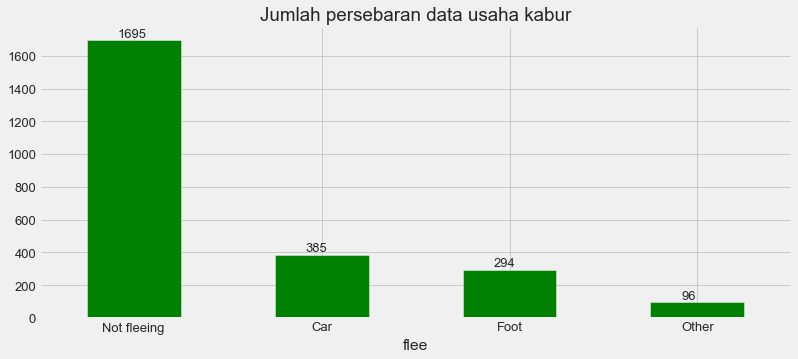

In [554]:
fig, ax = plt.subplots(1,1, figsize = (12, 5))

death_by_police_preproses.groupby("flee").flee.count().sort_values(ascending = False).plot(kind = "bar",
                                                                                            color = "green",
                                                                                            rot = 0,
                                                                                           ax = ax,
                                                                                          title = "Jumlah persebaran data usaha kabur")


for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
                (p.get_x() + 0.165, p.get_height() + 20))

### Bagaimana dengan perilaku/ancaman yang dilakukan oleh para korban pada petugas polisi saat kejadian? Apakah ada pola tertentu dari asal negara bagian atau ras tertentu terhadap ancaman yang diberikan?

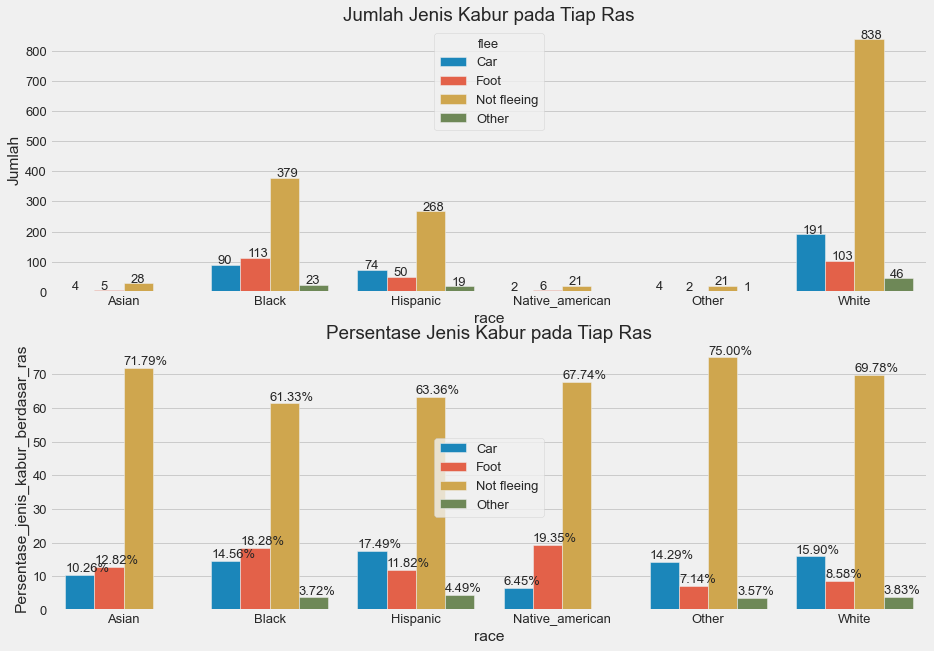

In [526]:
fig, ax = plt.subplots(nrows= 2, figsize = (14, 10))

sns.barplot(data = flee_race, x = "race", y = "Jumlah", hue = "flee",
            ax= ax[0])
ax[0].set_title("Jumlah Jenis Kabur pada Tiap Ras")

for p in ax[0].patches:
    ax[0].annotate("{:.0f}".format((p.get_height())),
                (p.get_x() + 0.045, p.get_height() + 3))
    
# -------------------------------------------

sns.barplot(data = flee_race, x = "race", 
            y = "Persentase_jenis_kabur_berdasar_ras",
            hue = "flee", ax= ax[1])

ax[1].set_title("Persentase Jenis Kabur pada Tiap Ras")
ax[1].legend(loc = "center")

for p in ax[1].patches:
    ax[1].annotate("{:.2f}%".format((p.get_height())),
                  (p.get_x(), p.get_height() + 1))

In [129]:
death_by_police_preproses

name  Tanggal    Bulan  Tahun   manner_of_death  \
0             Tim Elliot        2  Januari     15              shot   
1       Lewis Lee Lembke        2  Januari     15              shot   
2     John Paul Quintero        3  Januari     15  shot and Tasered   
3        Matthew Hoffman        4  Januari     15              shot   
4      Michael Rodriguez        4  Januari     15              shot   
...                  ...      ...      ...    ...               ...   
2530    Rodney E. Jacobs       28     Juli     17              shot   
2531               TK TK       28     Juli     17              shot   
2532  Dennis W. Robinson       29     Juli     17              shot   
2533       Isaiah Tucker       31     Juli     17              shot   
2534        Dwayne Jeune       31     Juli     17              shot   

           armed   age gender      race           city state  \
0            gun  53.0      M     Asian        Shelton    WA   
1            gun  47.0      M     White          Aloha    OR   
2        unarmed  23.0      M  Hispanic        Wichita    KS   
3     toy weapon  32.0      M     White  San Francisco    CA   
4       nail gun  39.0      M  Hispanic          Evans    CO   
...          ...   ...    ...       ...            ...   ...   
2530         gun  31.0      M       NaN    Kansas City    MO   
2531     vehicle   NaN      M       NaN    Albuquerque    NM   
2532         gun  48.0      M       NaN          Melba    ID   
2533     vehicle  28.0      M     Black        Oshkosh    WI   
2534       knife  32.0      M     Black       Brooklyn    NY   

      signs_of_mental_illness threat_level         flee  body_camera  \
0                        True       attack  Not fleeing        False   
1                       False       attack  Not fleeing        False   
2                       False        other  Not fleeing        False   
3                        True       attack  Not fleeing        False   
4                       False       attack  Not fleeing        False   
...                       ...          ...          ...          ...   
2530                    False       attack  Not fleeing        False   
2531                    False       attack          Car        False   
2532                    False       attack          Car        False   
2533                    False       attack          Car         True   
2534                     True       attack  Not fleeing        False   

     armed_update  
0             gun  
1             gun  
2         unarmed  
3           other  
4           other  
...           ...  
2530          gun  
2531      vehicle  
2532          gun  
2533      vehicle  
2534        knife  

[2535 rows x 16 columns]

In [679]:
group_threatlvl = death_by_police_preproses.groupby("threat_level").name.count().to_frame()
group_threatlvl.columns = ["Jumlah"]
group_threatlvl['Persentase'] = (group_threatlvl.Jumlah / group_threatlvl.Jumlah.sum()).round(2) * 100
group_threatlvl

Jumlah  Persentase
threat_level                    
attack          1611        64.0
other            766        30.0
undetermined     158         6.0

In [ ]:
roup_threatlvl.Jumlah

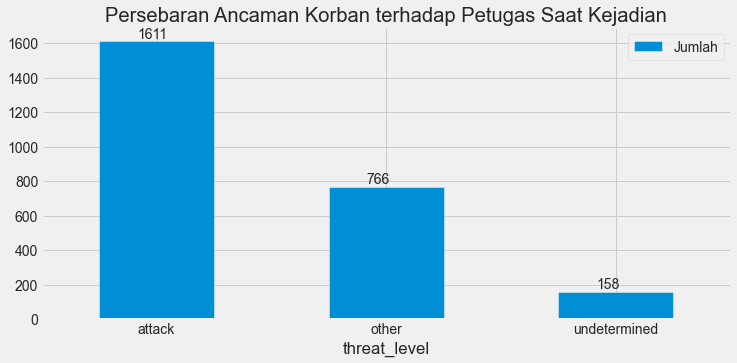

In [572]:
fig, ax = plt.subplots(1,1, figsize = (14, 6))

group_threatlvl.plot(kind = "bar", figsize = (11, 5),
                     rot = 0, title = "Persebaran Ancaman Korban terhadap Petugas Saat Kejadian", 
                     ax = ax)

plt.rcParams.update({"font.size" : 14})

for p in ax.patches:
    ax.annotate("{:.0f}".format((p.get_height())),
                (p.get_x() + 0.165, p.get_height() + 20))

[]

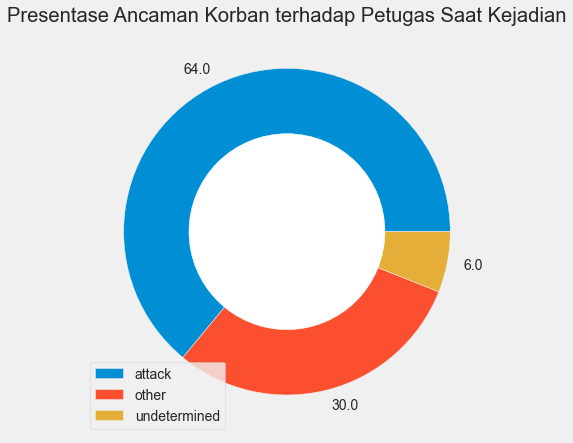

In [736]:
plt.figure(figsize = (7,7))

centre_circle = plt.Circle( (0,0), 0.6, color = "white") # buat lingkaran tengah
plt.pie(group_threatlvl.Persentase, labels = group_threatlvl.Persentase )
        #colors= ["green", "orange", "grey", "yellow", "Black", "maroon"]) # utama
p = plt.gcf() # ambil titik tengah
p.gca().add_artist(centre_circle) # pasang lingkaran tengah
plt.legend(group_threatlvl.index, loc = "lower left")
plt.title("Presentase Ancaman Korban terhadap Petugas Saat Kejadian")
plt.plot()

In [697]:
group_threatlvl_race = death_by_police_preproses.groupby(["threat_level", 
                                   "race"]).name.count().to_frame().reset_index()#.set_index("threat_level")
group_threatlvl_race.columns = ["threat_level", "race", "Jumlah"]
group_threatlvl_race

threat_level             race  Jumlah
0         attack            Asian      22
1         attack            Black     404
2         attack         Hispanic     244
3         attack  Native_american      17
4         attack            Other      17
5         attack            White     799
6          other            Asian      16
7          other            Black     175
8          other         Hispanic     141
9          other  Native_american      13
10         other            Other      11
11         other            White     351
12  undetermined            Asian       1
13  undetermined            Black      39
14  undetermined         Hispanic      38
15  undetermined  Native_american       1
16  undetermined            White      51

In [698]:
group_threatlvl_race.loc[group_threatlvl_race.threat_level == "attack"]

threat_level             race  Jumlah
0       attack            Asian      22
1       attack            Black     404
2       attack         Hispanic     244
3       attack  Native_american      17
4       attack            Other      17
5       attack            White     799

In [707]:
group_threatlvl_race2 = pd.DataFrame()

for kolom in group_threatlvl_race.threat_level.unique():
    threat = group_threatlvl_race.loc[group_threatlvl_race.threat_level == kolom]
    threat["Persentase"] = (threat.Jumlah / threat.Jumlah.sum()).round(2) * 100
    group_threatlvl_race2 = pd.concat([group_threatlvl_race2,
                                       threat], axis = "index")
    
group_threatlvl_race2.set_index("threat_level", inplace = True)
group_threatlvl_race2

race  Jumlah  Persentase
threat_level                                     
attack                  Asian      22         1.0
attack                  Black     404        27.0
attack               Hispanic     244        16.0
attack        Native_american      17         1.0
attack                  Other      17         1.0
attack                  White     799        53.0
other                   Asian      16         2.0
other                   Black     175        25.0
other                Hispanic     141        20.0
other         Native_american      13         2.0
other                   Other      11         2.0
other                   White     351        50.0
undetermined            Asian       1         1.0
undetermined            Black      39        30.0
undetermined         Hispanic      38        29.0
undetermined  Native_american       1         1.0
undetermined            White      51        39.0

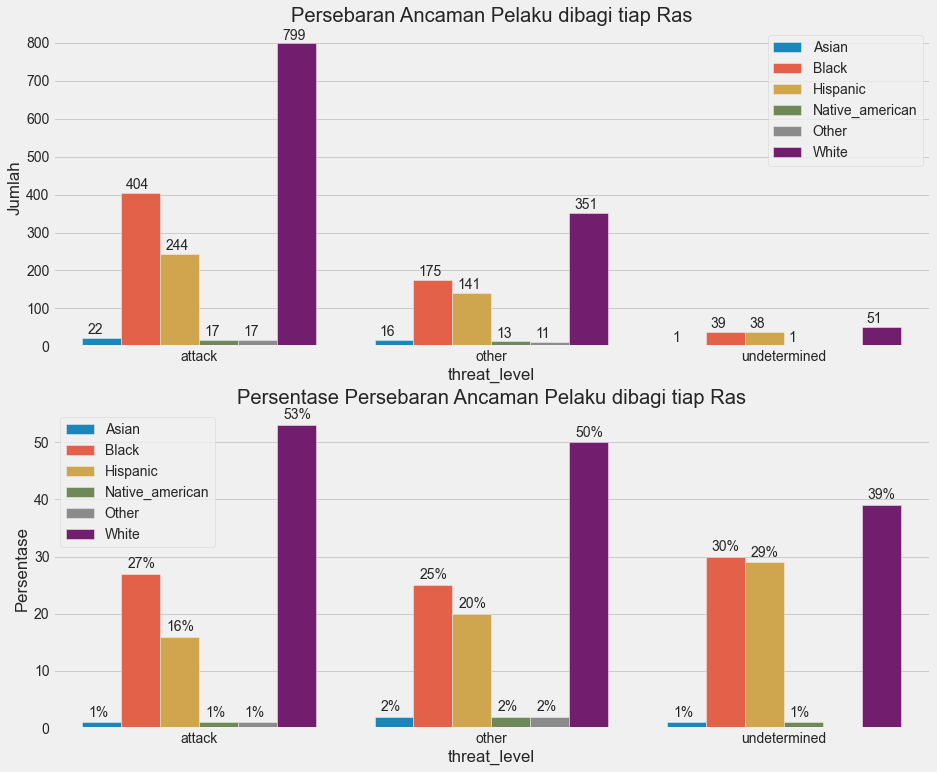

In [723]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (14, 12))

sns.barplot(data = group_threatlvl_race2,
            x = group_threatlvl_race2.index,
            y = "Jumlah",
            hue = "race",
            ax = ax[0])

ax[0].legend(loc = "upper right")
ax[0].set_title("Persebaran Ancaman Pelaku dibagi tiap Ras")

for i in ax[0].patches:
    ax[0].annotate("{:.0f}".format((i.get_height())),
                (i.get_x() + 0.0175, i.get_height() + 10))
    
    
sns.barplot(data = group_threatlvl_race2,
            x = group_threatlvl_race2.index,
            y = "Persentase",
            hue = "race",
            ax = ax[1])

ax[1].legend(loc = "upper left")
ax[1].set_title("Persentase Persebaran Ancaman Pelaku dibagi tiap Ras")

for i in ax[1].patches:
    ax[1].annotate("{:.0f}%".format((i.get_height())),
                (i.get_x() + 0.021, i.get_height() + 1))

In [604]:
top10_state.head()

Abbreviation       State  Jumlah
0           CA  California     424
1           TX       Texas     225
2           FL     Florida     154
3           AZ     Arizona     118
4           OH        Ohio      79

In [623]:
mask1 = (death_by_police_preproses.state == "CA")
mask2 = (death_by_police_preproses.state == "TX")
mask3 = (death_by_police_preproses.state == "FL")
mask4 = (death_by_police_preproses.state == "AZ")
mask5 = (death_by_police_preproses.state == "OH")

group_threatlvl_race_mask = death_by_police_preproses.loc[mask1 | mask2 |mask3 |mask4 |mask5]
group_threatlvl_race_state = group_threatlvl_race_mask.groupby(["state", 
                                                                "threat_level"]).name.count().to_frame()
group_threatlvl_race_state.columns = ["Jumlah"]
group_threatlvl_race_state = group_threatlvl_race_state.reset_index()#.set_index("state")
group_threatlvl_race_state

state  threat_level  Jumlah
0     AZ        attack      73
1     AZ         other      40
2     AZ  undetermined       5
3     CA        attack     230
4     CA         other     162
5     CA  undetermined      32
6     FL        attack      94
7     FL         other      53
8     FL  undetermined       7
9     OH        attack      46
10    OH         other      28
11    OH  undetermined       5
12    TX        attack     140
13    TX         other      72
14    TX  undetermined      13

In [631]:
group_threatlvl_race_state = pd.merge(group_threatlvl_race_state, 
                             states, 
                             how = "left", 
                             left_on= "state", 
                             right_on="Abbreviation").drop(["state", "Abbreviation"], axis = "columns")

group_threatlvl_race_state

threat_level  Jumlah       State
0         attack      73     Arizona
1          other      40     Arizona
2   undetermined       5     Arizona
3         attack     230  California
4          other     162  California
5   undetermined      32  California
6         attack      94     Florida
7          other      53     Florida
8   undetermined       7     Florida
9         attack      46        Ohio
10         other      28        Ohio
11  undetermined       5        Ohio
12        attack     140       Texas
13         other      72       Texas
14  undetermined      13       Texas

In [640]:
group_threatlvl_race_state.loc[group_threatlvl_race_state.State == "Arizona"]

threat_level  Jumlah    State
0        attack      73  Arizona
1         other      40  Arizona
2  undetermined       5  Arizona

In [642]:
(group_threatlvl_race_state.loc[group_threatlvl_race_state.State == "Arizona"].Jumlah).sum()

118

In [645]:
group_threatlvl_race_state.loc[group_threatlvl_race_state.State == "Arizona"].Jumlah / (group_threatlvl_race_state.loc[group_threatlvl_race_state.State == "Arizona"].Jumlah).sum()

0    0.618644
1    0.338983
2    0.042373
Name: Jumlah, dtype: float64

In [666]:
group_threatlvl_race_state

threat_level  Jumlah       State
0         attack      73     Arizona
1          other      40     Arizona
2   undetermined       5     Arizona
3         attack     230  California
4          other     162  California
5   undetermined      32  California
6         attack      94     Florida
7          other      53     Florida
8   undetermined       7     Florida
9         attack      46        Ohio
10         other      28        Ohio
11  undetermined       5        Ohio
12        attack     140       Texas
13         other      72       Texas
14  undetermined      13       Texas

In [668]:
group_threatlvl_race_state2 = pd.DataFrame()

for kolom in group_threatlvl_race_state.threat_level.unique():
    state = group_threatlvl_race_state.loc[group_threatlvl_race_state.threat_level == kolom]
    state["Persentase"] = ((state.Jumlah / state.Jumlah.sum()) * 100).round(2)
    group_threatlvl_race_state2 = pd.concat([group_threatlvl_race_state2, state], axis = "index")
    
group_threatlvl_race_state2

threat_level  Jumlah       State  Persentase
0         attack      73     Arizona       12.52
3         attack     230  California       39.45
6         attack      94     Florida       16.12
9         attack      46        Ohio        7.89
12        attack     140       Texas       24.01
1          other      40     Arizona       11.27
4          other     162  California       45.63
7          other      53     Florida       14.93
10         other      28        Ohio        7.89
13         other      72       Texas       20.28
2   undetermined       5     Arizona        8.06
5   undetermined      32  California       51.61
8   undetermined       7     Florida       11.29
11  undetermined       5        Ohio        8.06
14  undetermined      13       Texas       20.97

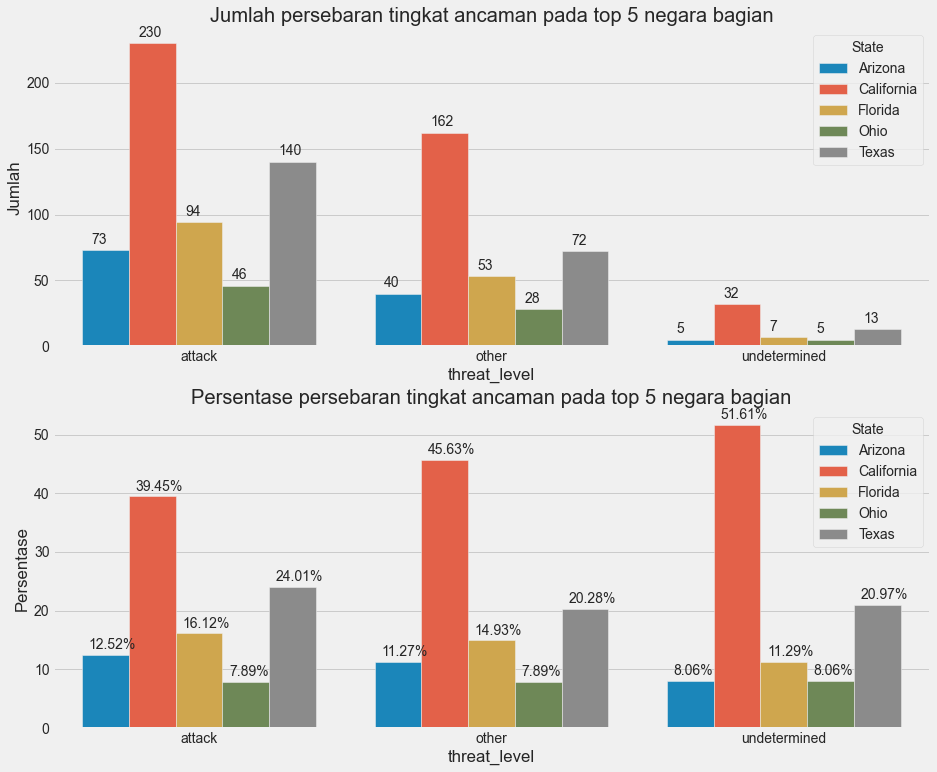

In [674]:
fig, ax = plt.subplots(nrows=2, ncols= 1, figsize = (14, 12))

sns.barplot(data = group_threatlvl_race_state2,
            x = "threat_level",
            y = "Jumlah",
            hue = "State",
            ax = ax[0])

ax[0].set_title("Jumlah persebaran tingkat ancaman pada top 5 negara bagian")

for p in ax[0].patches:
    ax[0].annotate("{:.0f}".format((p.get_height())),
                (p.get_x() + 0.0325, p.get_height() + 5))
    
    
# -----------------------------------

sns.barplot(data = group_threatlvl_race_state2,
            x = "threat_level",
            y = "Persentase",
            hue = "State",
            #hue_order= top10_state.head().index,
            ax = ax[1])

ax[1].set_title("Persentase persebaran tingkat ancaman pada top 5 negara bagian")

for p in ax[1].patches:
    ax[1].annotate("{:.2f}%".format((p.get_height())),
                (p.get_x() + 0.0225, p.get_height() + 1))

In [726]:
group_threatlvl_flee = death_by_police_preproses.groupby(["threat_level", 
                                                          "flee"]).name.count().to_frame()

group_threatlvl_flee.columns = ["Jumlah"]
group_threatlvl_flee = group_threatlvl_flee.reset_index().set_index("threat_level")

group_threatlvl_flee2 = pd.DataFrame()

for index in group_threatlvl_flee.index.unique():
    threat = group_threatlvl_flee.loc[group_threatlvl_flee.index == index]
    threat["Persentase"] = (threat.Jumlah / threat.Jumlah.sum()).round(2) * 100
    group_threatlvl_flee2 = pd.concat([group_threatlvl_flee2, threat], axis = "index")
    
group_threatlvl_flee2

flee  Jumlah  Persentase
threat_level                                 
attack                Car     233        15.0
attack               Foot     193        12.0
attack        Not fleeing    1098        69.0
attack              Other      63         4.0
other                 Car     126        17.0
other                Foot      80        11.0
other         Not fleeing     517        69.0
other               Other      24         3.0
undetermined          Car      26        19.0
undetermined         Foot      21        15.0
undetermined  Not fleeing      80        59.0
undetermined        Other       9         7.0

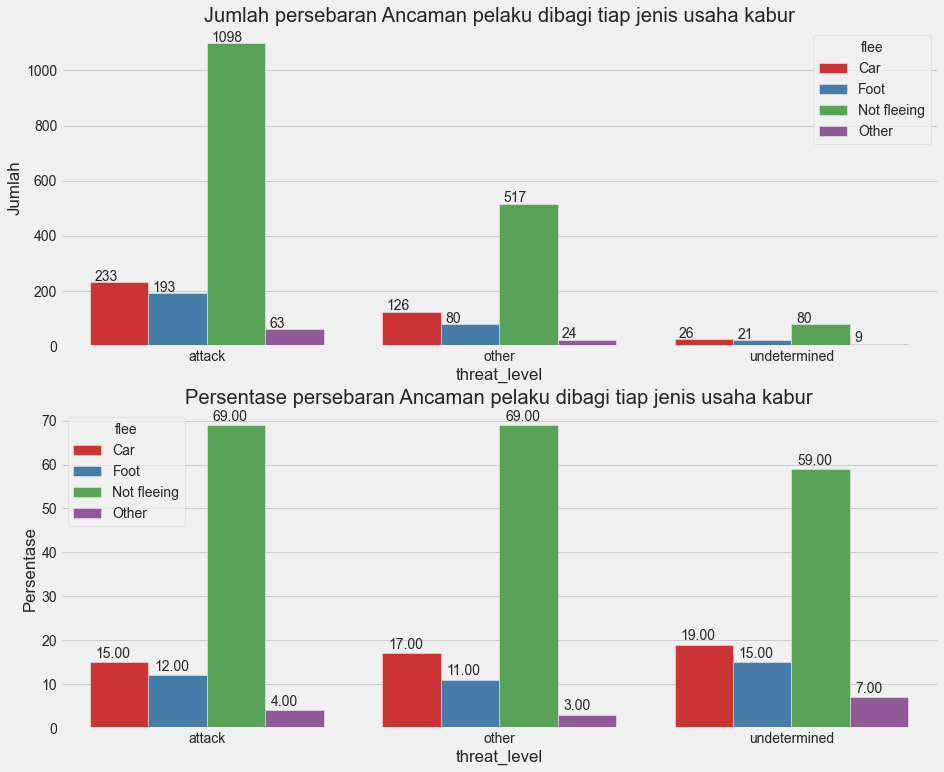

In [735]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize = (14,12))

sns.barplot(data = group_threatlvl_flee2,
            x = group_threatlvl_flee2.index,
            y = "Jumlah",
            hue = "flee",
            ax = ax[0], 
            palette = "Set1")
ax[0].set_title("Jumlah persebaran Ancaman pelaku dibagi tiap jenis usaha kabur")

for p in ax[0].patches:
    ax[0].annotate("{:.0f}".format((p.get_height())),
                   (p.get_x() + 0.015, p.get_height() + 5))
    
# -----------------------------------------

sns.barplot(data = group_threatlvl_flee2,
            x = group_threatlvl_flee2.index,
            y = "Persentase",
            hue = "flee",
            ax = ax[1],
            palette = "Set1")
ax[1].set_title("Persentase persebaran Ancaman pelaku dibagi tiap jenis usaha kabur")

for p in ax[1].patches:
    ax[1].annotate("{:.2f}".format((p.get_height())),
                   (p.get_x() + 0.02, p.get_height() + 1))